# Open Access status for WoS DOIs : Results

Notebook used for the study presented at the EAHIL 2022 conference

* Title: Computational assistance in the analysis of cited references in biomedical literature: a case study from two institutions.

* Authors:
 * Teresa Lee, Knowledge Manager, International Agency for Research on Cancer (IARC/WHO) leet@iarc.fr  
 * Pablo Iriarte, IT Coordinator, Library of the University of Geneva Pablo.Iriarte@unige.ch 
 * Floriane Muller, Librarian (Medical Library), Library of the University of Geneva Floriane.Muller@unige.ch  
 * Ramon Cierco Jimenez, Doctoral Student, International Agency for Research on Cancer (IARC/WHO) CiercoR@students.iarc.fr  


### Prerequisites
* DOIs from publications and citations
* unpaywall data downloaded using the notebook "doi_unpaywall.ipynb" or queries made directly on unpaywall website
* merge of DOIs and unpaywall data using the notebook "oa_status_merge.ipynb" 


In [1]:
import re
import os
import pandas as pd
import time
import datetime
import json
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
from scipy import stats

In [2]:
# open DOIs data
dois = pd.read_csv('export_dois_oa_status.tsv', sep='\t', encoding='utf-8', header=0)
dois

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,doi,id,publication_unige,citation_unige,publication_iarc,citation_iarc,doi_unpaywall,oa_status,has_repository_copy,doi_normalized,doi_unpaywall_normalized
0,10.1111/j.1741-2358.2009.00330.x,1,1.0,1.0,NaN,NaN,10.1111/j.1741-2358.2009.00330.x,closed,False,10.1111/J.1741-2358.2009.00330.X,10.1111/J.1741-2358.2009.00330.X
1,10.1111/ger.12502,2,1.0,NaN,NaN,NaN,10.1111/ger.12502,closed,False,10.1111/GER.12502,10.1111/GER.12502
2,10.1111/j.1741-2358.2011.00586.x,3,1.0,1.0,NaN,NaN,10.1111/j.1741-2358.2011.00586.x,bronze,True,10.1111/J.1741-2358.2011.00586.X,10.1111/J.1741-2358.2011.00586.X
3,10.1111/ger.12083,4,1.0,1.0,NaN,NaN,10.1111/ger.12083,closed,False,10.1111/GER.12083,10.1111/GER.12083
4,10.1016/j.jmpt.2018.01.008,5,1.0,NaN,NaN,NaN,10.1016/j.jmpt.2018.01.008,closed,False,10.1016/J.JMPT.2018.01.008,10.1016/J.JMPT.2018.01.008
...,...,...,...,...,...,...,...,...,...,...,...
751910,10.1079/PAVSNNR20094005,818500,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.1079/PAVSNNR20094005,NaN
751911,"[10.1016/j.atherosclerosis.2019.08.014, 10.109...",818501,NaN,NaN,NaN,1.0,NaN,NaN,NaN,"[10.1016/J.ATHEROSCLEROSIS.2019.08.014, 10.109...",NaN
751912,10.1101/326470V6,818502,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.1101/326470V6,NaN
751913,"[10.1016/S0140-6736(15)60401-9, 10.1016/S0140-...",818503,NaN,NaN,NaN,1.0,NaN,NaN,NaN,"[10.1016/S0140-6736(15)60401-9, 10.1016/S0140-...",NaN


In [3]:
# open UNIGE data
unige_all = pd.read_csv('unige_all_oa_status_citations.csv', encoding='utf-8', header=0, sep='\t')
unige_all

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
0,WOS:000307585400002,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00508.x,22591169,NaN,NaN,NaN,NaN,...,NaN,NaN,closed,False,NaN,NaN,NaN,NaN,NaN,NaN
1,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,2002.0,INT J PROSTHODONT,NaN,...,NaN,NaN,closed,False,NaN,NaN,NaN,NaN,NaN,NaN
2,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,1999.0,COMMUNITY DENT ORAL,10.1111/j.1600-0528.1999.tb02031.x,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False
3,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,1999.0,J DENT RES,10.1177/00220345990780020301,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False
4,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,2001.0,Gerodontology,10.1111/j.1741-2358.2001.00079.x,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260976,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,Q A COR COVID 19,NaN,...,NaN,NaN,bronze,True,NaN,NaN,NaN,NaN,NaN,NaN
1260977,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,INT FORUM ALLERGY RH,10.1002/alr.22577,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
1260978,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,INT FORUM ALLERGY RH,10.1002/alr.22592,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,bronze,True
1260979,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2021.0,IEEE T PATTERN ANAL,10.1109/TPAMI.2020.2975798,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,green,True


In [4]:
# open IARC data
iarc_all = pd.read_csv('iarc_all_oa_status_citations.csv', encoding='utf-8', header=0, sep='\t')
iarc_all

,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
0,WOS:000492162206048,2019,Meeting Abstract,J THORAC ONCOL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WOS:000438342200039,2018,Letter,INT J EPIDEMIOL,10.1093/ije/dyy122,NaN,Bronze,2018.0,INT J EPIDEMIOL,10.1093/ije/dyy063,...,1.0,NaN,bronze,False,NaN,NaN,NaN,1.0,bronze,False
2,WOS:000443381100007,2018,Editorial Material,EPIDEMIOL PREV,10.19191/EP18.1.P009.008,29506354.0,NaN,2003.0,INT J EPIDEMIOL,10.1093/ije/dyg257,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,bronze,True
3,WOS:000443381100007,2018,Editorial Material,EPIDEMIOL PREV,10.19191/EP18.1.P009.008,29506354.0,NaN,2017.0,R P,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WOS:000443381100007,2018,Editorial Material,EPIDEMIOL PREV,10.19191/EP18.1.P009.008,29506354.0,NaN,2016.0,LISTEN LIBERAL WHAT,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275617,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2018.0,ATL SUST DEV GOALS 2,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN
275618,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2011.0,BURD BEST BUYS RED E,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN
275619,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2006.0,WORK TOG HLTH WORLD,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN
275620,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2018.0,WORLD HLTH STAT 2018,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN


# Questions to tackle

## 25. Within the cited articles, what proportion exist in digital form (or at least have a DOI). Does it evolve with time?

In [5]:
# df for publications
unige_publications = unige_all.drop_duplicates(subset='publication_wos_id')
iarc_publications = iarc_all.drop_duplicates(subset='publication_wos_id')
# df with and without DOIs
unige_publications_with_dois = unige_all.loc[unige_all['publication_doi'].notna()].drop_duplicates(subset='publication_wos_id')
unige_citations_with_dois = unige_all.loc[unige_all['citation_doi'].notna()]
iarc_publications_with_dois = iarc_all.loc[iarc_all['publication_doi'].notna()].drop_duplicates(subset='publication_wos_id')
iarc_citations_with_dois = iarc_all.loc[iarc_all['citation_doi'].notna()]

In [6]:
# % of UNIGE publications with DOIs
unige_publications_n = unige_publications.shape[0]
unige_publications_dois_n = unige_publications_with_dois.shape[0]
unige_publications_dois_p = unige_publications_dois_n / unige_publications_n
print ('UNIGE publications : ' + str(unige_publications_n))
print ('UNIGE publications with DOIs  : ' + str(unige_publications_dois_n))
print ('UNIGE publications with DOIs  % : ' + str(unige_publications_dois_p))

UNIGE publications : 36370
UNIGE publications with DOIs  : 29376
UNIGE publications with DOIs  % : 0.8076986527357712


In [7]:
# % of IARC publications with DOIs
iarc_publications_n = iarc_publications.shape[0]
iarc_publications_dois_n = iarc_publications_with_dois.shape[0]
iarc_publications_dois_p = iarc_publications_dois_n / iarc_publications_n
print ('IARC publications : ' + str(iarc_publications_n))
print ('IARC publications with DOIs  : ' + str(iarc_publications_dois_n))
print ('IARC publications with DOIs  % : ' + str(iarc_publications_dois_p))

IARC publications : 7268
IARC publications with DOIs  : 6483
IARC publications with DOIs  % : 0.8919922949917446


In [8]:
# % of UNIGE citations with DOIs
unige_citations_n = unige_all.shape[0]
unige_citations_dois_n = unige_citations_with_dois.shape[0]
unige_citations_dois_p = unige_citations_dois_n / unige_citations_n
print ('UNIGE citations : ' + str(unige_citations_n))
print ('UNIGE citations with DOIS : ' + str(unige_citations_dois_n))
print ('UNIGE citations with DOIS % : ' + str(unige_citations_dois_p))

UNIGE citations : 1260981
UNIGE citations with DOIS : 999588
UNIGE citations with DOIS % : 0.7927066307898374


In [9]:
# % of IARC citations with DOIs
iarc_citations_n = iarc_all.shape[0]
iarc_citations_dois_n = iarc_citations_with_dois.shape[0]
iarc_citations_dois_p = iarc_citations_dois_n / iarc_citations_n
print ('IARC citations : ' + str(iarc_citations_n))
print ('IARC citations with DOIS : ' + str(iarc_citations_dois_n))
print ('IARC citations with DOIS % : ' + str(iarc_citations_dois_p))

IARC citations : 275622
IARC citations with DOIS : 201591
IARC citations with DOIS % : 0.7314038792258963


In [10]:
# write  results on file
with open('25.txt', 'a') as f:
    f.write('25. Within the cited articles, what proportion exist in digital form (or at least have a DOI)\n')
    f.write('----------------------------------------\n\n')
    f.write('PUBLICATIONS:\n\n')
    f.write('UNIGE publications : ' + str(unige_publications_n) + '\n')
    f.write('UNIGE publications with DOIs  : ' + str(unige_publications_dois_n) + '\n')
    f.write('UNIGE publications with DOIs  % : ' + str(unige_publications_dois_p) + '\n')
    f.write('  \n')
    f.write('IARC publications : ' + str(iarc_publications_n) + '\n')
    f.write('IARC publications with DOIs  : ' + str(iarc_publications_dois_n) + '\n')
    f.write('IARC publications with DOIs  % : ' + str(iarc_publications_dois_p) + '\n')
    f.write('  \n')
    f.write('CITATIONS:\n\n')
    f.write('UNIGE citations : ' + str(unige_citations_n) + '\n')
    f.write('UNIGE citations with DOIS : ' + str(unige_citations_dois_n) + '\n')
    f.write('UNIGE citations with DOIS % : ' + str(unige_citations_dois_p) + '\n')
    f.write('  \n')
    f.write('IARC citations : ' + str(iarc_citations_n) + '\n')
    f.write('IARC citations with DOIS : ' + str(iarc_citations_dois_n) + '\n')
    f.write('IARC citations with DOIS % : ' + str(iarc_citations_dois_p) + '\n')

In [11]:
IARC_color = "#1E7FB8" #[(30, 127, 184)]
UNIGE_color = "#CF0063" #[(207, 00, 99)] 

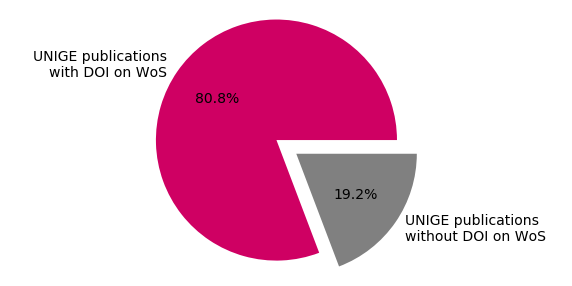

In [12]:
# UNIGE publications with DOI by year
 
%matplotlib inline
myfileoutfig = 'figures/25_unige_publications_pie_chart.png'
labels = 'UNIGE publications\nwith DOI on WoS', 'UNIGE publications\nwithout DOI on WoS'
sizes = [unige_publications_dois_n,
         unige_publications_n - unige_publications_dois_n ]
explode = (0.1, 0.1)
colors = [UNIGE_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, dpi=200)
plt.show()

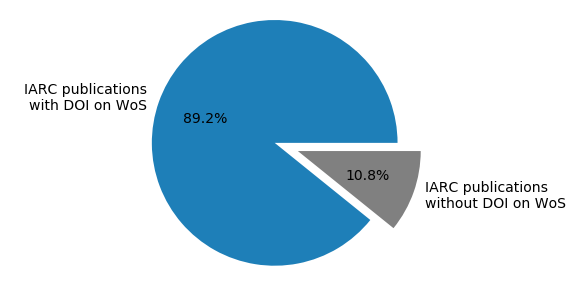

In [13]:
# IARC publications with DOI by year
%matplotlib inline
myfileoutfig = 'figures/25_iarc_publications_pie_chart.png'
labels = 'IARC publications\nwith DOI on WoS', 'IARC publications\nwithout DOI on WoS'
sizes = [iarc_publications_dois_n,
         iarc_publications_n - iarc_publications_dois_n ]
explode = (0.1, 0.1)
colors = [IARC_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, dpi=200)
plt.show()

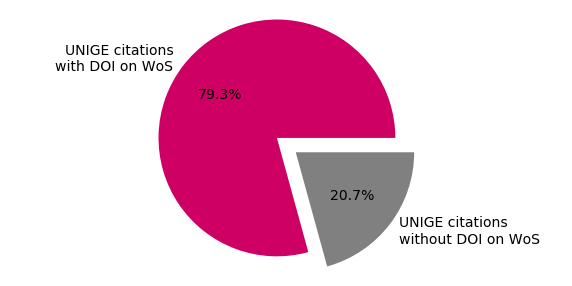

In [14]:
# UNIGE citations with DOI by year
%matplotlib inline
myfileoutfig = 'figures/25_unige_citations_pie_chart.png'
labels = 'UNIGE citations\nwith DOI on WoS', 'UNIGE citations\nwithout DOI on WoS'
sizes = [unige_citations_dois_n,
         unige_citations_n - unige_citations_dois_n ]
explode = (0.1, 0.1)
colors = [UNIGE_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, dpi=200)
plt.show()

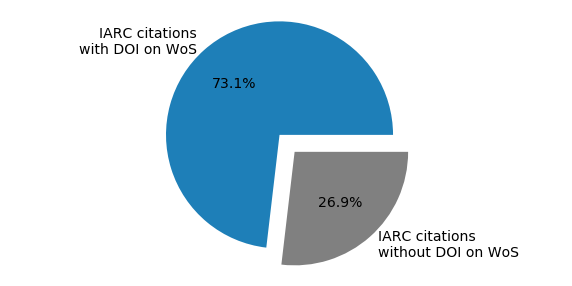

In [15]:
# IARC citations with DOI by year
%matplotlib inline
myfileoutfig = 'figures/25_iarc_citations_pie_chart.png'
labels = 'IARC citations\nwith DOI on WoS', 'IARC citations\nwithout DOI on WoS'
sizes = [iarc_citations_dois_n,
         iarc_citations_n - iarc_citations_dois_n ]
explode = (0.1, 0.1)
colors = [IARC_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, dpi=200)
plt.show()

In [16]:
# UNIGE publications with DOI by year
unige_publications_with_dois_by_year = unige_publications_with_dois['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publication_doi_count').sort_values(by='publication_year')
unige_publications_counts = unige_publications['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publications_count').sort_values(by='publication_year')
# merge
unige_publications_with_dois_by_year = pd.merge(unige_publications_with_dois_by_year, unige_publications_counts, on='publication_year')
# add %
unige_publications_with_dois_by_year['publication_doi_percent'] = unige_publications_with_dois_by_year['publication_doi_count'] / unige_publications_with_dois_by_year['publications_count']
# remove errors
unige_publications_with_dois_by_year = unige_publications_with_dois_by_year.loc[(unige_publications_with_dois_by_year['publication_year'] > 2000) & (unige_publications_with_dois_by_year['publication_year'] < 2021)]
unige_publications_with_dois_by_year

,publication_year,publication_doi_count,publications_count,publication_doi_percent
2,2001,821,1146,0.716405
3,2002,876,1242,0.705314
4,2003,949,1253,0.757382
5,2004,1035,1468,0.705041
6,2005,1002,1309,0.765470
7,2006,1195,1511,0.790867
8,2007,1159,1531,0.757022
9,2008,1305,1674,0.779570
10,2009,1408,1757,0.801366
11,2010,1466,1761,0.832482


In [17]:
# UNIGE publications export 25 csv and excel
unige_publications_with_dois_by_year.to_csv('results/25_unige_publications_with_doi_by_year.csv', index=False, sep='\t', encoding='utf-8')
unige_publications_with_dois_by_year.to_excel('results/25_unige_publications_with_doi_by_year.xlsx', index=False)

In [18]:
# IARC publications with DOI by year
iarc_publications_with_dois_by_year = iarc_publications_with_dois['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publication_doi_count').sort_values(by='publication_year')
iarc_publications_counts = iarc_publications['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publications_count').sort_values(by='publication_year')
# merge
iarc_publications_with_dois_by_year = pd.merge(iarc_publications_with_dois_by_year, iarc_publications_counts, on='publication_year')
# add %
iarc_publications_with_dois_by_year['publication_doi_percent'] = iarc_publications_with_dois_by_year['publication_doi_count'] / iarc_publications_with_dois_by_year['publications_count']
iarc_publications_with_dois_by_year

,publication_year,publication_doi_count,publications_count,publication_doi_percent
0,2001,192,250,0.768000
1,2002,201,261,0.770115
2,2003,212,258,0.821705
3,2004,221,252,0.876984
4,2005,256,305,0.839344
5,2006,315,354,0.889831
6,2007,310,339,0.914454
7,2008,325,364,0.892857
8,2009,301,364,0.826923
9,2010,289,311,0.929260


In [19]:
# IARC publications export 25 csv and excel
iarc_publications_with_dois_by_year.to_csv('results/25_iarc_publications_with_doi_by_year.csv', index=False, sep='\t', encoding='utf-8')
iarc_publications_with_dois_by_year.to_excel('results/25_iarc_publications_with_doi_by_year.xlsx', index=False)

In [20]:
# UNIGE citations with DOI by year
unige_citations_with_dois_by_year = unige_citations_with_dois['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citation_doi_count').sort_values(by='publication_year')
unige_citations_counts = unige_all['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citations_count').sort_values(by='publication_year')
# merge
unige_citations_with_dois_by_year = pd.merge(unige_citations_with_dois_by_year, unige_citations_counts, on='publication_year')
# add %
unige_citations_with_dois_by_year['citation_doi_percent'] = unige_citations_with_dois_by_year['citation_doi_count'] / unige_citations_with_dois_by_year['citations_count']
# remove errors
unige_citations_with_dois_by_year = unige_citations_with_dois_by_year.loc[(unige_citations_with_dois_by_year['publication_year'] > 2000) & (unige_citations_with_dois_by_year['publication_year'] < 2021)]
unige_citations_with_dois_by_year

,publication_year,citation_doi_count,citations_count,citation_doi_percent
0,2001,26475,36630,0.722768
1,2002,27658,37754,0.732585
2,2003,28623,38728,0.739078
3,2004,32118,42687,0.752407
4,2005,29892,38480,0.776819
5,2006,37075,47570,0.779378
6,2007,37087,46546,0.796782
7,2008,41633,52176,0.797934
8,2009,47449,58010,0.817945
9,2010,48134,59199,0.813088


In [21]:
# UNIGE citations export 25 csv and excel
unige_citations_with_dois_by_year.to_csv('results/25_unige_citations_with_doi_by_year.csv', index=False, sep='\t', encoding='utf-8')
unige_citations_with_dois_by_year.to_excel('results/25_unige_citations_with_doi_by_year.xlsx', index=False)

In [22]:
# IARC citations with DOI by year
iarc_citations_with_dois_by_year = iarc_citations_with_dois['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citation_doi_count').sort_values(by='publication_year')
iarc_citations_counts = iarc_all['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citations_count').sort_values(by='publication_year')
# merge
iarc_citations_with_dois_by_year = pd.merge(iarc_citations_with_dois_by_year, iarc_citations_counts, on='publication_year')
# add %
iarc_citations_with_dois_by_year['citation_doi_percent'] = iarc_citations_with_dois_by_year['citation_doi_count'] / iarc_citations_with_dois_by_year['citations_count']
iarc_citations_with_dois_by_year

,publication_year,citation_doi_count,citations_count,citation_doi_percent
0,2001,6222,9891,0.629057
1,2002,6693,10553,0.634227
2,2003,6669,10557,0.631714
3,2004,6326,9749,0.648887
4,2005,7093,10576,0.670669
5,2006,7725,11170,0.691585
6,2007,9236,12805,0.721281
7,2008,8457,11668,0.724803
8,2009,9250,12438,0.743689
9,2010,8907,11751,0.757978


In [23]:
# IARC citations export 25 csv and excel
iarc_citations_with_dois_by_year.to_csv('results/25_iarc_citations_with_doi_by_year.csv', index=False, sep='\t', encoding='utf-8')
iarc_citations_with_dois_by_year.to_excel('results/25_iarc_citations_with_doi_by_year.xlsx', index=False)

In [24]:
# merge both tables for publications
publications_with_dois_by_year = iarc_publications_with_dois_by_year[['publication_year', 'publication_doi_percent']]
publications_with_dois_by_year = publications_with_dois_by_year.rename(columns={'publication_doi_percent' : 'IARC'})
publications_with_dois_by_year = publications_with_dois_by_year.merge(unige_publications_with_dois_by_year[['publication_year', 'publication_doi_percent']], on='publication_year')
publications_with_dois_by_year = publications_with_dois_by_year.rename(columns={'publication_doi_percent' : 'UNIGE'})
publications_with_dois_by_year = publications_with_dois_by_year.set_index('publication_year')
publications_with_dois_by_year

,IARC,UNIGE
publication_year,,
2001,0.768000,0.716405
2002,0.770115,0.705314
2003,0.821705,0.757382
2004,0.876984,0.705041
2005,0.839344,0.765470
2006,0.889831,0.790867
2007,0.914454,0.757022
2008,0.892857,0.779570
2009,0.826923,0.801366


In [25]:
# merge both tables for citations
citations_with_dois_by_year = iarc_citations_with_dois_by_year[['publication_year', 'citation_doi_percent']]
citations_with_dois_by_year = citations_with_dois_by_year.rename(columns={'citation_doi_percent' : 'IARC'})
citations_with_dois_by_year = citations_with_dois_by_year.merge(unige_citations_with_dois_by_year[['publication_year', 'citation_doi_percent']], on='publication_year')
citations_with_dois_by_year = citations_with_dois_by_year.rename(columns={'citation_doi_percent' : 'UNIGE'})
citations_with_dois_by_year = citations_with_dois_by_year.set_index('publication_year')
citations_with_dois_by_year

,IARC,UNIGE
publication_year,,
2001,0.629057,0.722768
2002,0.634227,0.732585
2003,0.631714,0.739078
2004,0.648887,0.752407
2005,0.670669,0.776819
2006,0.691585,0.779378
2007,0.721281,0.796782
2008,0.724803,0.797934
2009,0.743689,0.817945


In [26]:
# export 25 csv and excel
# publications
publications_with_dois_by_year.to_csv('results/25_iarc_unige_publications_with_doi_by_year.csv', index=True, sep='\t', encoding='utf-8')
publications_with_dois_by_year.to_excel('results/25_iarc_unige_publications_with_doi_by_year.xlsx', index=True)
# citations
citations_with_dois_by_year.to_csv('results/25_iarc_unige_citations_with_doi_by_year.csv', index=True, sep='\t', encoding='utf-8')
citations_with_dois_by_year.to_excel('results/25_iarc_unige_citations_with_doi_by_year.xlsx', index=True)

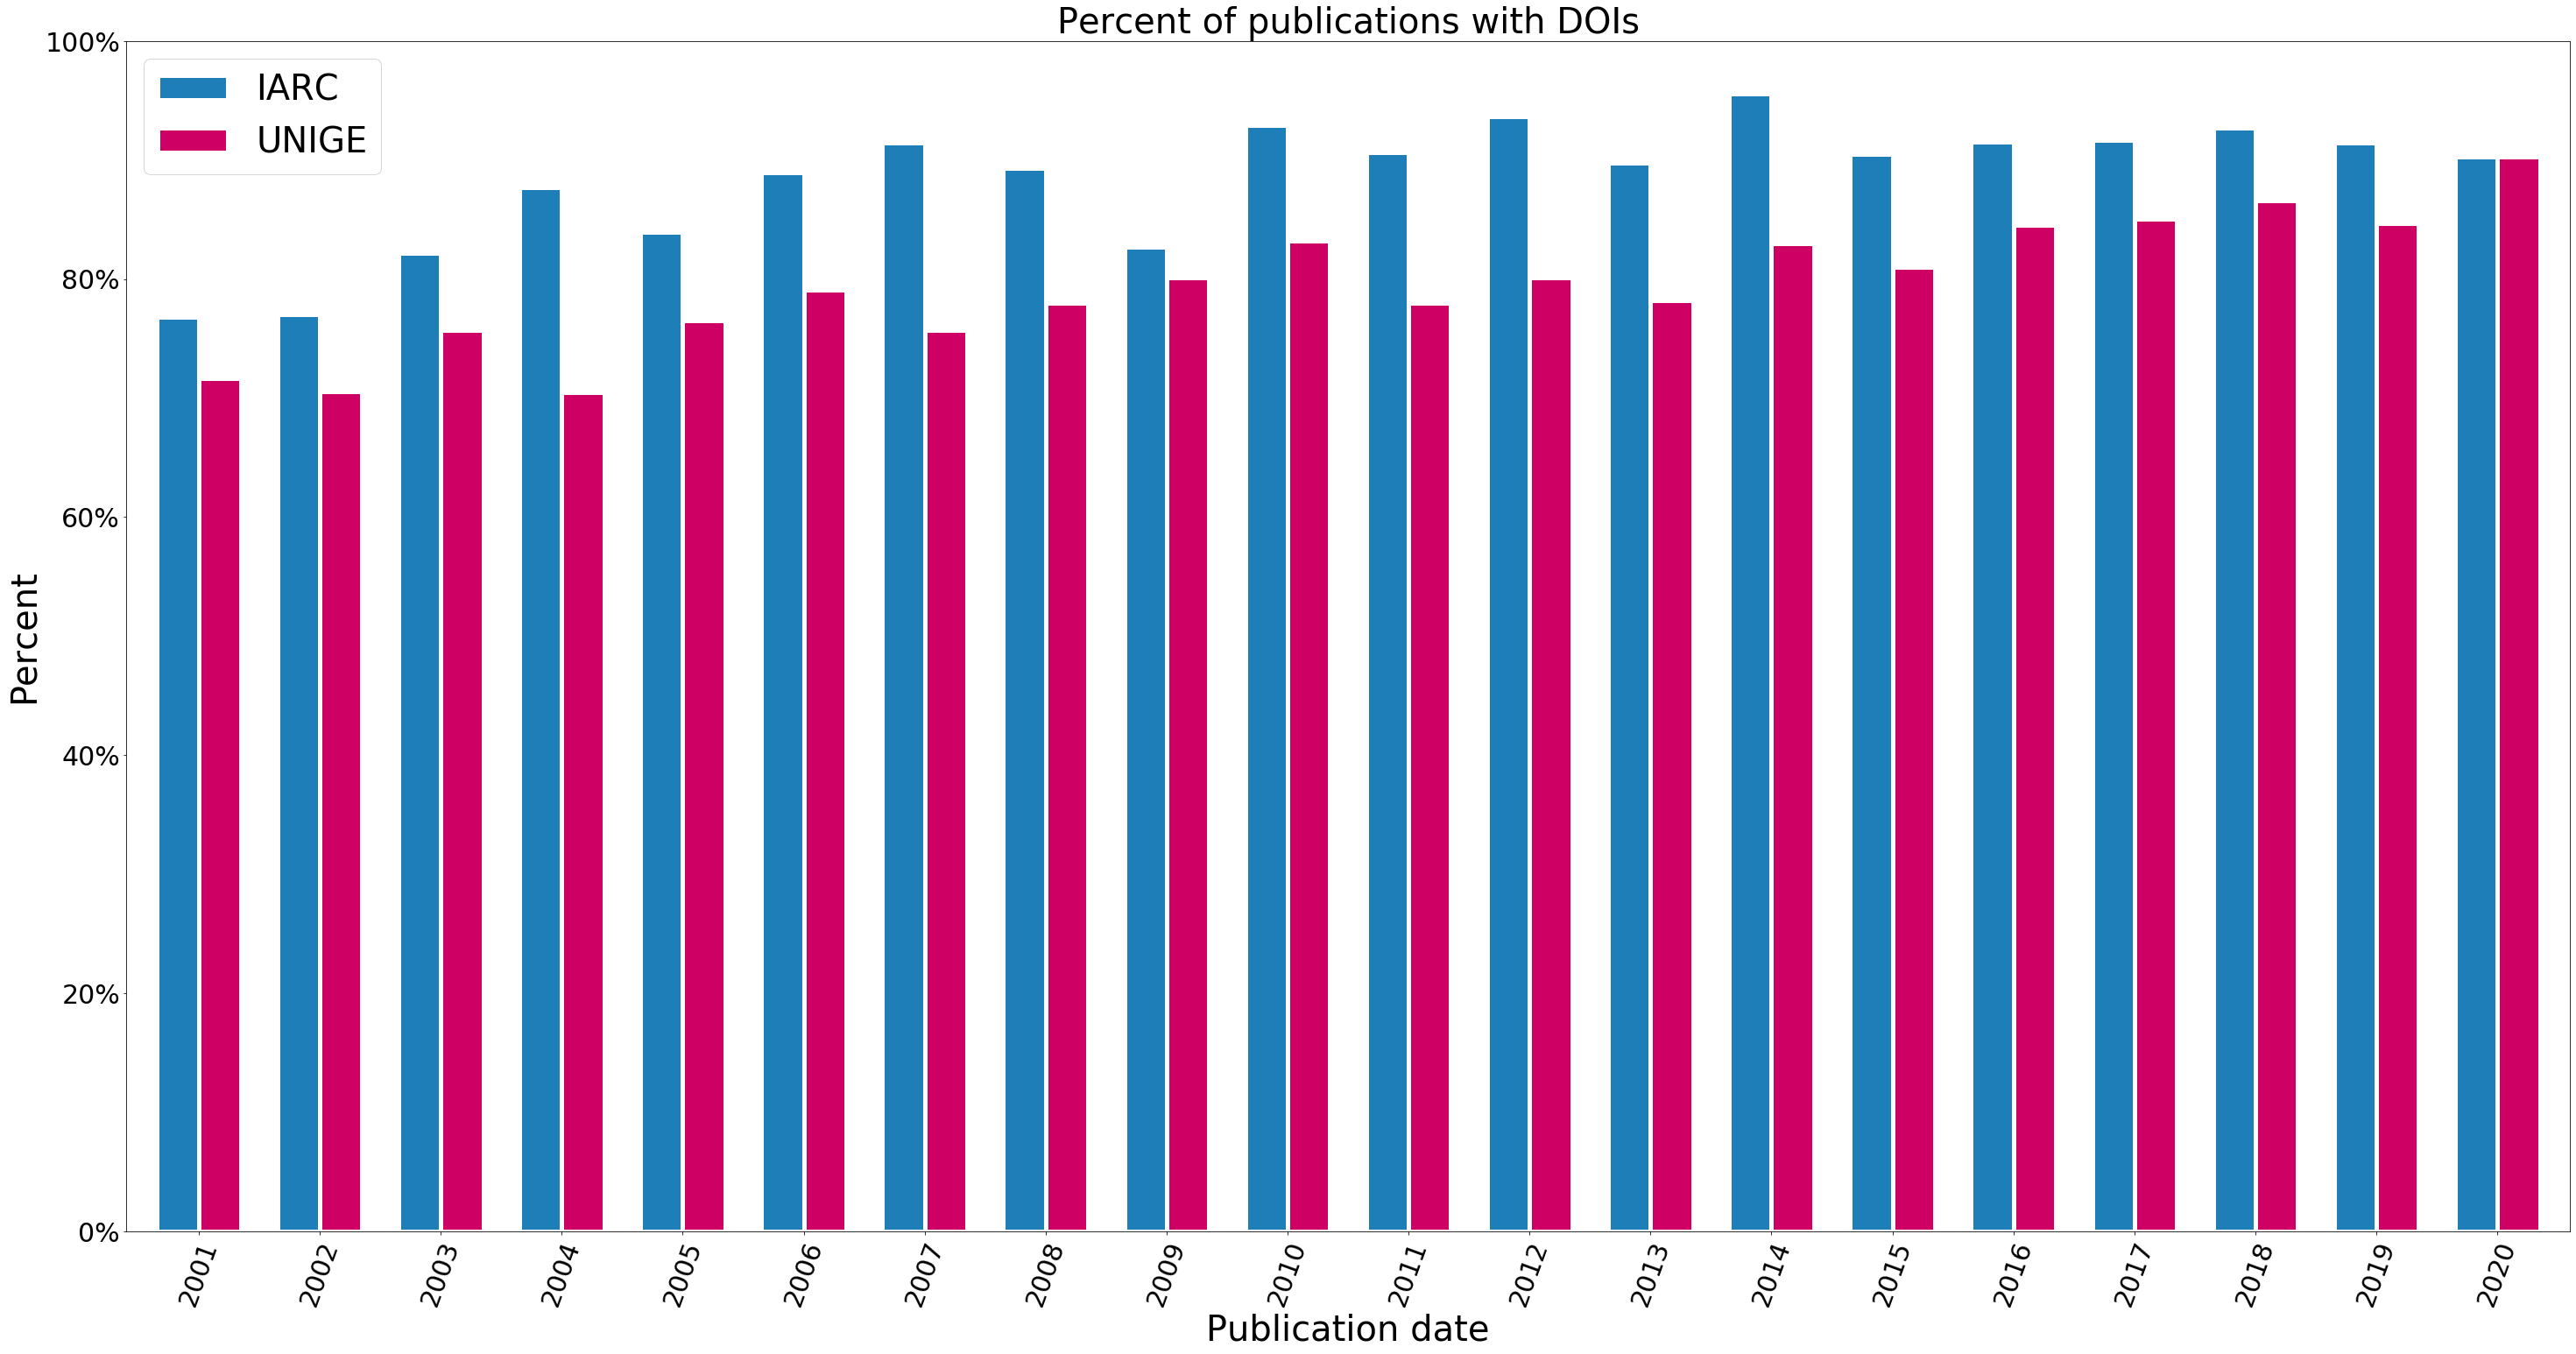

In [27]:
# year counts for publications
myfileoutfig = 'figures/25_iarc_unige_publications_with_doi_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = publications_with_dois_by_year.plot.bar(color=[IARC_color, UNIGE_color], rot=70, width=0.7, edgecolor='white', linewidth=5,xlim=[2000,2020], ylim=[0,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.set_title('Percent of publications with DOIs', fontsize=40)
ax = ax.legend(loc=2, prop={'size': 40})
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

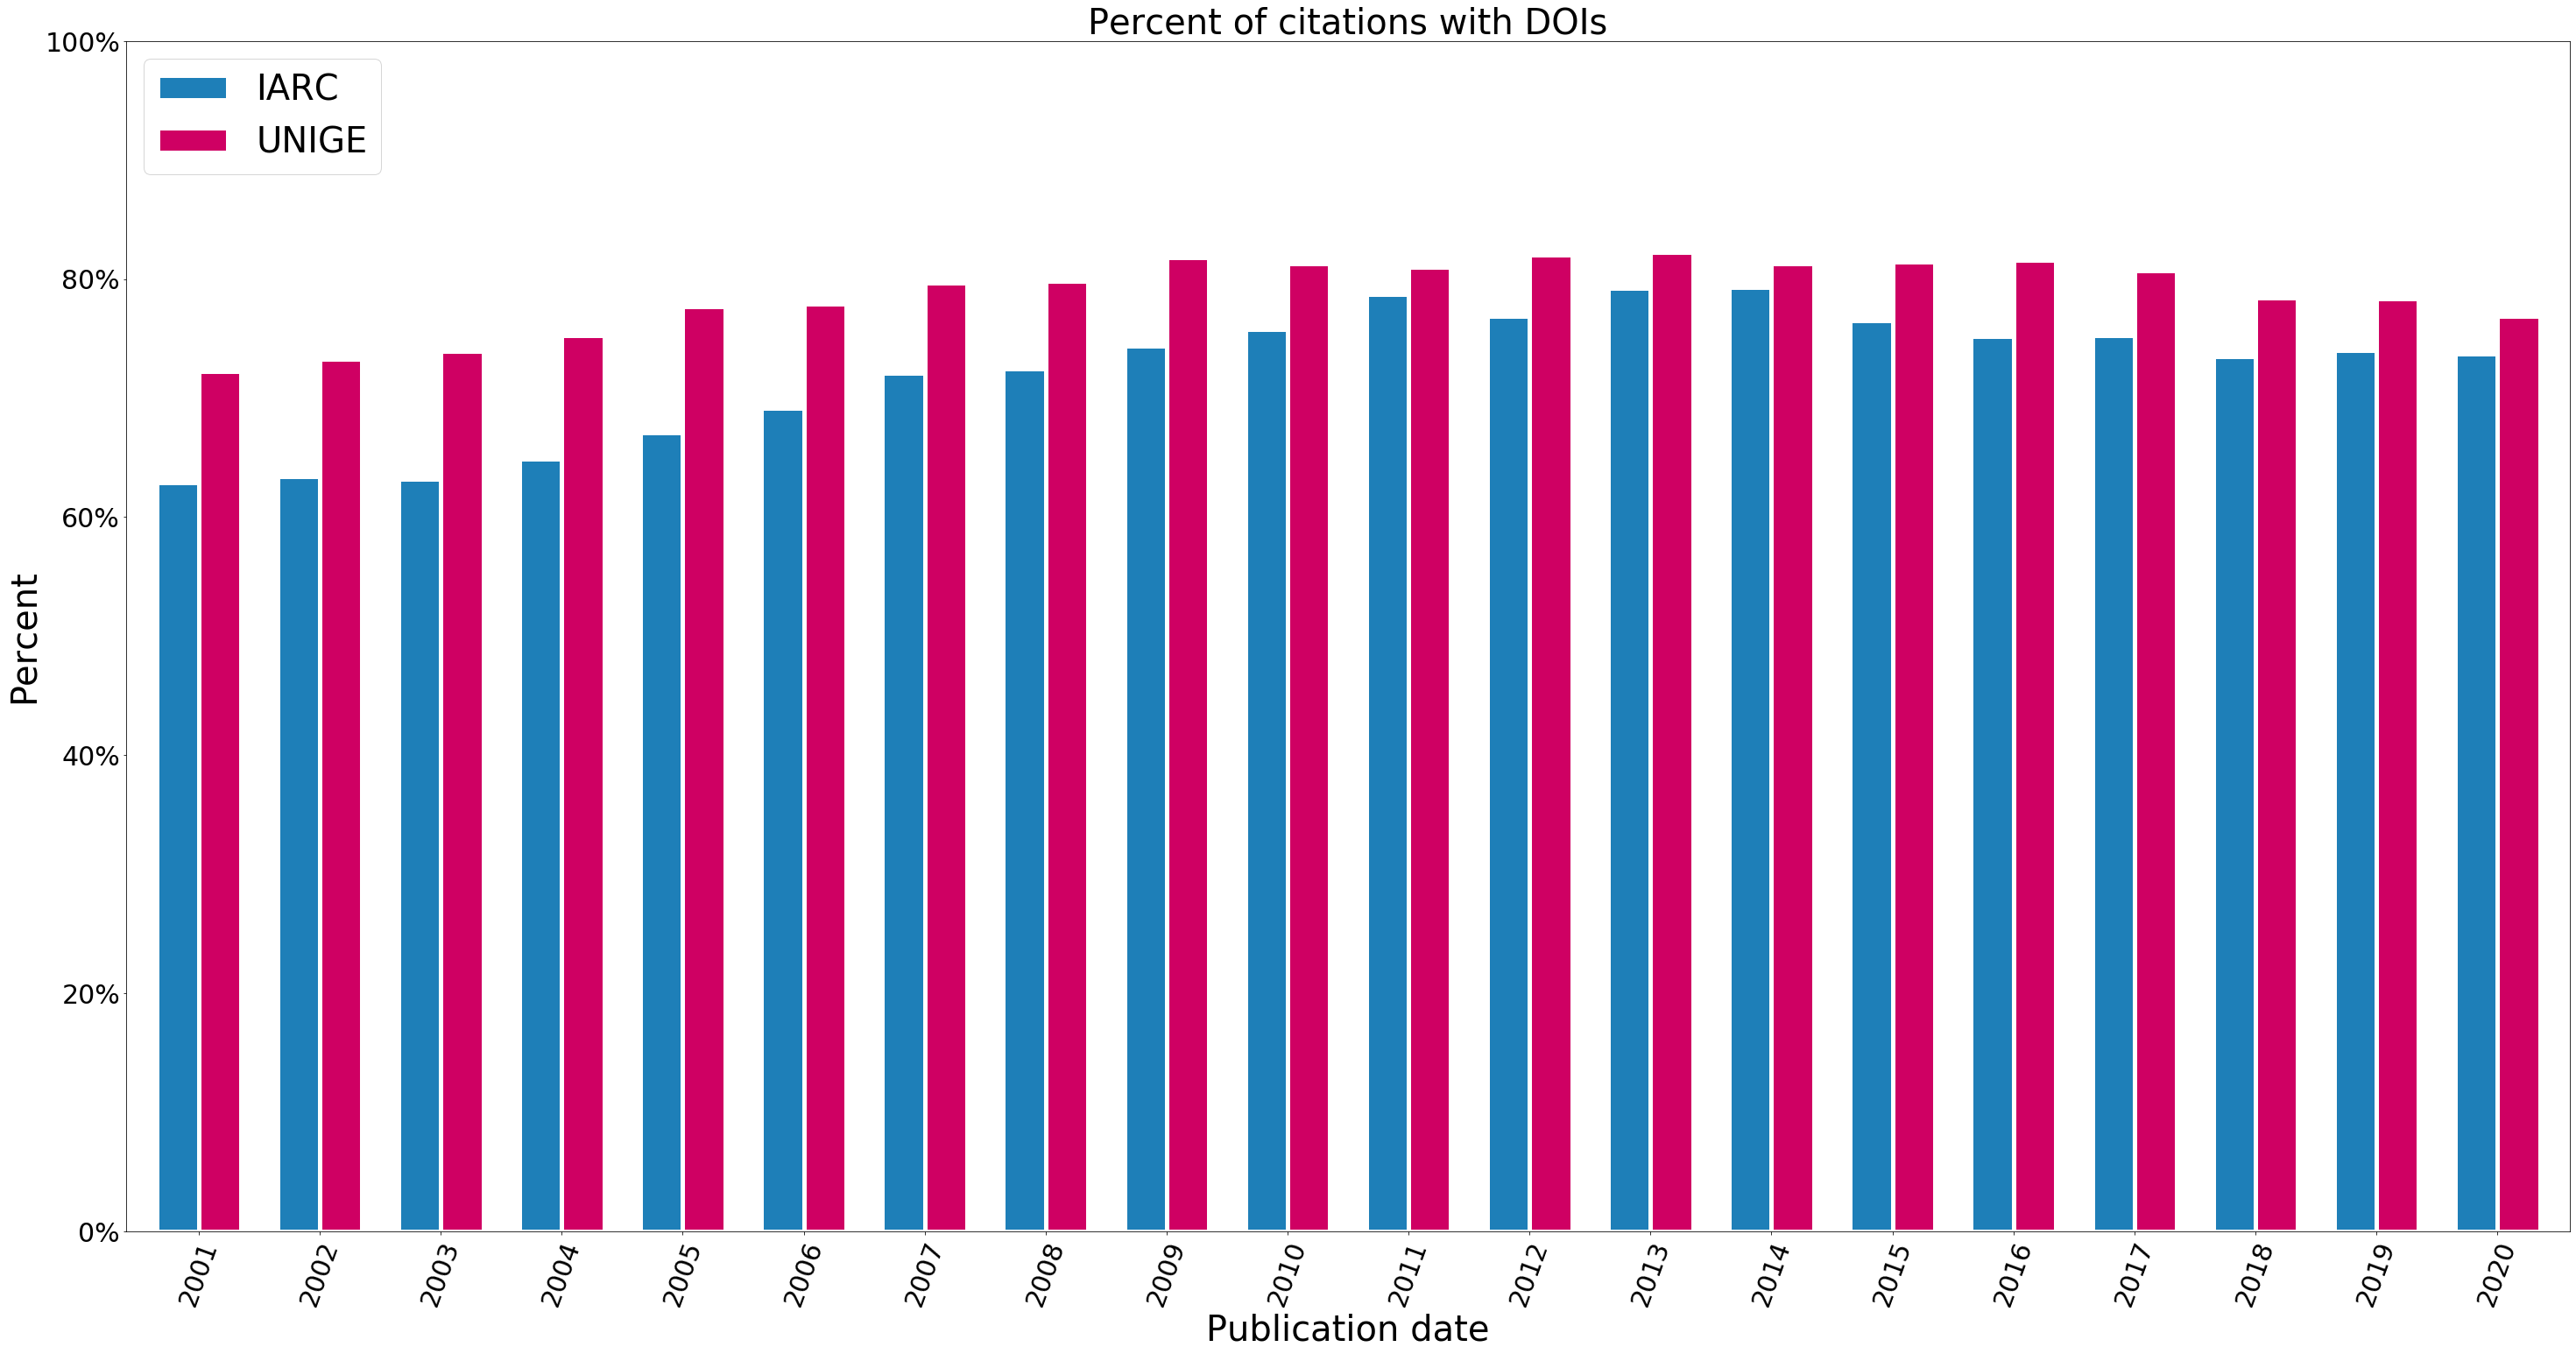

In [28]:
# year counts for citations
myfileoutfig = 'figures/25_iarc_unige_citations_with_doi_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = citations_with_dois_by_year.plot.bar(color=[IARC_color, UNIGE_color], rot=70, width=0.7, edgecolor='white', linewidth=5, xlim=[2000,2020], ylim=[0,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.set_title('Percent of citations with DOIs', fontsize=40)
ax = ax.legend(loc=2, prop={'size': 40})
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

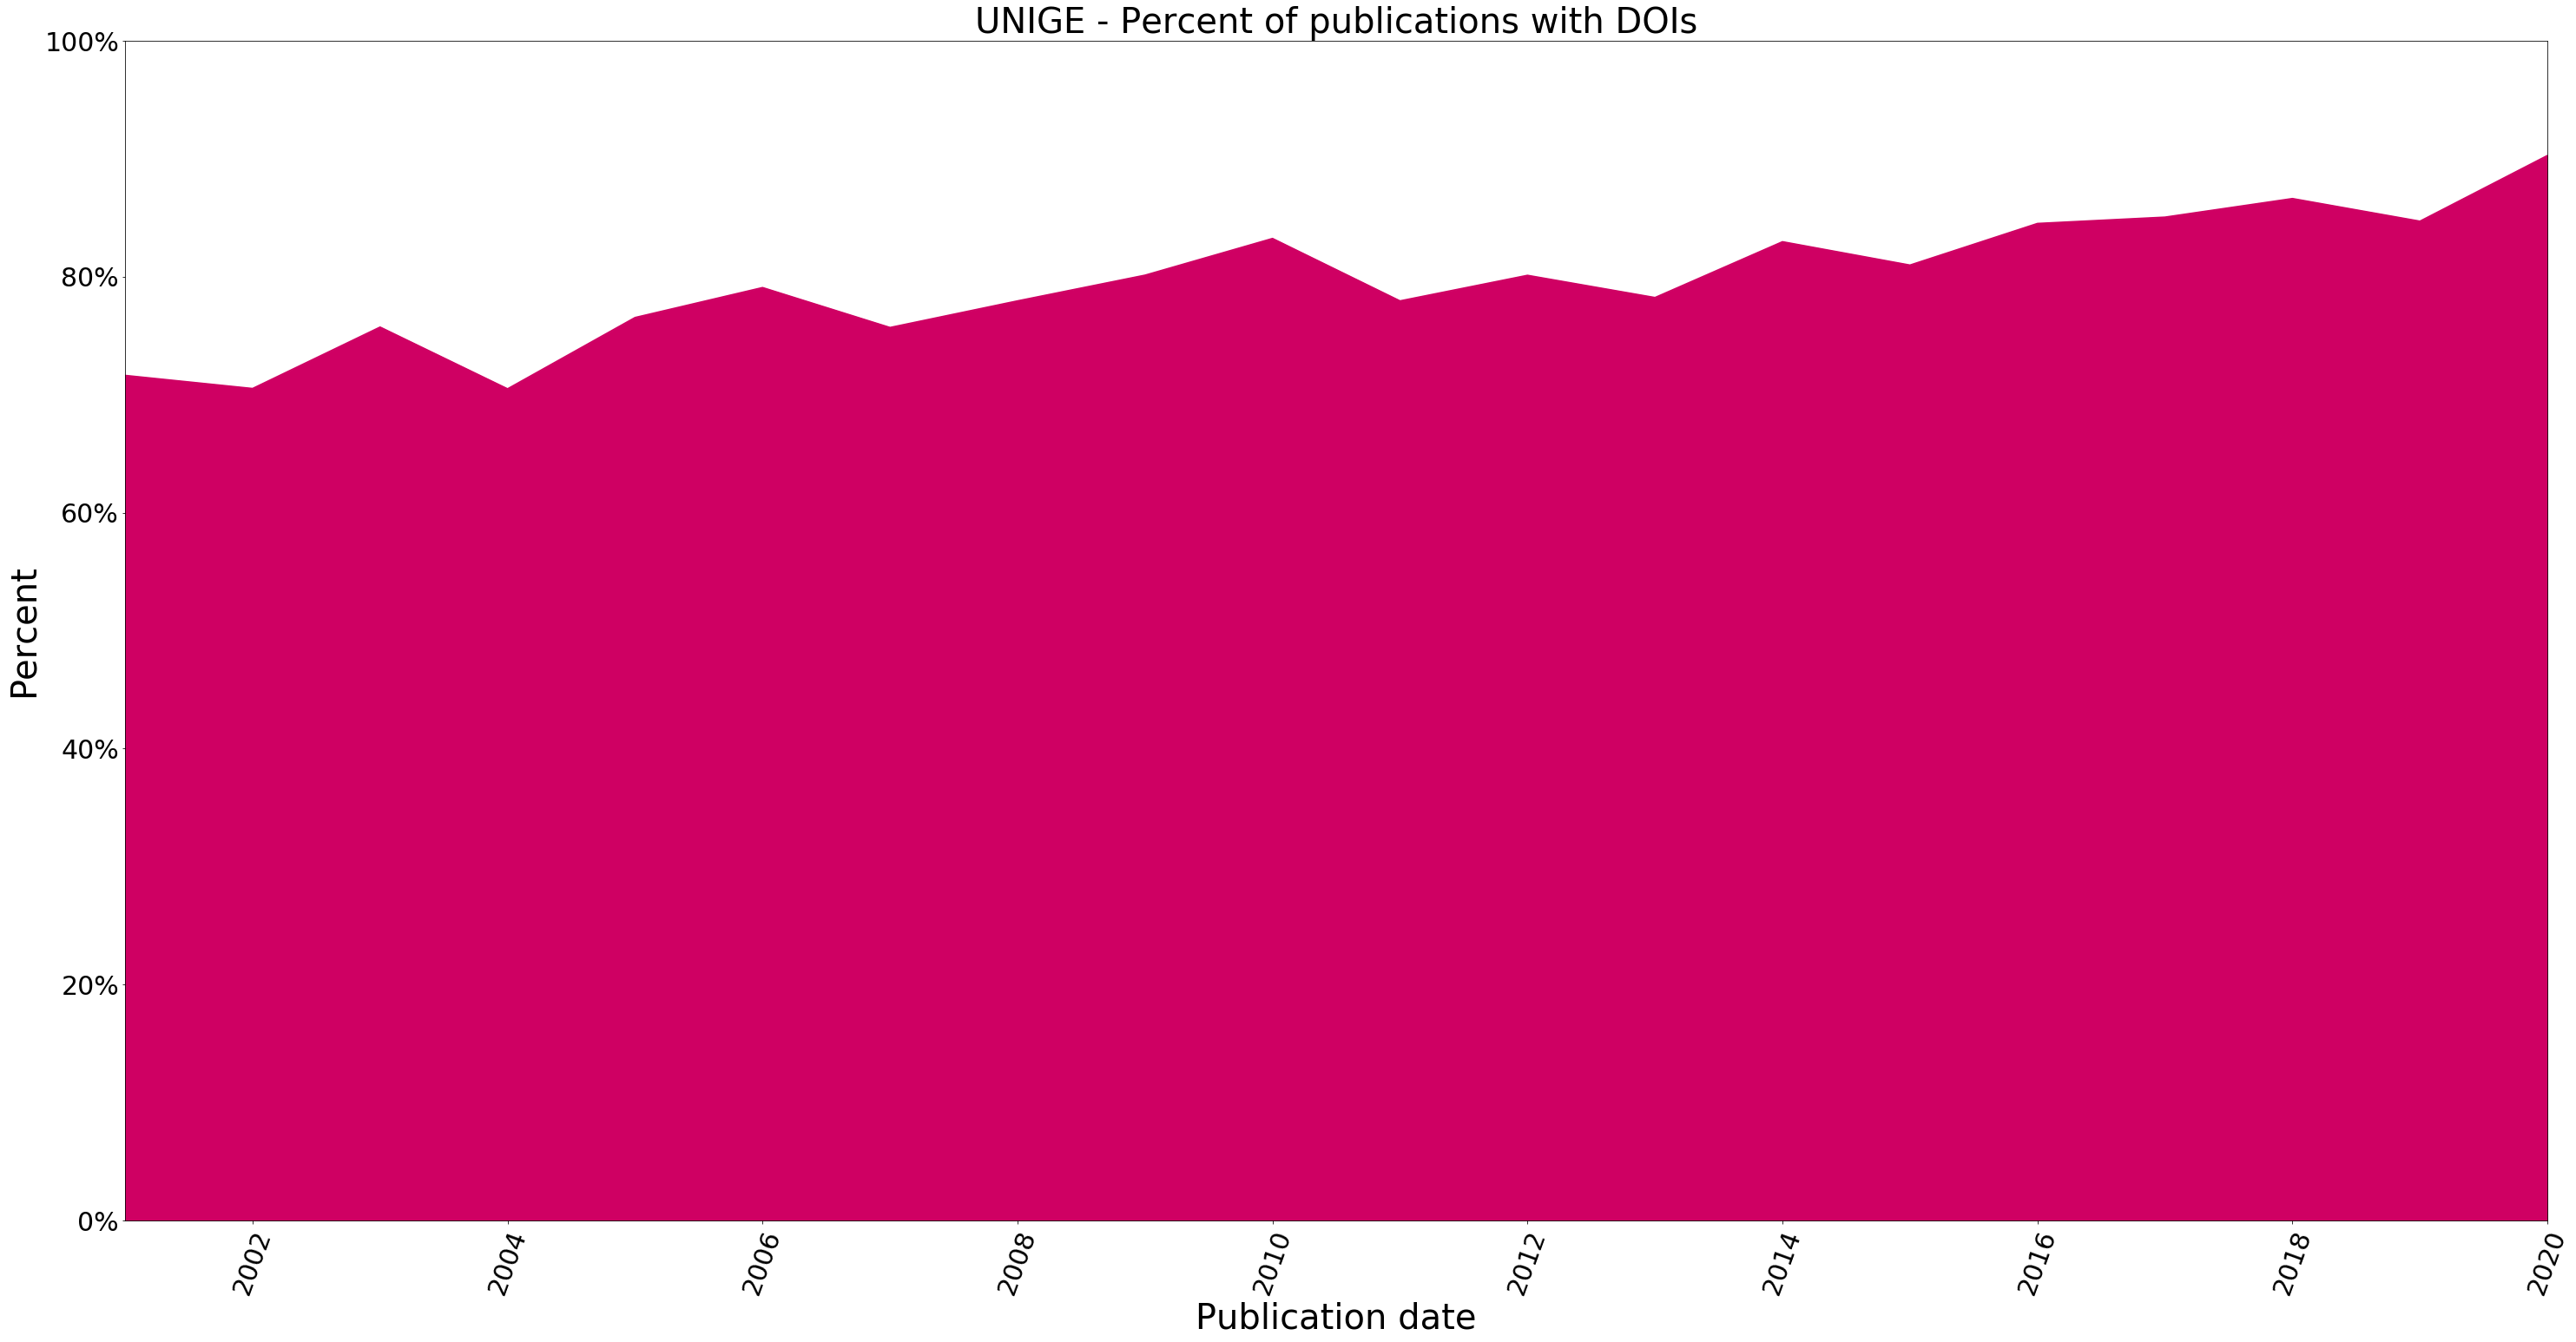

In [29]:
# UNIGE plot year counts for publications
unige_publications_with_dois_by_year_fig = unige_publications_with_dois_by_year[['publication_year', 'publication_doi_percent']]
unige_publications_with_dois_by_year_fig = unige_publications_with_dois_by_year_fig.set_index('publication_year')
myfileoutfig = 'figures/25_unige_publications_with_doi_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = unige_publications_with_dois_by_year_fig.plot.area(legend=False, rot=70, color=[UNIGE_color], xlim=[2001,2020], ylim=[0,1])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title('UNIGE - Percent of publications with DOIs', fontsize=40)
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

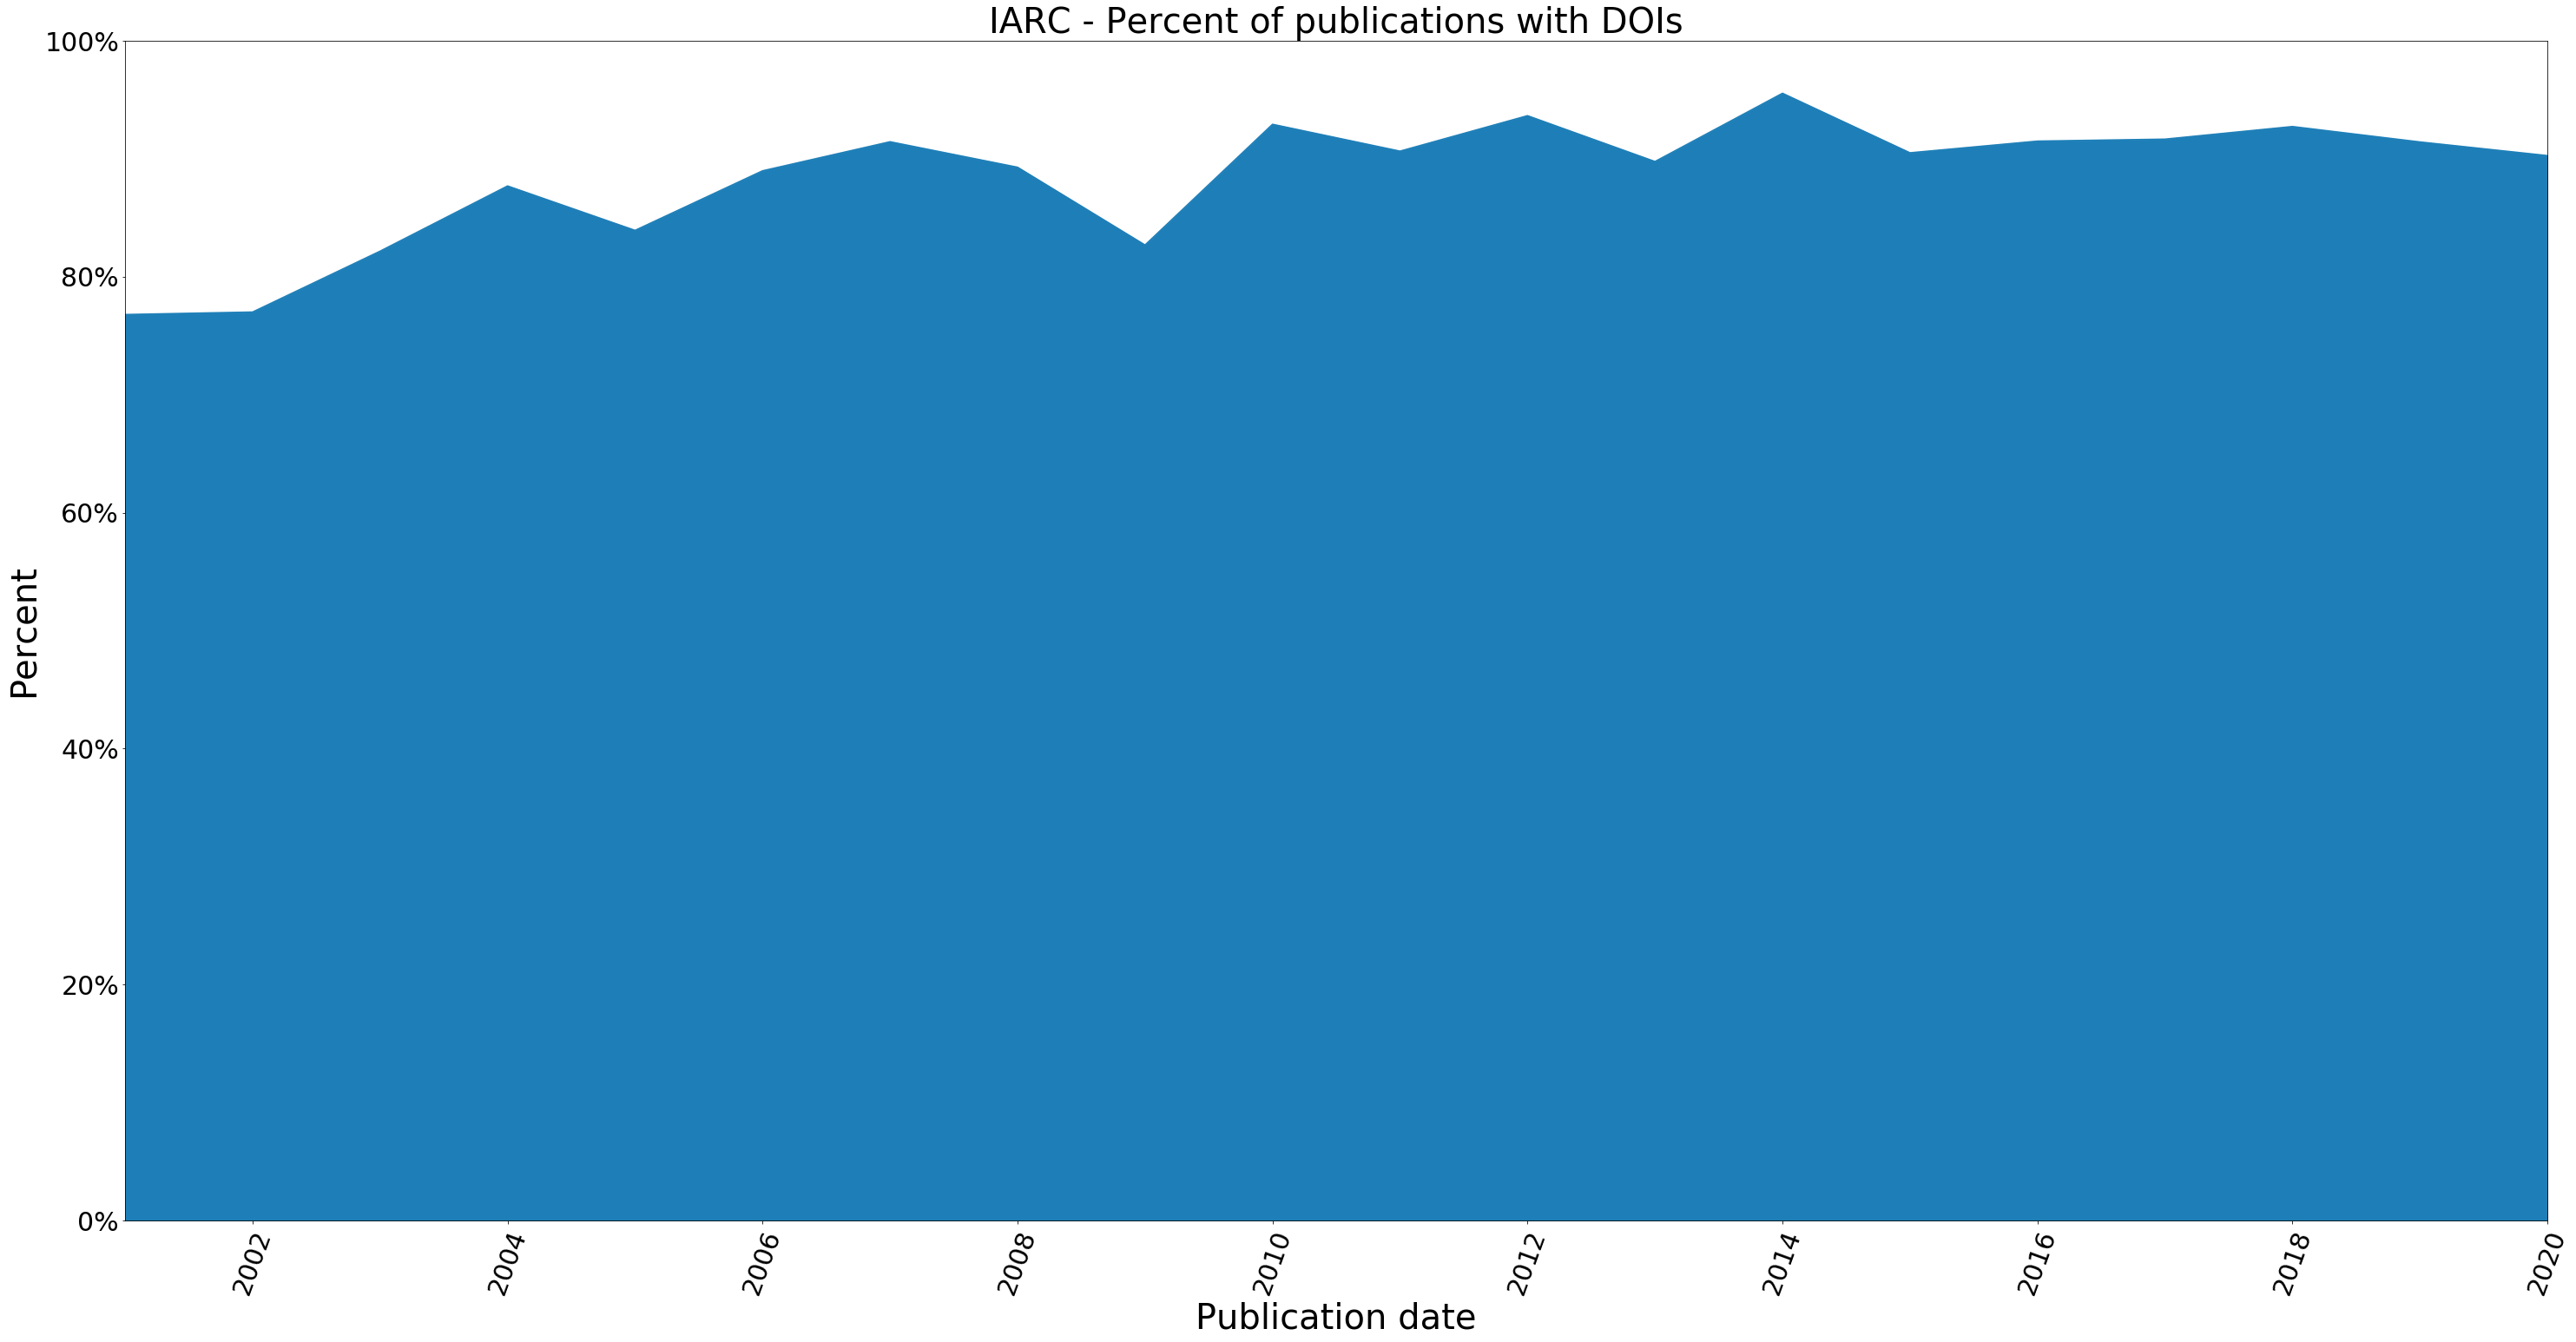

In [30]:
# IARC plot year counts for publications
iarc_publications_with_dois_by_year_fig = iarc_publications_with_dois_by_year[['publication_year', 'publication_doi_percent']]
iarc_publications_with_dois_by_year_fig = iarc_publications_with_dois_by_year_fig.set_index('publication_year')
myfileoutfig = 'figures/25_iarc_publications_with_doi_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = iarc_publications_with_dois_by_year_fig.plot.area(legend=False, rot=70, color=[IARC_color], xlim=[2001,2020], ylim=[0,1])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title('IARC - Percent of publications with DOIs', fontsize=40)
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

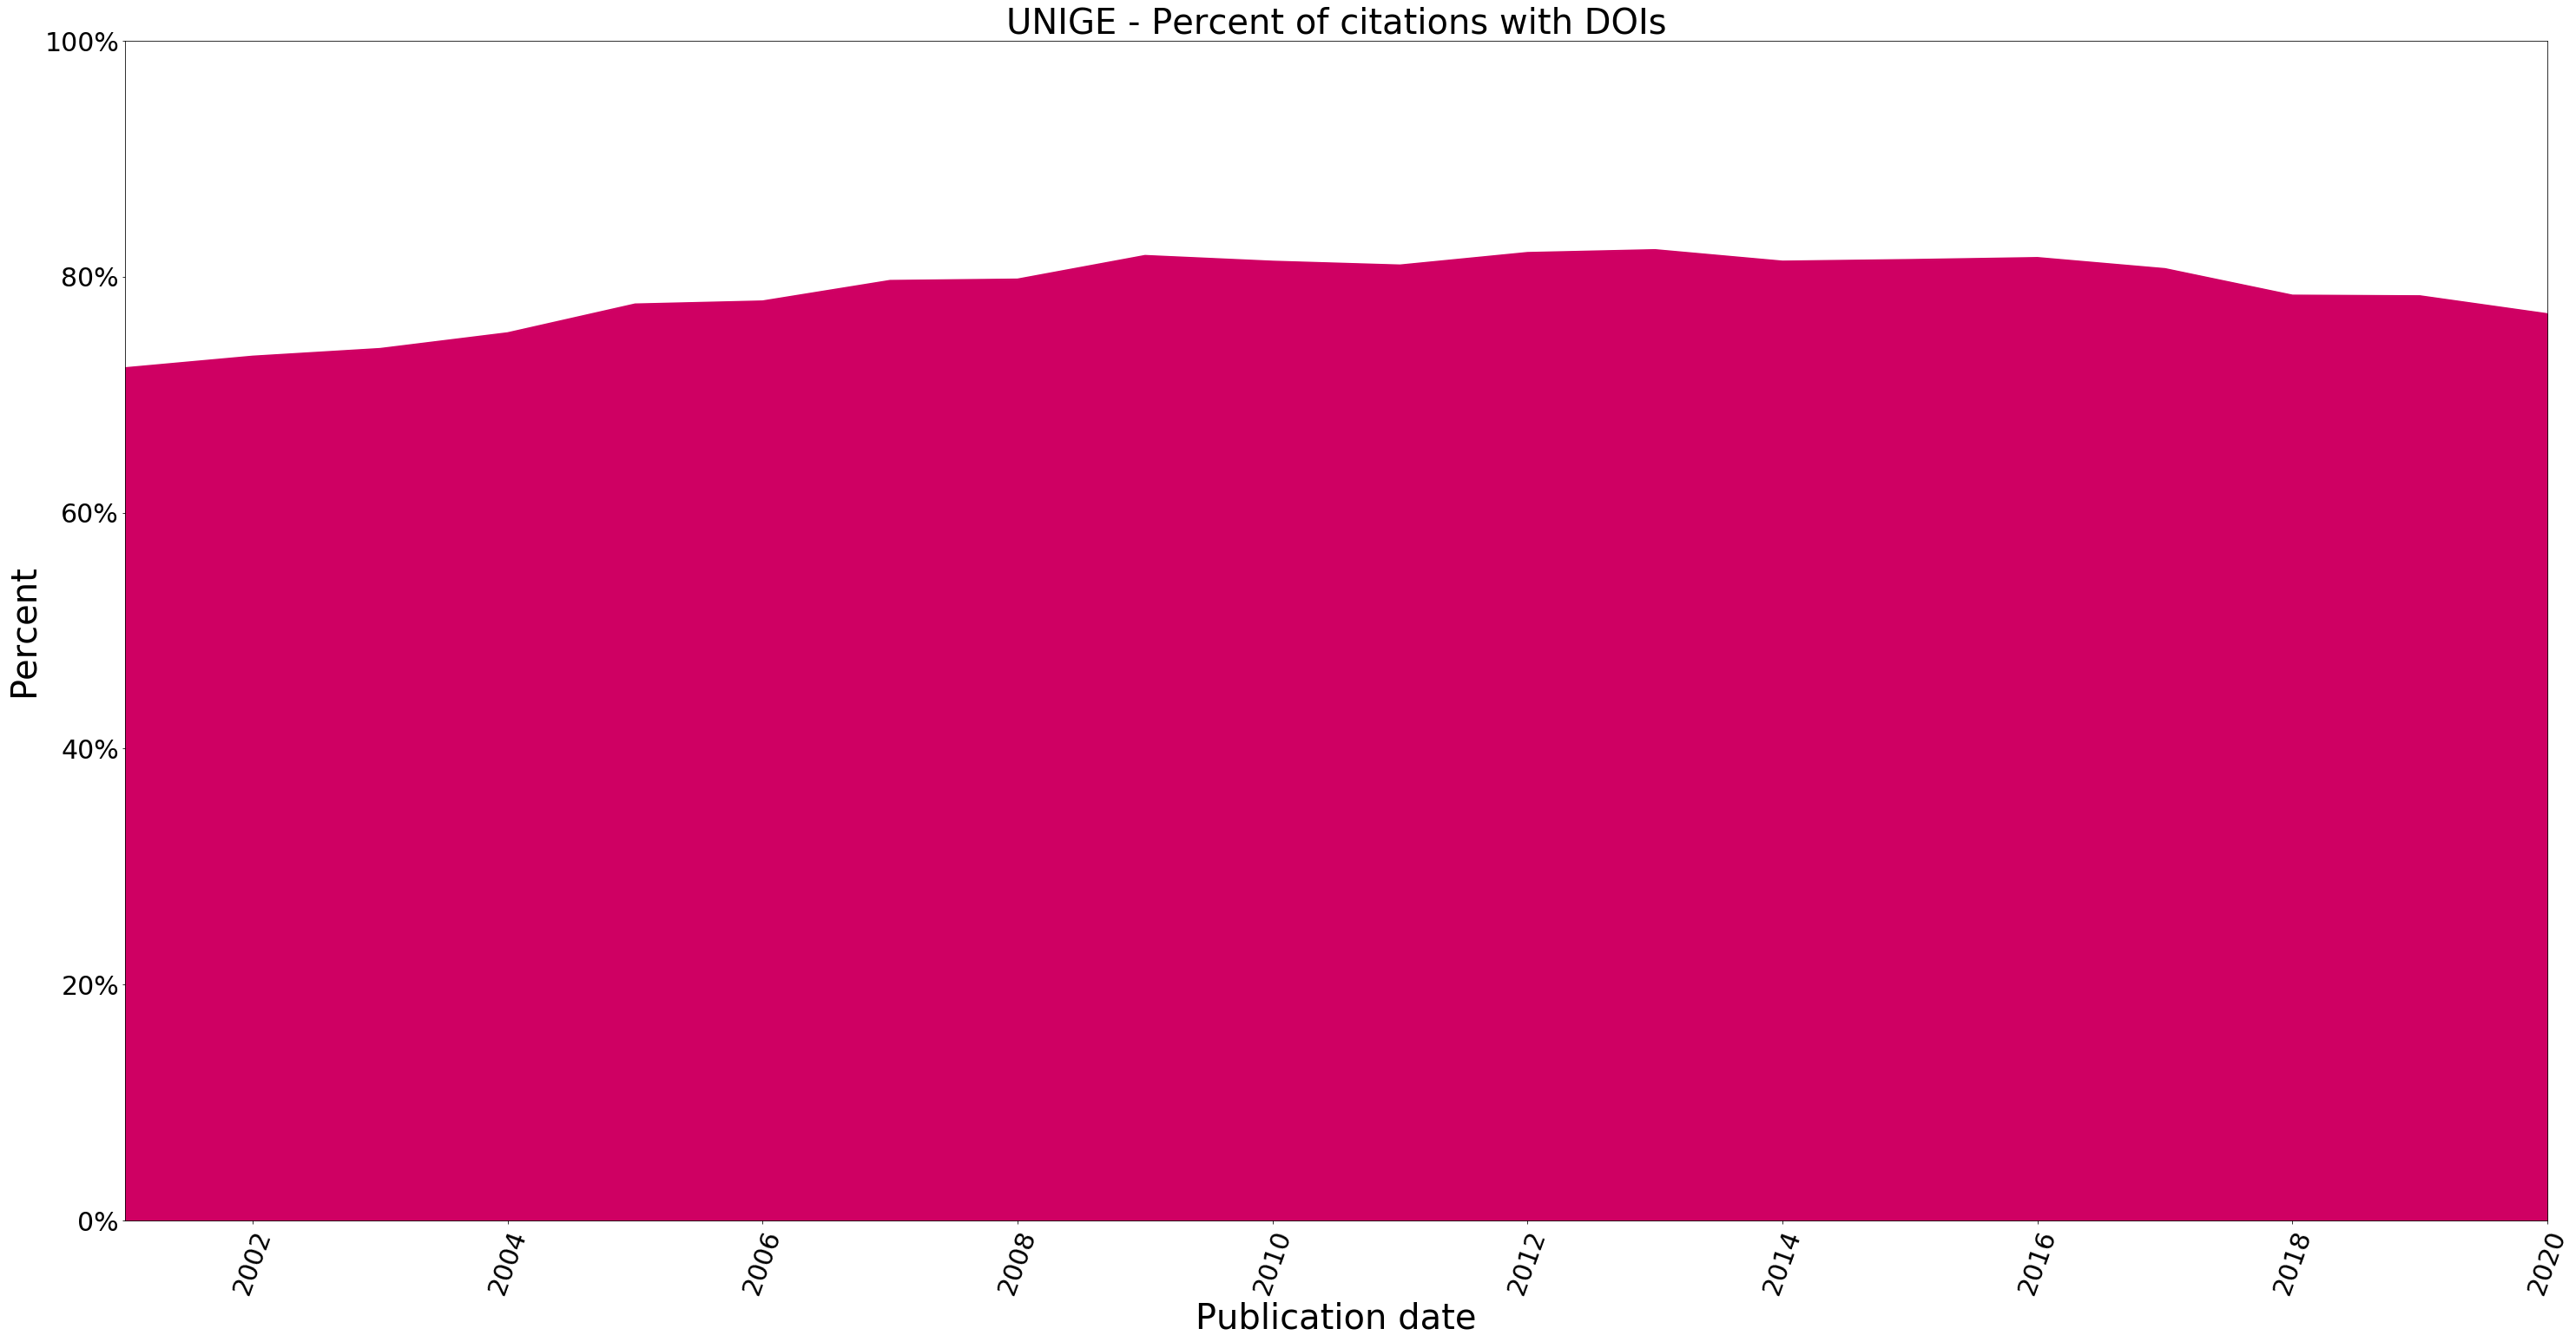

In [31]:
# UNIGE plot year counts for citations
unige_citations_with_dois_by_year_fig = unige_citations_with_dois_by_year[['publication_year', 'citation_doi_percent']]
unige_citations_with_dois_by_year_fig = unige_citations_with_dois_by_year_fig.set_index('publication_year')
myfileoutfig = 'figures/25_unige_citations_with_doi_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = unige_citations_with_dois_by_year_fig.plot.area(legend=False, rot=70, color=[UNIGE_color], xlim=[2001,2020], ylim=[0,1])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title('UNIGE - Percent of citations with DOIs', fontsize=40)
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

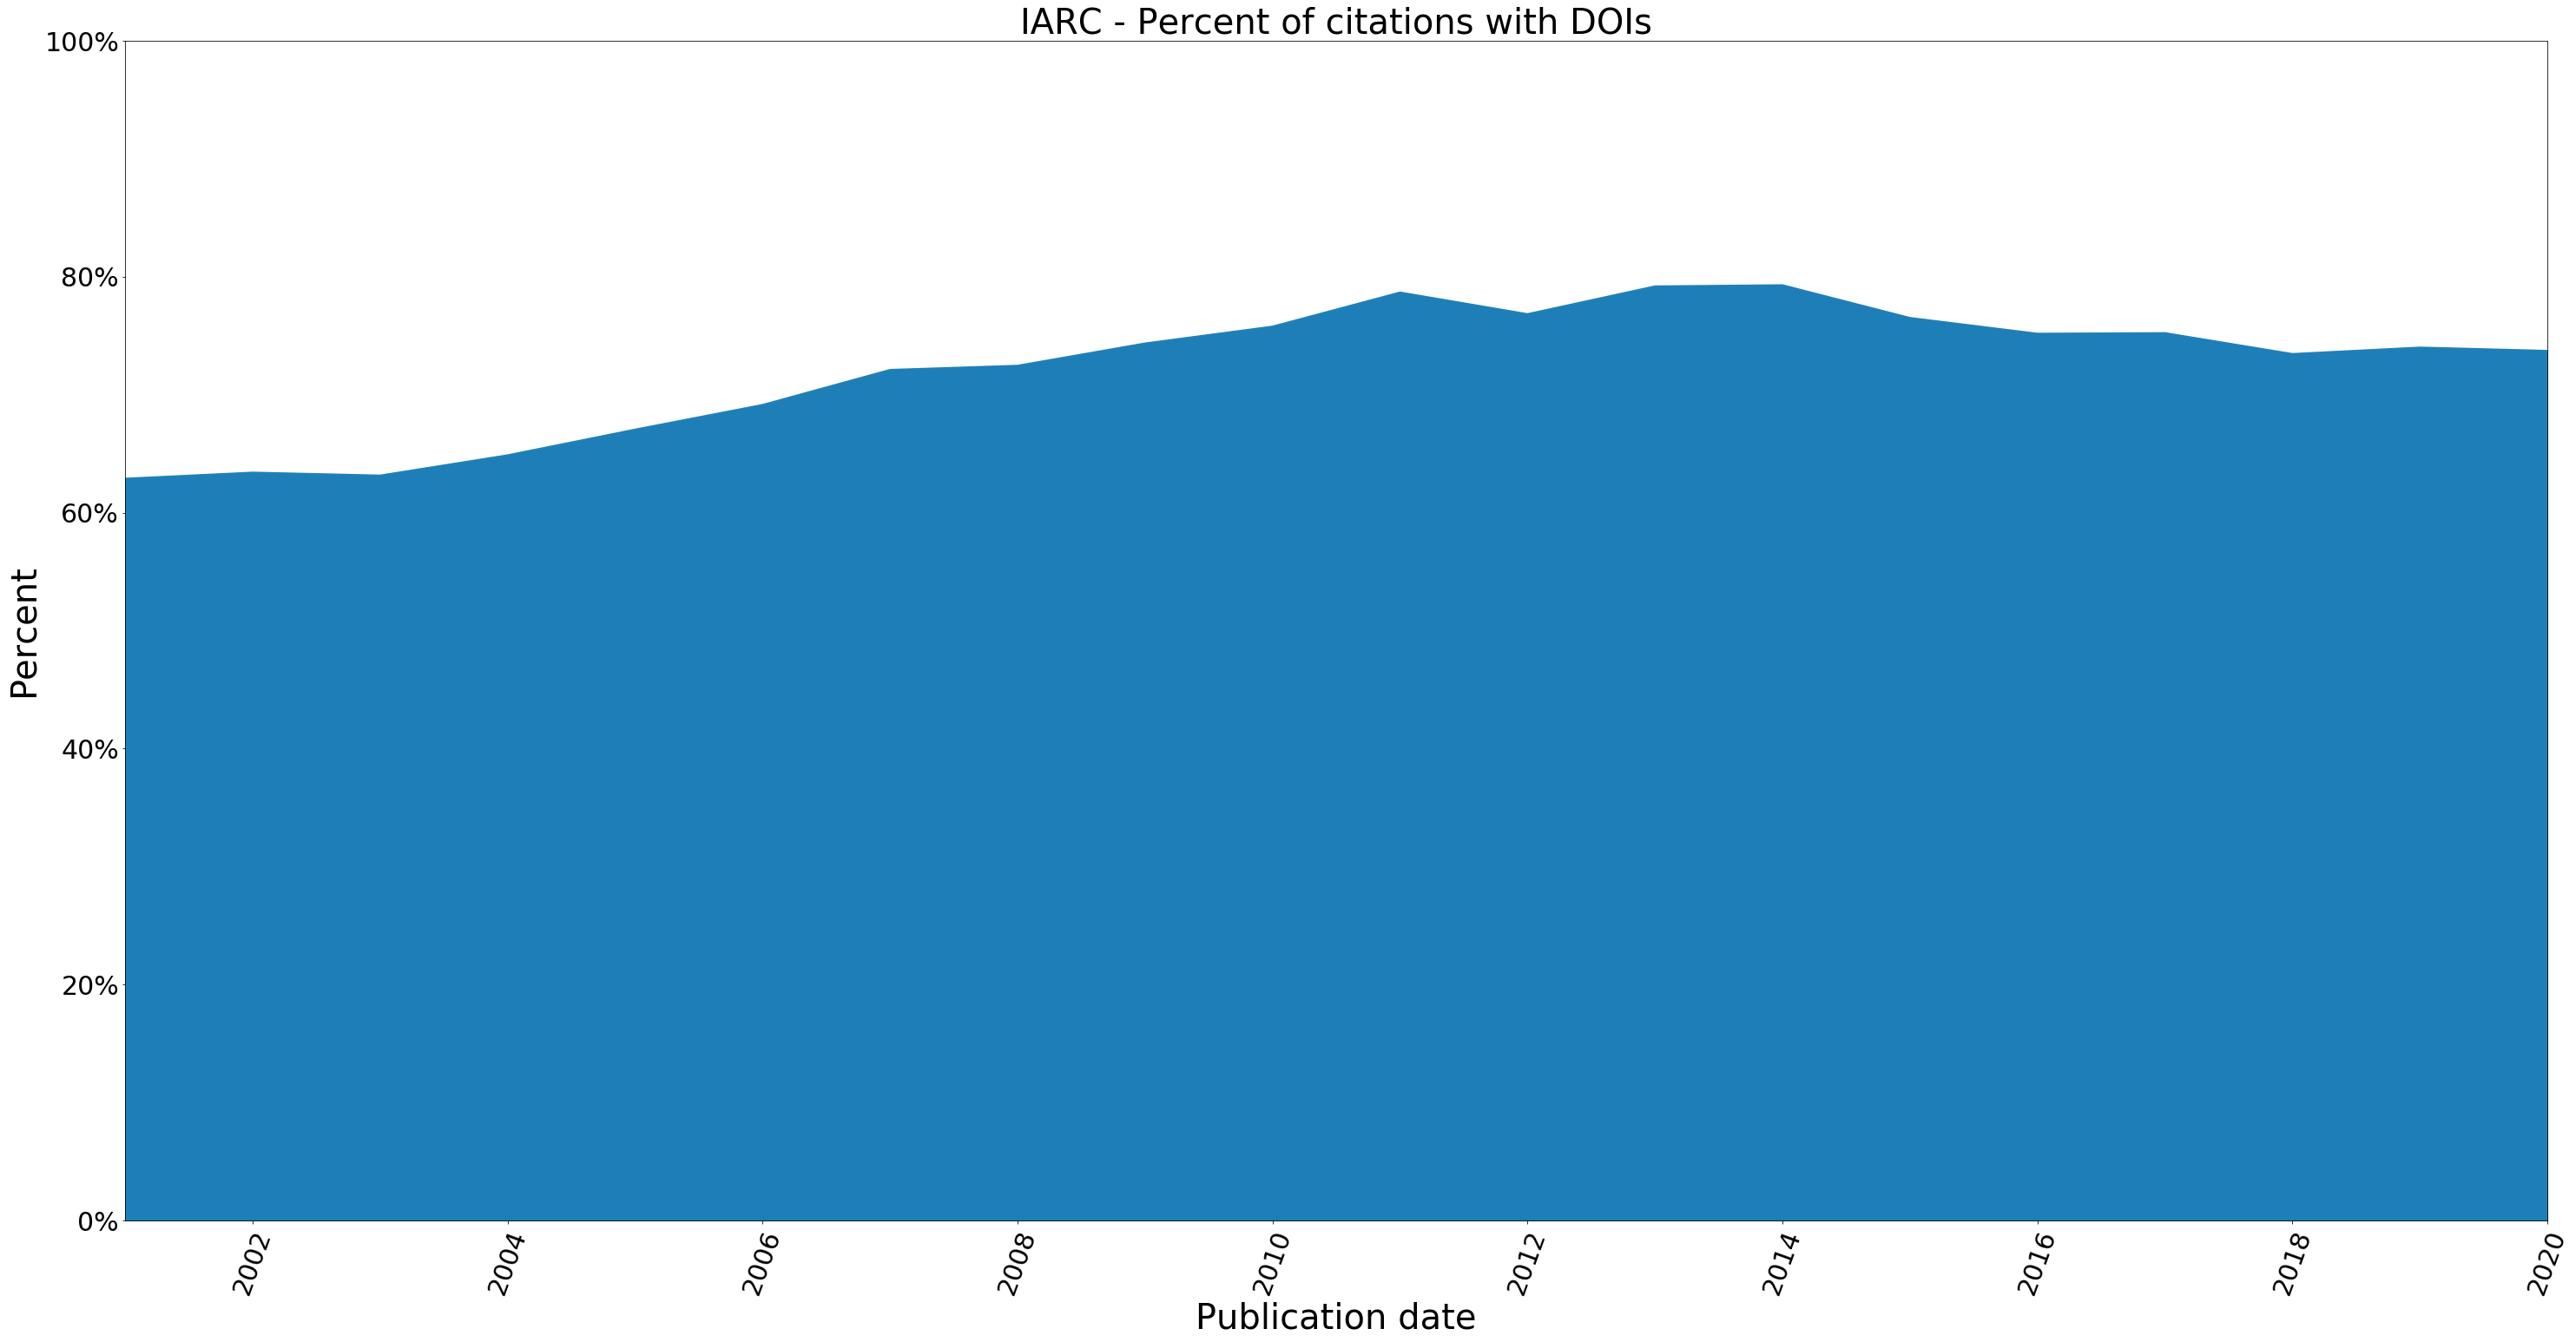

In [32]:
# IARC plot year counts for citations
iarc_citations_with_dois_by_year_fig = iarc_citations_with_dois_by_year[['publication_year', 'citation_doi_percent']]
iarc_citations_with_dois_by_year_fig = iarc_citations_with_dois_by_year_fig.set_index('publication_year')
myfileoutfig = 'figures/25_iarc_citations_with_doi_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = iarc_citations_with_dois_by_year_fig.plot.area(legend=False, rot=70, color=[IARC_color], xlim=[2001,2020], ylim=[0,1])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title('IARC - Percent of citations with DOIs', fontsize=40)
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

## 26. Self citation?

In [33]:
unige_all.columns

Index(['publication_wos_id', 'publication_year', 'publication_type',
       'publication_journal', 'publication_doi', 'publication_pmid',
       'publication_wos_oa', 'citation_year', 'citation_journal',
       'citation_doi', 'publication_doi_is_unige_publication',
       'publication_doi_is_unige_citation',
       'publication_doi_is_iarc_publication',
       'publication_doi_is_iarc_citation', 'publication_doi_oa_status',
       'publication_doi_has_repository_copy',
       'citation_doi_is_unige_publication', 'citation_doi_is_unige_citation',
       'citation_doi_is_iarc_publication', 'citation_doi_is_iarc_citation',
       'citation_doi_oa_status', 'citation_doi_has_repository_copy'],
      dtype='object')

In [34]:
# df for selfcitations
unige_publications_unige_citations = unige_all.loc[unige_all['publication_doi_is_unige_citation'].notna()].drop_duplicates(subset='publication_wos_id')
unige_citations_after_2000 = unige_all.loc[(unige_all['citation_doi'].notna()) & (unige_all['citation_year'] > 2000)]
unige_citations_after_2000_unige_publications = unige_all.loc[(unige_all['citation_doi_is_unige_publication'].notna()) & (unige_all['citation_year'] > 2000)]
iarc_publications_iarc_citations = iarc_all.loc[iarc_all['publication_doi_is_iarc_citation'].notna()].drop_duplicates(subset='publication_wos_id')
iarc_citations_after_2000 = iarc_all.loc[(iarc_all['citation_doi'].notna()) & (iarc_all['citation_year'] > 2000)]
iarc_citations_after_2000_iarc_publications = iarc_all.loc[(iarc_all['citation_doi_is_iarc_publication'].notna()) & (unige_all['citation_year'] > 2000)]

In [35]:
# UNIGE publication DOIs that are also UNIGE citation DOIs
unige_publications_unige_citations_n = unige_all.loc[unige_all['publication_doi_is_unige_citation'].notna()]['publication_wos_id'].nunique()
unige_publications_unige_citations_p = unige_publications_unige_citations_n / unige_publications_dois_n
print ('UNIGE publications : ' +  str(unige_publications_n))
print ('UNIGE publications with DOIs : ' +  str(unige_publications_dois_n))
print ('UNIGE publications with DOIs cited by UNIGE during the corpus years : ' + str(unige_publications_unige_citations_n))
print ('UNIGE publications with DOIs cited by UNIGE during the corpus years  % : ' + str(unige_publications_unige_citations_p))

UNIGE publications : 36370
UNIGE publications with DOIs : 29376
UNIGE publications with DOIs cited by UNIGE during the corpus years : 12353
UNIGE publications with DOIs cited by UNIGE during the corpus years  % : 0.42051334422657954


In [36]:
# IARC publication DOIs that are also IARC citation DOIs
iarc_publications_iarc_citations_n = iarc_all.loc[iarc_all['publication_doi_is_iarc_citation'].notna()]['publication_wos_id'].nunique()
iarc_publications_iarc_citations_p = iarc_publications_iarc_citations_n / iarc_publications_dois_n
print ('IARC publications : ' +  str(iarc_publications_n))
print ('IARC publications with DOIs : ' +  str(iarc_publications_dois_n))
print ('IARC publications with DOIs cited by IARC during the corpus years : ' + str(iarc_publications_iarc_citations_n))
print ('IARC publications with DOIs cited by IARC during the corpus years  % : ' + str(iarc_publications_iarc_citations_p))

IARC publications : 7268
IARC publications with DOIs : 6483
IARC publications with DOIs cited by IARC during the corpus years : 3516
IARC publications with DOIs cited by IARC during the corpus years  % : 0.5423415085608515


In [37]:
# UNIGE citations DOIs published after 2000 that are also UNIGE publication DOIs
unige_citations_after_2000_n = unige_all.loc[(unige_all['citation_doi'].notna()) & (unige_all['citation_year'] > 2000)].shape[0]
unige_citations_after_2000_unige_publications_n = unige_all.loc[(unige_all['citation_doi_is_unige_publication'].notna()) & (unige_all['citation_year'] > 2000)].shape[0]
unige_citations_after_2000_unige_publications_p = unige_citations_after_2000_unige_publications_n / unige_citations_after_2000_n
print ('UNIGE citations : ' +  str(unige_citations_n))
print ('UNIGE citations with DOIs : ' +  str(unige_citations_dois_n))
print ('UNIGE citations with DOIs published after 2000 : ' +  str(unige_citations_after_2000_n))
print ('UNIGE citations with DOIs published after 2000 that are also UNIGE publication : ' + str(unige_citations_after_2000_unige_publications_n))
print ('UNIGE citations with DOIs published after 2000 that are also UNIGE publication  % : ' + str(unige_citations_after_2000_unige_publications_p))

UNIGE citations : 1260981
UNIGE citations with DOIs : 999588
UNIGE citations with DOIs published after 2000 : 713687
UNIGE citations with DOIs published after 2000 that are also UNIGE publication : 44982
UNIGE citations with DOIs published after 2000 that are also UNIGE publication  % : 0.06302762975926421


In [38]:
# IARC citations DOIs published after 2000 that are also IARC publication DOIs
iarc_citations_after_2000_n = iarc_all.loc[(iarc_all['citation_doi'].notna()) & (iarc_all['citation_year'] > 2000)].shape[0]
iarc_citations_after_2000_iarc_publications_n = iarc_all.loc[(iarc_all['citation_doi_is_iarc_publication'].notna()) & (iarc_all['citation_year'] > 2000)].shape[0]
iarc_citations_after_2000_iarc_publications_p = iarc_citations_after_2000_iarc_publications_n / iarc_citations_after_2000_n
print ('IARC citations : ' +  str(iarc_citations_n))
print ('IARC citations with DOIs : ' +  str(iarc_citations_dois_n))
print ('IARC citations with DOIs published after 2000 : ' +  str(iarc_citations_after_2000_n))
print ('IARC citations with DOIs published after 2000 that are also IARC publication : ' + str(iarc_citations_after_2000_iarc_publications_n))
print ('IARC citations with DOIs published after 2000 that are also IARC publication  % : ' + str(iarc_citations_after_2000_iarc_publications_p))

IARC citations : 275622
IARC citations with DOIs : 201591
IARC citations with DOIs published after 2000 : 146188
IARC citations with DOIs published after 2000 that are also IARC publication : 21895
IARC citations with DOIs published after 2000 that are also IARC publication  % : 0.14977289517607464


In [39]:
# write  results on file
with open('26.txt', 'a') as f:
    f.write('26. Self citation?\n')
    f.write('----------------------------------------\n\n')
    f.write('PUBLICATIONS:\n\n')
    f.write('UNIGE publications : ' + str(unige_publications_n) + '\n')
    f.write('UNIGE publications with DOIs : ' +  str(unige_publications_dois_n) + '\n')
    f.write('UNIGE publications with DOIs cited by UNIGE during the corpus years : ' + str(unige_publications_unige_citations_n) + '\n')
    f.write('UNIGE publications with DOIs cited by UNIGE during the corpus years  % : ' + str(unige_publications_unige_citations_p) + '\n')
    f.write('  \n')
    f.write('IARC publications : ' + str(iarc_publications_n) + '\n')
    f.write('IARC publications with DOIs : ' +  str(iarc_publications_dois_n) + '\n')
    f.write('IARC publications with DOIs cited by IARC during the corpus years : ' + str(iarc_publications_iarc_citations_n) + '\n')
    f.write('IARC publications with DOIs cited by IARC during the corpus years  % : ' + str(iarc_publications_iarc_citations_p) + '\n')
    f.write('  \n')
    f.write('CITATIONS:\n\n')
    f.write('UNIGE citations : ' + str(unige_citations_n) + '\n')
    f.write('UNIGE citations with DOIs : ' + str(unige_citations_dois_n) + '\n')
    f.write('UNIGE citations with DOIs published after 2000 : ' +  str(unige_citations_after_2000_n) + '\n')
    f.write('UNIGE citations with DOIs published after 2000 that are also UNIGE publication : ' + str(unige_citations_after_2000_unige_publications_n) + '\n')
    f.write('UNIGE citations with DOIs published after 2000 that are also UNIGE publication  % : ' + str(unige_citations_after_2000_unige_publications_p) + '\n')
    f.write('  \n')
    f.write('IARC citations : ' + str(iarc_citations_n) + '\n')
    f.write('IARC citations with DOIs : ' + str(iarc_citations_dois_n) + '\n')
    f.write('IARC citations with DOIs published after 2000 : ' +  str(iarc_citations_after_2000_n) + '\n')
    f.write('IARC citations with DOIs published after 2000 that are also IARC publication : ' + str(iarc_citations_after_2000_iarc_publications_n) + '\n')
    f.write('IARC citations with DOIs published after 2000 that are also IARC publication  % : ' + str(iarc_citations_after_2000_iarc_publications_p) + '\n')

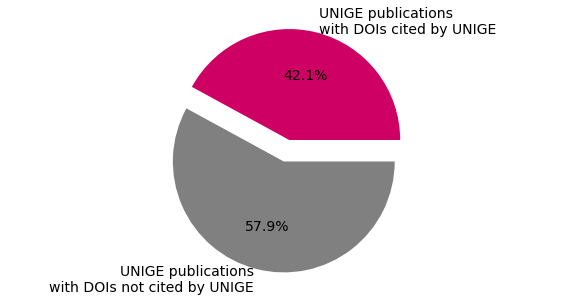

In [40]:
# UNIGE publications with DOI by year
%matplotlib inline
myfileoutfig = 'figures/26_unige_publications_pie_chart.png'
labels = 'UNIGE publications\nwith DOIs cited by UNIGE', 'UNIGE publications\nwith DOIs not cited by UNIGE'
sizes = [unige_publications_unige_citations_n,
         unige_publications_dois_n - unige_publications_unige_citations_n ]
explode = (0.1, 0.1)
colors = [UNIGE_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, dpi=200)
plt.show()

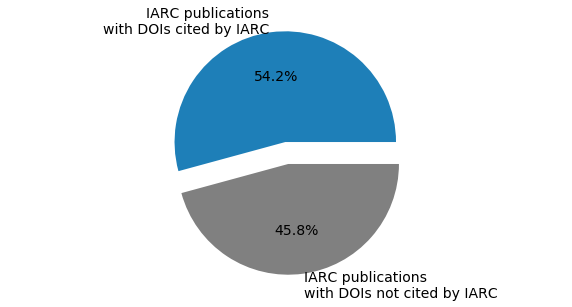

In [41]:
# IARC publications with DOI by year
%matplotlib inline
myfileoutfig = 'figures/26_iarc_publications_pie_chart.png'
labels = 'IARC publications\nwith DOIs cited by IARC', 'IARC publications\nwith DOIs not cited by IARC'
sizes = [iarc_publications_iarc_citations_n,
         iarc_publications_dois_n - iarc_publications_iarc_citations_n ]
explode = (0.1, 0.1)
colors = [IARC_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

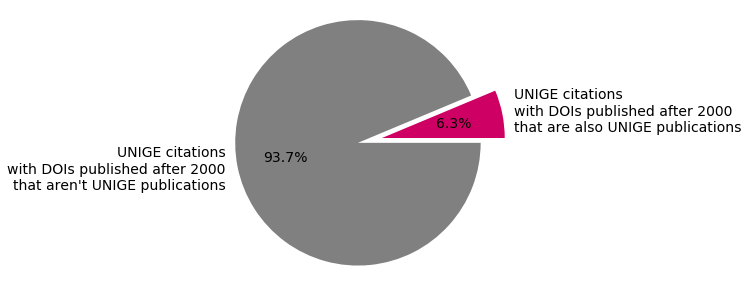

In [42]:
# UNIGE citations with DOI by year
%matplotlib inline
myfileoutfig = 'figures/26_unige_citations_pie_chart.png'
labels = 'UNIGE citations\nwith DOIs published after 2000\nthat are also UNIGE publications', 'UNIGE citations\nwith DOIs published after 2000\nthat aren\'t UNIGE publications'
sizes = [unige_citations_after_2000_unige_publications_n,
         unige_citations_after_2000_n - unige_citations_after_2000_unige_publications_n ]
explode = (0.1, 0.1)
colors = [UNIGE_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

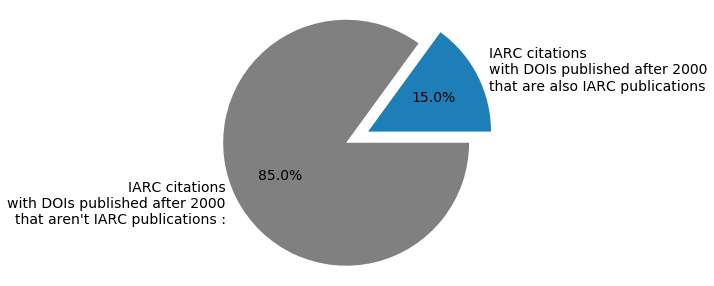

In [43]:
# IARC citations with DOI by year
%matplotlib inline
myfileoutfig = 'figures/26_iarc_citations_pie_chart.png'
labels = 'IARC citations\nwith DOIs published after 2000\nthat are also IARC publications', 'IARC citations\nwith DOIs published after 2000\nthat aren\'t IARC publications :'
sizes = [iarc_citations_after_2000_iarc_publications_n,
         iarc_citations_after_2000_n - iarc_citations_after_2000_iarc_publications_n ]
explode = (0.1, 0.1)
colors = [IARC_color, 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

## 26. Self citations evolve with time? 

In [44]:
# UNIGE publications with DOI and cited by UNIGE by year
unige_publications_with_dois_cited_by_unige_by_year = unige_publications_unige_citations['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publication_self_cited_count').sort_values(by='publication_year')
unige_publications_with_dois_counts = unige_publications_with_dois['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publications_with_doi_count').sort_values(by='publication_year')
# merge
unige_publications_with_dois_cited_by_unige_by_year = pd.merge(unige_publications_with_dois_cited_by_unige_by_year, unige_publications_with_dois_counts, on='publication_year')
# add %
unige_publications_with_dois_cited_by_unige_by_year['publication_self_cited_percent'] = unige_publications_with_dois_cited_by_unige_by_year['publication_self_cited_count'] / unige_publications_with_dois_cited_by_unige_by_year['publications_with_doi_count']
# remove errors
unige_publications_with_dois_cited_by_unige_by_year = unige_publications_with_dois_cited_by_unige_by_year.loc[(unige_publications_with_dois_cited_by_unige_by_year['publication_year'] > 2000) & (unige_publications_with_dois_cited_by_unige_by_year['publication_year'] < 2021)]
unige_publications_with_dois_cited_by_unige_by_year

,publication_year,publication_self_cited_count,publications_with_doi_count,publication_self_cited_percent
1,2001,488,821,0.594397
2,2002,525,876,0.599315
3,2003,552,949,0.581665
4,2004,624,1035,0.602899
5,2005,566,1002,0.564870
6,2006,639,1195,0.534728
7,2007,615,1159,0.530630
8,2008,709,1305,0.543295
9,2009,739,1408,0.524858
10,2010,739,1466,0.504093


In [45]:
# UNIGE publications export 26 csv and excel
unige_publications_with_dois_cited_by_unige_by_year.to_csv('results/26_unige_publications_with_doi_self_cited_by_year.csv', index=False, sep='\t', encoding='utf-8')
unige_publications_with_dois_cited_by_unige_by_year.to_excel('results/26_unige_publications_with_doi_self_cited_by_year.xlsx', index=False)

In [46]:
# IARC publications with DOI and cited by IARC by year
iarc_publications_with_dois_cited_by_iarc_by_year = iarc_publications_iarc_citations['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publication_self_cited_count').sort_values(by='publication_year')
iarc_publications_with_dois_counts = iarc_publications_with_dois['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publications_with_doi_count').sort_values(by='publication_year')
# merge
iarc_publications_with_dois_cited_by_iarc_by_year = pd.merge(iarc_publications_with_dois_cited_by_iarc_by_year, iarc_publications_with_dois_counts, on='publication_year')
# add %
iarc_publications_with_dois_cited_by_iarc_by_year['publication_self_cited_percent'] = iarc_publications_with_dois_cited_by_iarc_by_year['publication_self_cited_count'] / iarc_publications_with_dois_cited_by_iarc_by_year['publications_with_doi_count']
# remove errors
iarc_publications_with_dois_cited_by_iarc_by_year = iarc_publications_with_dois_cited_by_iarc_by_year.loc[(iarc_publications_with_dois_cited_by_iarc_by_year['publication_year'] > 2000) & (iarc_publications_with_dois_cited_by_iarc_by_year['publication_year'] < 2021)]
iarc_publications_with_dois_cited_by_iarc_by_year

,publication_year,publication_self_cited_count,publications_with_doi_count,publication_self_cited_percent
0,2001,131,192,0.682292
1,2002,150,201,0.746269
2,2003,161,212,0.759434
3,2004,157,221,0.710407
4,2005,177,256,0.691406
5,2006,215,315,0.682540
6,2007,223,310,0.719355
7,2008,207,325,0.636923
8,2009,203,301,0.674419
9,2010,192,289,0.664360


In [47]:
# IARC publications export 26 csv and excel
iarc_publications_with_dois_cited_by_iarc_by_year.to_csv('results/26_iarc_publications_with_doi_self_cited_by_year.csv', index=False, sep='\t', encoding='utf-8')
iarc_publications_with_dois_cited_by_iarc_by_year.to_excel('results/26_iarc_publications_with_doi_self_cited_by_year.xlsx', index=False)

In [48]:
# UNIGE citations with DOI that are also UNIGE publication by year of primary publication
unige_citations_after_2000_unige_publications_by_year = unige_citations_after_2000_unige_publications['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='self_citation_doi_count').sort_values(by='publication_year')
unige_citations_after_2000_counts = unige_citations_after_2000['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citations_after_2000_count').sort_values(by='publication_year')
# merge
unige_citations_after_2000_unige_publications_by_year = pd.merge(unige_citations_after_2000_unige_publications_by_year, unige_citations_after_2000_counts, on='publication_year')
# add %
unige_citations_after_2000_unige_publications_by_year['self_citation_doi_percent'] = unige_citations_after_2000_unige_publications_by_year['self_citation_doi_count'] / unige_citations_after_2000_unige_publications_by_year['citations_after_2000_count']
# remove errors
unige_citations_after_2000_unige_publications_by_year = unige_citations_after_2000_unige_publications_by_year.loc[(unige_citations_after_2000_unige_publications_by_year['publication_year'] > 2000) & (unige_citations_after_2000_unige_publications_by_year['publication_year'] < 2021)]
unige_citations_after_2000_unige_publications_by_year

,publication_year,self_citation_doi_count,citations_after_2000_count,self_citation_doi_percent
0,2001,89,585,0.152137
1,2002,423,3285,0.128767
2,2003,774,6718,0.115213
3,2004,1140,11510,0.099044
4,2005,1269,13565,0.093550
5,2006,1608,19618,0.081966
6,2007,1701,22186,0.076670
7,2008,1943,27015,0.071923
8,2009,2360,33517,0.070412
9,2010,2300,34872,0.065955


In [49]:
# UNIGE self citations export 25 csv and excel
unige_citations_after_2000_unige_publications_by_year.to_csv('results/26_unige_citations_with_doi_and_unige_publication_by_year.csv', index=False, sep='\t', encoding='utf-8')
unige_citations_after_2000_unige_publications_by_year.to_excel('results/26_unige_citations_with_doi_and_unige_publication_by_year.xlsx', index=False)

In [50]:
# IARC citations with DOI that are also IARC publication by year of primary publication
iarc_citations_after_2000_iarc_publications_by_year = iarc_citations_after_2000_iarc_publications['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='self_citation_doi_count').sort_values(by='publication_year')
iarc_citations_after_2000_counts = iarc_citations_after_2000['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citations_after_2000_count').sort_values(by='publication_year')
# merge
iarc_citations_after_2000_iarc_publications_by_year = pd.merge(iarc_citations_after_2000_iarc_publications_by_year, iarc_citations_after_2000_counts, on='publication_year')
# add %
iarc_citations_after_2000_iarc_publications_by_year['self_citation_doi_percent'] = iarc_citations_after_2000_iarc_publications_by_year['self_citation_doi_count'] / iarc_citations_after_2000_iarc_publications_by_year['citations_after_2000_count']
# remove errors
iarc_citations_after_2000_iarc_publications_by_year = iarc_citations_after_2000_iarc_publications_by_year.loc[(iarc_citations_after_2000_iarc_publications_by_year['publication_year'] > 2000) & (iarc_citations_after_2000_iarc_publications_by_year['publication_year'] < 2021)]
iarc_citations_after_2000_iarc_publications_by_year

,publication_year,self_citation_doi_count,citations_after_2000_count,self_citation_doi_percent
0,2001,16,141,0.113475
1,2002,115,700,0.164286
2,2003,196,1647,0.119004
3,2004,240,2233,0.107479
4,2005,400,3334,0.119976
5,2006,503,4274,0.117688
6,2007,658,5710,0.115236
7,2008,583,5753,0.101338
8,2009,743,6545,0.113522
9,2010,677,6631,0.102096


In [51]:
# IARC self citations export 26 csv and excel
iarc_citations_after_2000_iarc_publications_by_year.to_csv('results/26_iarc_citations_with_doi_and_unige_publication_by_year.csv', index=False, sep='\t', encoding='utf-8')
iarc_citations_after_2000_iarc_publications_by_year.to_excel('results/26_iarc_citations_with_doi_and_unige_publication_by_year.xlsx', index=False)

In [52]:
# merge both tables for publications
publications_self_citations_with_dois_by_year = iarc_publications_with_dois_cited_by_iarc_by_year[['publication_year', 'publication_self_cited_percent']]
publications_self_citations_with_dois_by_year = publications_self_citations_with_dois_by_year.rename(columns={'publication_self_cited_percent' : 'IARC'})
publications_self_citations_with_dois_by_year = publications_self_citations_with_dois_by_year.merge(unige_publications_with_dois_cited_by_unige_by_year[['publication_year', 'publication_self_cited_percent']], on='publication_year')
publications_self_citations_with_dois_by_year = publications_self_citations_with_dois_by_year.rename(columns={'publication_self_cited_percent' : 'UNIGE'})
publications_self_citations_with_dois_by_year = publications_self_citations_with_dois_by_year.set_index('publication_year')
publications_self_citations_with_dois_by_year

,IARC,UNIGE
publication_year,,
2001,0.682292,0.594397
2002,0.746269,0.599315
2003,0.759434,0.581665
2004,0.710407,0.602899
2005,0.691406,0.564870
2006,0.682540,0.534728
2007,0.719355,0.530630
2008,0.636923,0.543295
2009,0.674419,0.524858


In [53]:
# merge both tables for citations
self_citations_with_dois_by_year = iarc_citations_after_2000_iarc_publications_by_year[['publication_year', 'self_citation_doi_percent']]
self_citations_with_dois_by_year = self_citations_with_dois_by_year.rename(columns={'self_citation_doi_percent' : 'IARC'})
self_citations_with_dois_by_year = self_citations_with_dois_by_year.merge(unige_citations_after_2000_unige_publications_by_year[['publication_year', 'self_citation_doi_percent']], on='publication_year')
self_citations_with_dois_by_year = self_citations_with_dois_by_year.rename(columns={'self_citation_doi_percent' : 'UNIGE'})
self_citations_with_dois_by_year = self_citations_with_dois_by_year.set_index('publication_year')
self_citations_with_dois_by_year

,IARC,UNIGE
publication_year,,
2001,0.113475,0.152137
2002,0.164286,0.128767
2003,0.119004,0.115213
2004,0.107479,0.099044
2005,0.119976,0.093550
2006,0.117688,0.081966
2007,0.115236,0.076670
2008,0.101338,0.071923
2009,0.113522,0.070412


In [54]:
# export 26 csv and excel
# publications
publications_self_citations_with_dois_by_year.to_csv('results/26_iarc_unige_publications_with_doi_self_cited_by_year.csv', index=True, sep='\t', encoding='utf-8')
publications_self_citations_with_dois_by_year.to_excel('results/26_iarc_unige_publications_with_doi_self_cited_by_year.xlsx', index=True)
# citations
self_citations_with_dois_by_year.to_csv('results/26_iarc_unige_citations_with_doi_and_unige_publication_by_year.csv', index=True, sep='\t', encoding='utf-8')
self_citations_with_dois_by_year.to_excel('results/26_iarc_unige_citations_with_doi_and_unige_publication_by_year.xlsx', index=True)

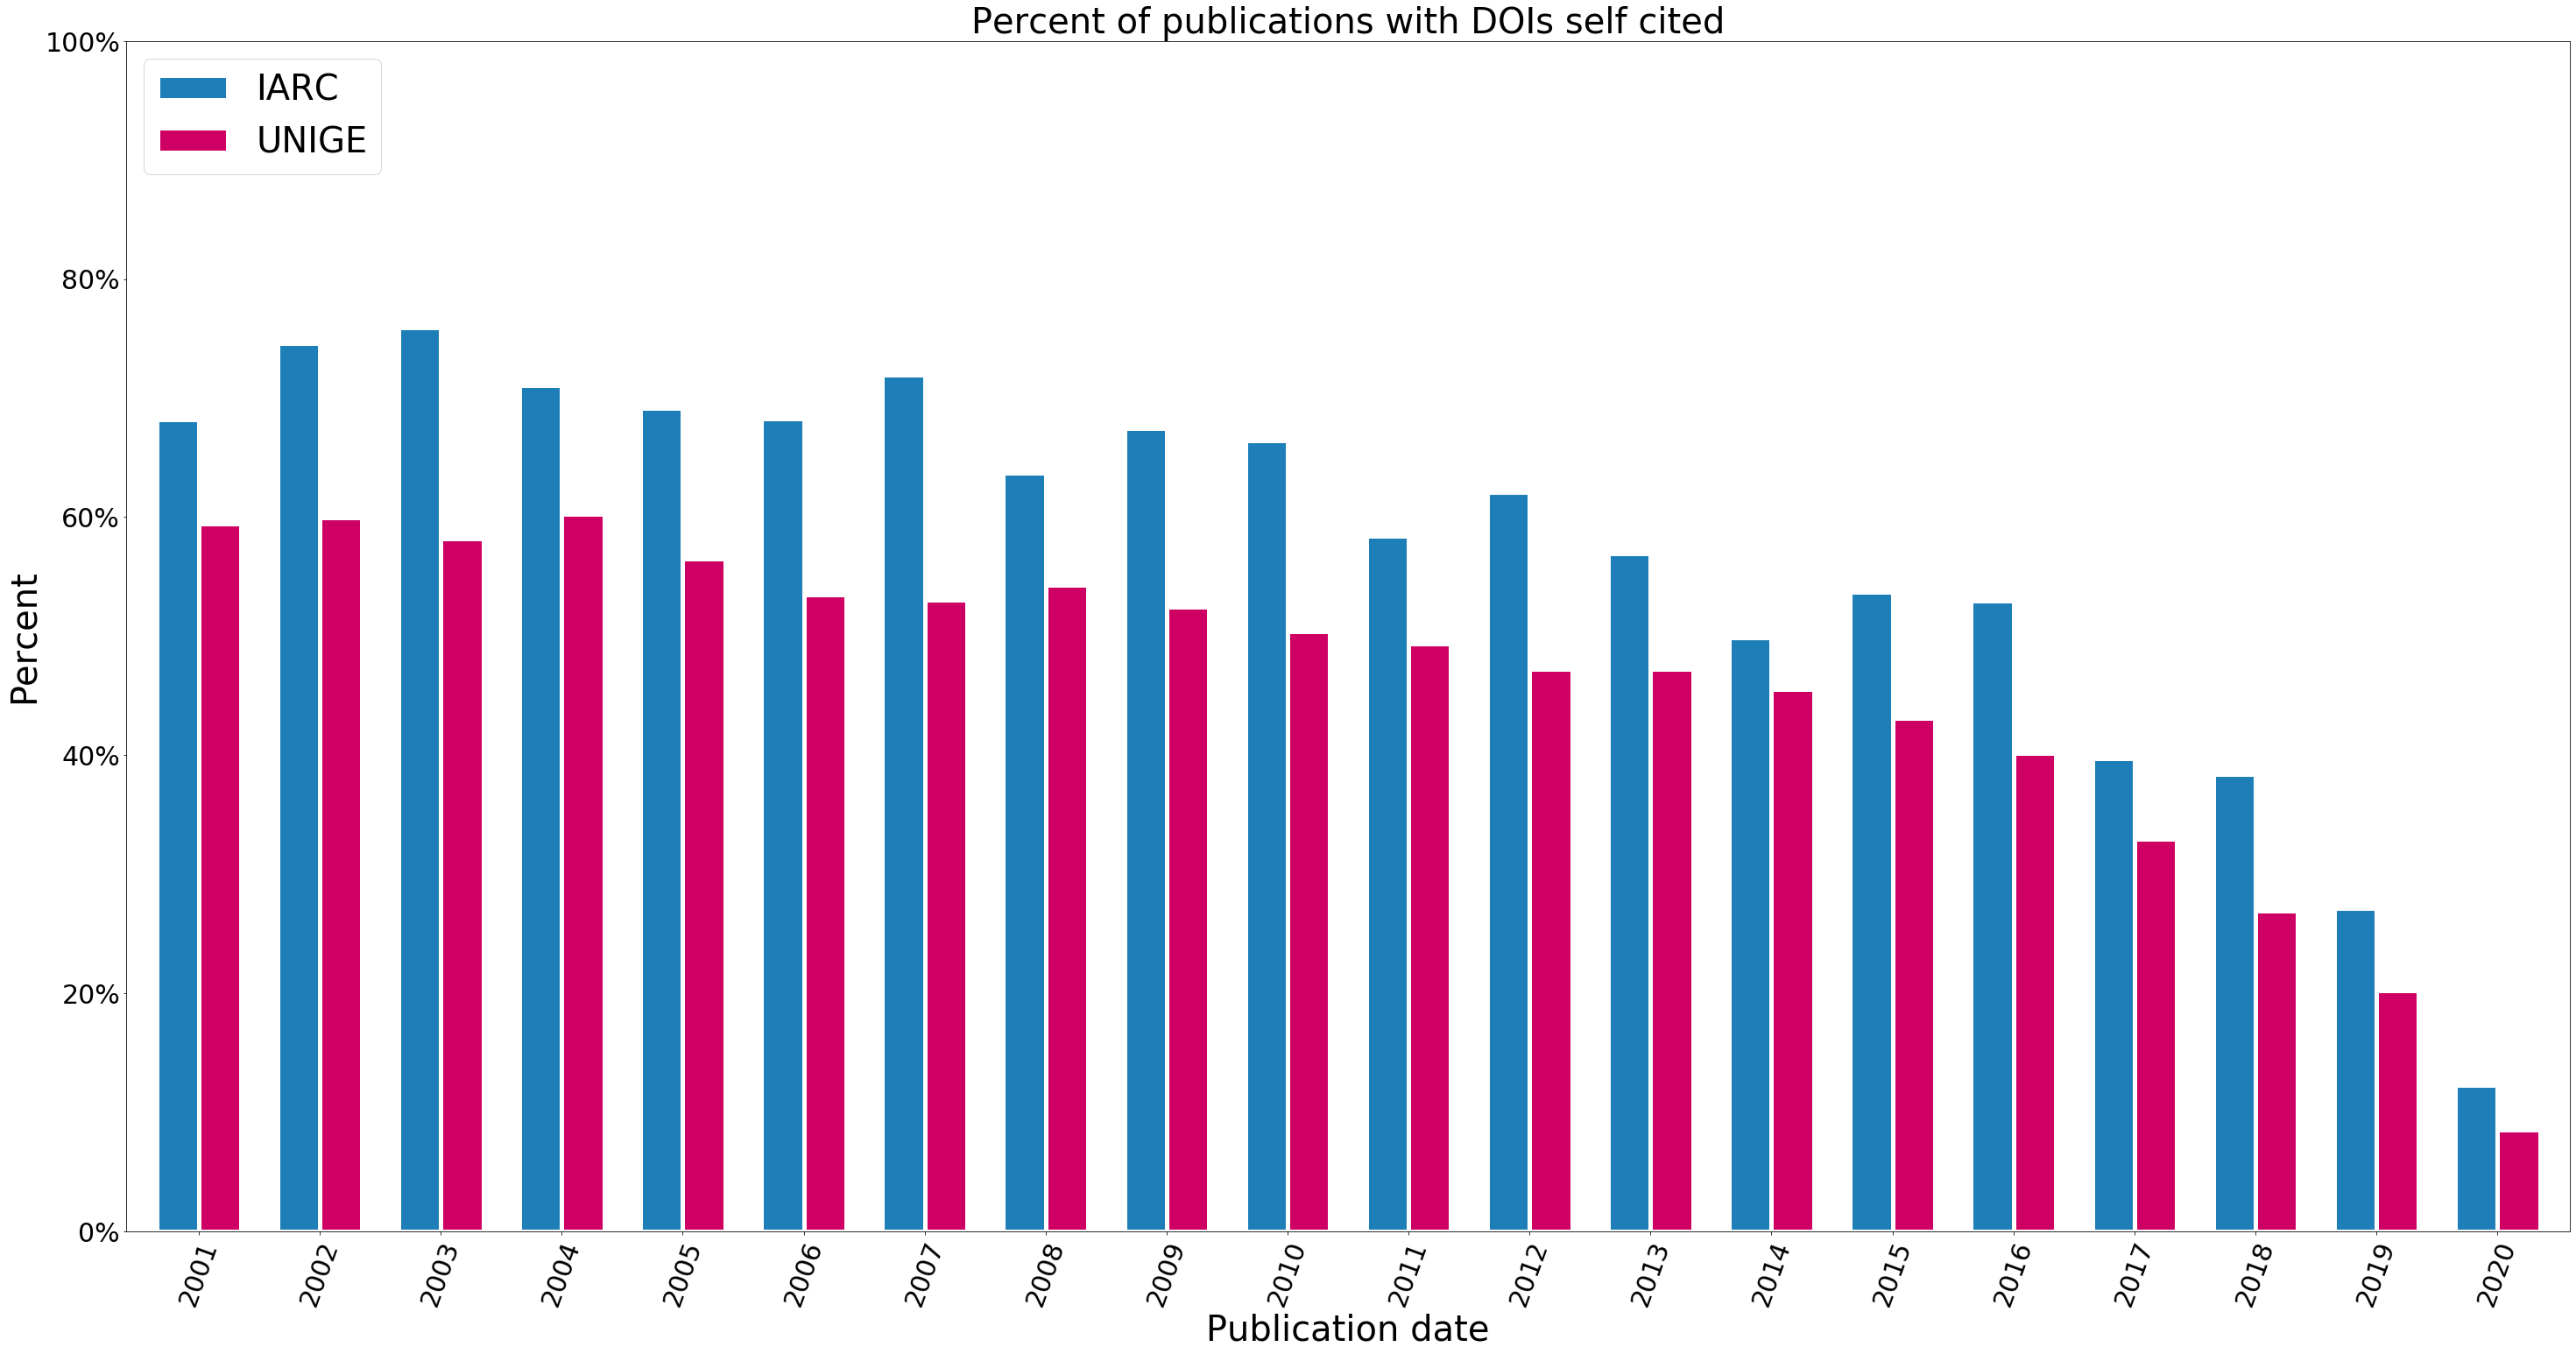

In [55]:
# year counts for publications
myfileoutfig = 'figures/26_iarc_unige_publications_with_doi_self_cited_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = publications_self_citations_with_dois_by_year.plot.bar(color=[IARC_color, UNIGE_color], rot=70, width=0.7, edgecolor='white', linewidth=5,xlim=[2000,2020], ylim=[0,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.set_title('Percent of publications with DOIs self cited', fontsize=40)
ax = ax.legend(loc=2, prop={'size': 40})
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

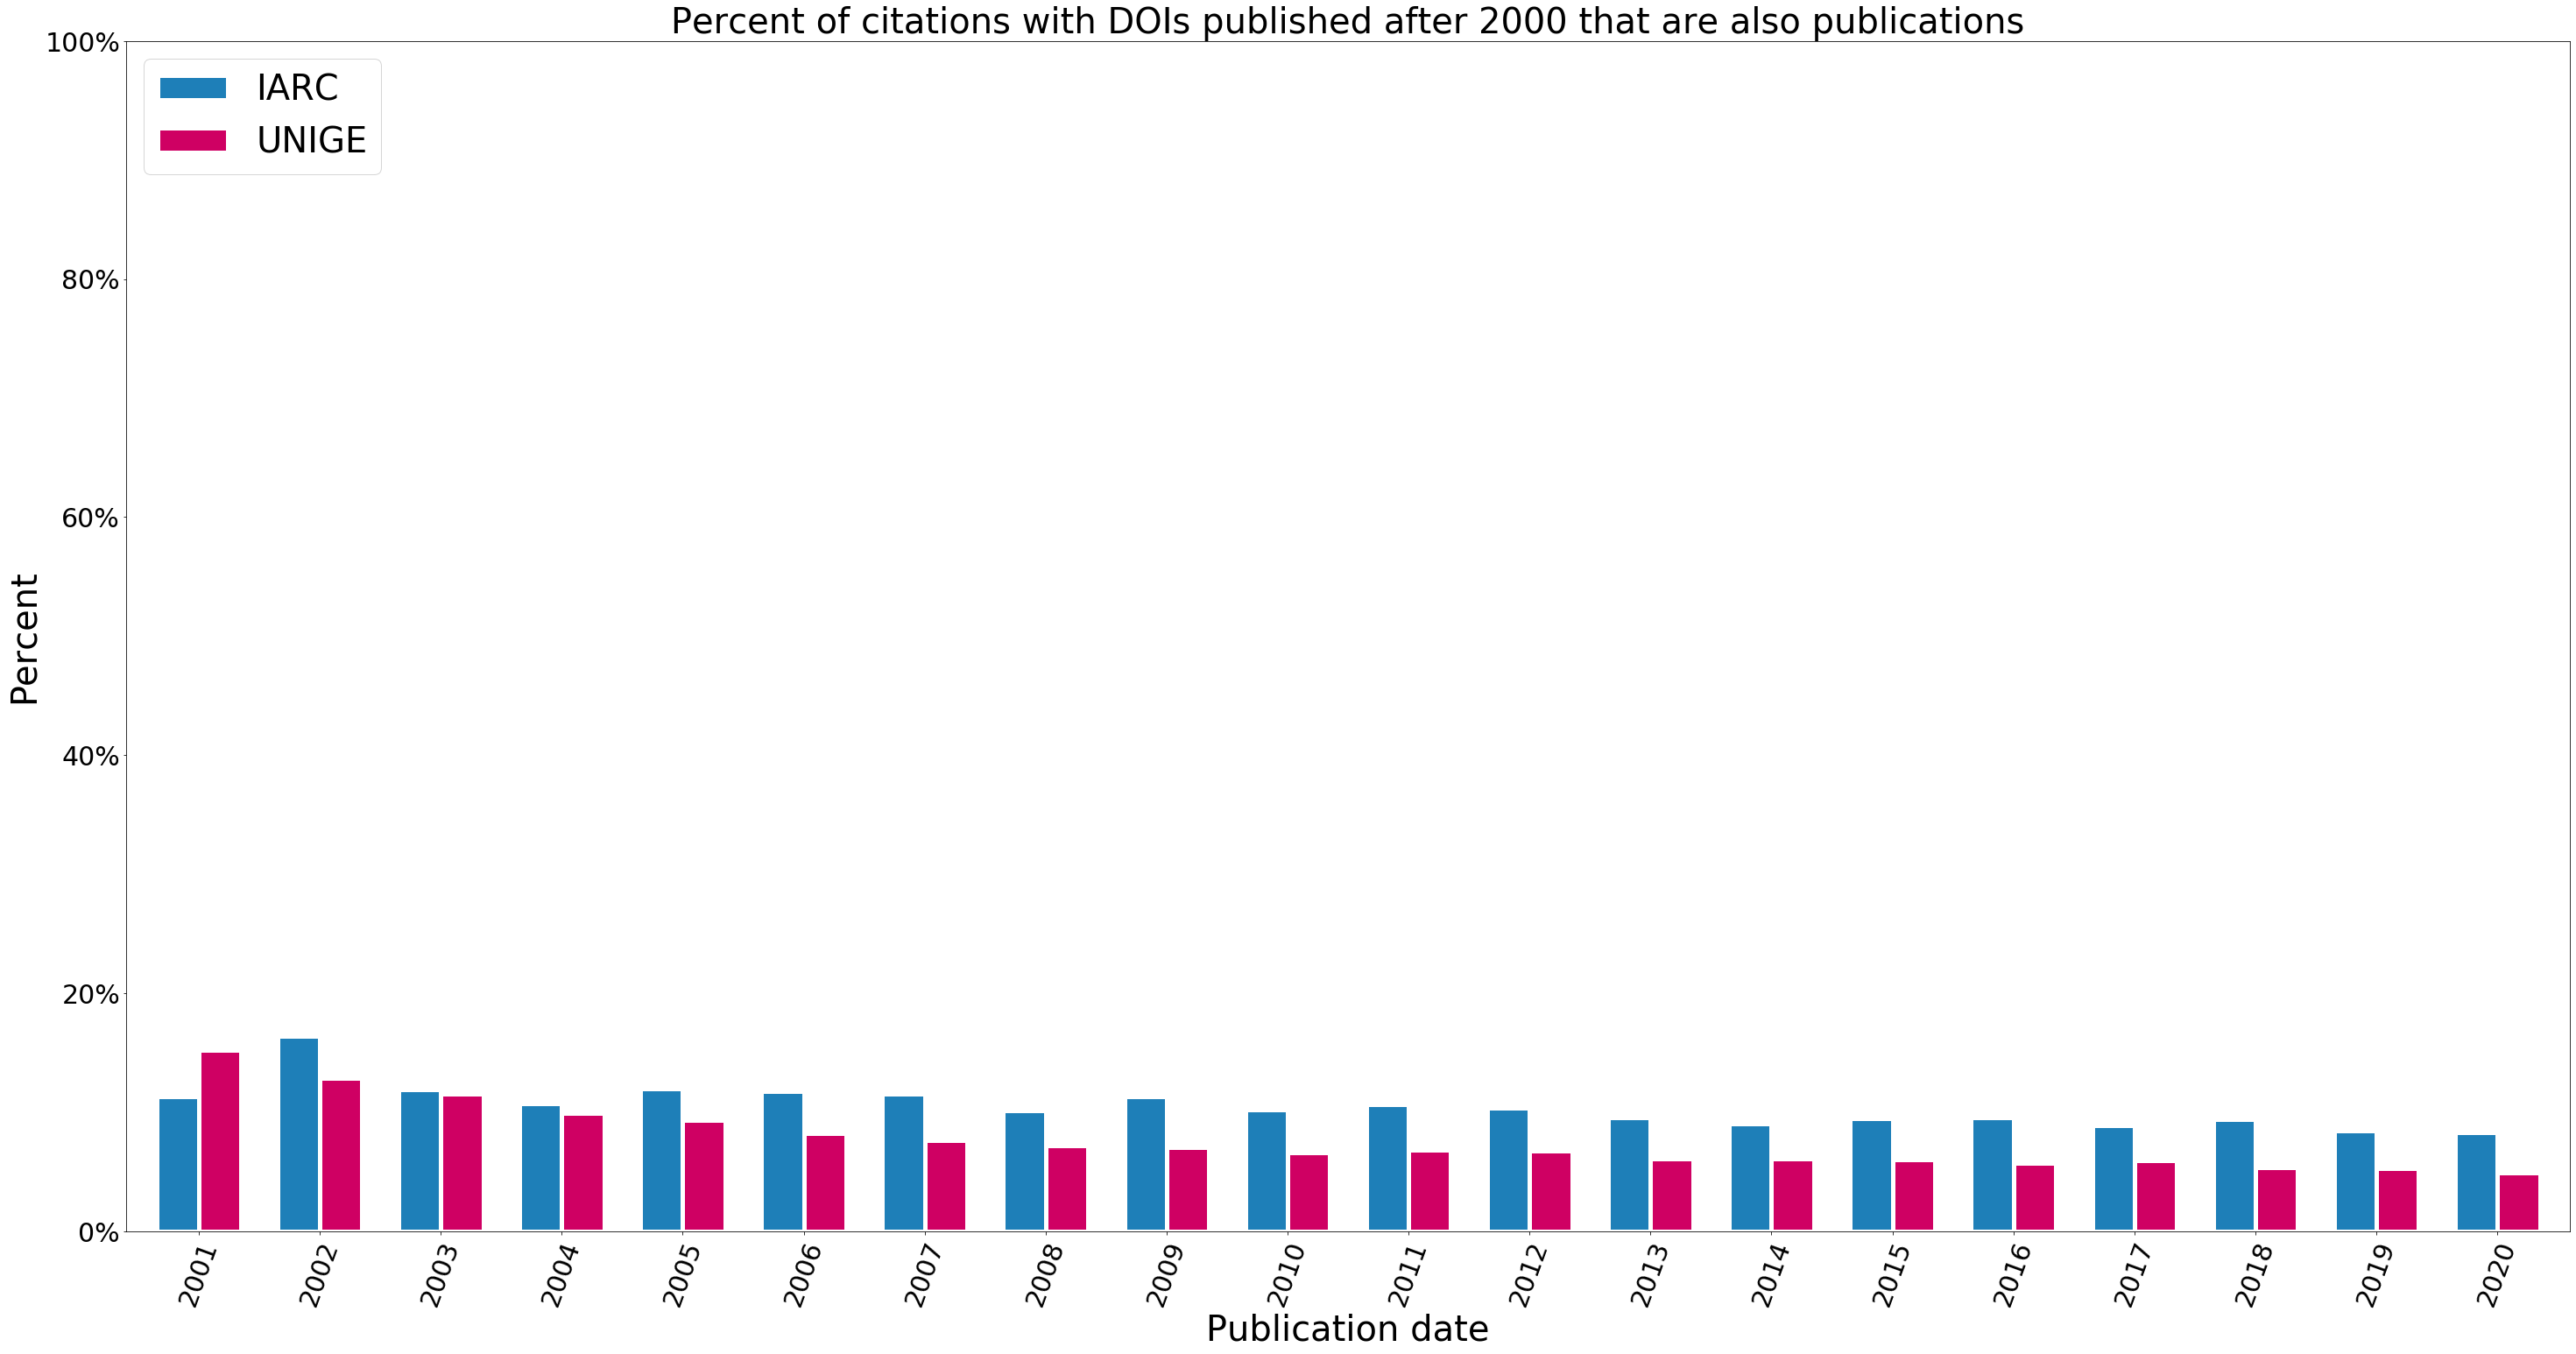

In [56]:
# year counts for citations
myfileoutfig = 'figures/26_iarc_unige_citations_with_doi_and_unige_publication_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = self_citations_with_dois_by_year.plot.bar(color=[IARC_color, UNIGE_color], rot=70, width=0.7, edgecolor='white', linewidth=5, xlim=[2000,2020], ylim=[0,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.set_title('Percent of citations with DOIs published after 2000 that are also publications', fontsize=40)
ax = ax.legend(loc=2, prop={'size': 40})
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

## 27. Within the cited articles, what proportion are OA?

In [57]:
unige_all.columns

Index(['publication_wos_id', 'publication_year', 'publication_type',
       'publication_journal', 'publication_doi', 'publication_pmid',
       'publication_wos_oa', 'citation_year', 'citation_journal',
       'citation_doi', 'publication_doi_is_unige_publication',
       'publication_doi_is_unige_citation',
       'publication_doi_is_iarc_publication',
       'publication_doi_is_iarc_citation', 'publication_doi_oa_status',
       'publication_doi_has_repository_copy',
       'citation_doi_is_unige_publication', 'citation_doi_is_unige_citation',
       'citation_doi_is_iarc_publication', 'citation_doi_is_iarc_citation',
       'citation_doi_oa_status', 'citation_doi_has_repository_copy'],
      dtype='object')

In [58]:
# OA of publications
oas = ['gold', 'hybrid', 'bronze', 'green']
unige_publications_oa = unige_all.loc[unige_all['publication_doi_oa_status'].isin(oas)]
unige_publications_not_oa = unige_all.loc[unige_all['publication_doi_oa_status'] == 'closed']
unige_publications_oa_unknown = unige_all.loc[unige_all['publication_doi_oa_status'].isna() & unige_all['publication_doi'].notna()]
unige_publications_without_doi_and_citation_with_oa_status  = unige_all.loc[unige_all['publication_doi'].isna() & unige_all['citation_doi_oa_status'].notna()]
unige_publications_oa

,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
83,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",1999.0,J DENT RES,10.1177/00220345990780020301,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
84,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2008.0,COMMUNITY DENT ORAL,10.1111/j.1600-0528.2006.00364.x,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
85,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2002.0,INT J PROSTHODONT,NaN,...,NaN,NaN,bronze,True,NaN,NaN,NaN,NaN,NaN,NaN
86,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2000.0,CLIN ORAL IMPLAN RES,10.1034/j.1600-0501.2000.011005401.x,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
87,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2009.0,OSSEOINTEGRATION DEN,NaN,...,NaN,NaN,bronze,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260976,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,Q A COR COVID 19,NaN,...,NaN,NaN,bronze,True,NaN,NaN,NaN,NaN,NaN,NaN
1260977,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,INT FORUM ALLERGY RH,10.1002/alr.22577,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
1260978,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,INT FORUM ALLERGY RH,10.1002/alr.22592,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,bronze,True
1260979,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2021.0,IEEE T PATTERN ANAL,10.1109/TPAMI.2020.2975798,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,green,True


In [59]:
# OA of publications
oas = ['gold', 'hybrid', 'bronze', 'green']
iarc_publications_oa = iarc_all.loc[iarc_all['publication_doi_oa_status'].isin(oas)]
iarc_publications_not_oa = iarc_all.loc[iarc_all['publication_doi_oa_status'] == 'closed']
iarc_publications_oa_unknown = iarc_all.loc[iarc_all['publication_doi_oa_status'].isna() & iarc_all['publication_doi'].notna()]
iarc_publications_without_doi_and_citation_with_oa_status  = iarc_all.loc[iarc_all['publication_doi'].isna() & iarc_all['citation_doi_oa_status'].notna()]
iarc_publications_oa

,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
1,WOS:000438342200039,2018,Letter,INT J EPIDEMIOL,10.1093/ije/dyy122,NaN,Bronze,2018.0,INT J EPIDEMIOL,10.1093/ije/dyy063,...,1.0,NaN,bronze,False,NaN,NaN,NaN,1.0,bronze,False
49,WOS:000374280600004,2016,Article,BMC BIOINFORMATICS,10.1186/s12859-016-1011-z,27091472.0,"gold, Green Published",2014.0,CURR OPIN GENET DEV,10.1016/j.gde.2013.11.014,...,1.0,NaN,gold,True,NaN,NaN,NaN,1.0,hybrid,True
50,WOS:000374280600004,2016,Article,BMC BIOINFORMATICS,10.1186/s12859-016-1011-z,27091472.0,"gold, Green Published",2013.0,NATURE,10.1038/nature12477,...,1.0,NaN,gold,True,NaN,1.0,NaN,1.0,bronze,True
51,WOS:000374280600004,2016,Article,BMC BIOINFORMATICS,10.1186/s12859-016-1011-z,27091472.0,"gold, Green Published",2013.0,CELL REP,10.1016/j.celrep.2012.12.008,...,1.0,NaN,gold,True,NaN,1.0,NaN,1.0,gold,True
52,WOS:000374280600004,2016,Article,BMC BIOINFORMATICS,10.1186/s12859-016-1011-z,27091472.0,"gold, Green Published",2010.0,Curr Protoc Mol Biol,NaN,...,1.0,NaN,gold,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275617,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2018.0,ATL SUST DEV GOALS 2,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN
275618,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2011.0,BURD BEST BUYS RED E,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN
275619,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2006.0,WORK TOG HLTH WORLD,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN
275620,WOS:000449710900010,2018,Article,LANCET,10.1016/S0140-6736(18)32281-5,30496107.0,"Green Published, Green Accepted, hybrid, Green...",2018.0,WORLD HLTH STAT 2018,NaN,...,1.0,NaN,hybrid,True,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
unige_publications_oa.drop_duplicates(subset='publication_wos_id').publication_doi_oa_status.value_counts()

bronze    5800
green     4476
gold      3568
hybrid    1949
Name: publication_doi_oa_status, dtype: int64

In [61]:
unige_publications_not_oa.drop_duplicates(subset='publication_wos_id').publication_doi_oa_status.value_counts()

closed    13462
Name: publication_doi_oa_status, dtype: int64

In [62]:
iarc_publications_oa.drop_duplicates(subset='publication_wos_id').publication_doi_oa_status.value_counts()

bronze    1779
gold       864
green      860
hybrid     644
Name: publication_doi_oa_status, dtype: int64

In [63]:
iarc_publications_not_oa.drop_duplicates(subset='publication_wos_id').publication_doi_oa_status.value_counts()

closed    2314
Name: publication_doi_oa_status, dtype: int64

In [64]:
# UNIGE publications OA
unige_publications_oa_n = unige_publications_oa.drop_duplicates(subset='publication_wos_id').shape[0]
unige_publications_oa_p = unige_publications_oa_n / unige_publications_dois_n
print ('UNIGE publications with DOIs : ' + str(unige_publications_dois_n))
print ('UNIGE publications with DOIs that are OA : ' + str(unige_publications_oa_n))
print ('UNIGE publications with DOIs that are OA  % : ' + str(unige_publications_oa_p))
unige_publications_not_oa_n = unige_publications_not_oa.drop_duplicates(subset='publication_wos_id').shape[0]
unige_publications_not_oa_p = unige_publications_not_oa_n / unige_publications_dois_n
print ('UNIGE publications with DOIs that are not OA : ' + str(unige_publications_not_oa_n))
print ('UNIGE publications with DOIs that are not OA  % : ' + str(unige_publications_not_oa_p))
unige_publications_oa_unknown_n = unige_publications_oa_unknown.drop_duplicates(subset='publication_wos_id').shape[0]
unige_publications_oa_unknown_p = unige_publications_oa_unknown_n / unige_publications_dois_n
print ('UNIGE publications with DOIs but OA unknown : ' + str(unige_publications_oa_unknown_n))
print ('UNIGE publications with DOIs but OA unknown % : ' + str(unige_publications_oa_unknown_p))

UNIGE publications with DOIs : 29376
UNIGE publications with DOIs that are OA : 15793
UNIGE publications with DOIs that are OA  % : 0.5376157407407407
UNIGE publications with DOIs that are not OA : 13462
UNIGE publications with DOIs that are not OA  % : 0.45826525054466233
UNIGE publications with DOIs but OA unknown : 121
UNIGE publications with DOIs but OA unknown % : 0.00411900871459695


In [65]:
unige_publications_oa_n + unige_publications_not_oa_n + unige_publications_oa_unknown_n

29376

In [66]:
# IARC publications OA
iarc_publications_oa_n = iarc_publications_oa.drop_duplicates(subset='publication_wos_id').shape[0]
iarc_publications_oa_p = iarc_publications_oa_n / iarc_publications_dois_n
print ('IARC publications with DOIs : ' + str(iarc_publications_dois_n))
print ('IARC publications with DOIs that are OA : ' + str(iarc_publications_oa_n))
print ('IARC publications with DOIs that are OA  % : ' + str(iarc_publications_oa_p))
iarc_publications_not_oa_n = iarc_publications_not_oa.drop_duplicates(subset='publication_wos_id').shape[0]
iarc_publications_not_oa_p = iarc_publications_not_oa_n / iarc_publications_dois_n
print ('IARC publications with DOIs that are not OA : ' + str(iarc_publications_not_oa_n))
print ('IARC publications with DOIs that are not OA  % : ' + str(iarc_publications_not_oa_p))
iarc_publications_oa_unknown_n = iarc_publications_oa_unknown.drop_duplicates(subset='publication_wos_id').shape[0]
iarc_publications_oa_unknown_p = iarc_publications_oa_unknown_n / iarc_publications_dois_n
print ('IARC publications with DOIs but OA unknown : ' + str(iarc_publications_oa_unknown_n))
print ('IARC publications with DOIs but OA unknown % : ' + str(iarc_publications_oa_unknown_p))

IARC publications with DOIs : 6483
IARC publications with DOIs that are OA : 4147
IARC publications with DOIs that are OA  % : 0.639672990899275
IARC publications with DOIs that are not OA : 2314
IARC publications with DOIs that are not OA  % : 0.35693351843282434
IARC publications with DOIs but OA unknown : 22
IARC publications with DOIs but OA unknown % : 0.0033934906679006635


In [67]:
iarc_publications_oa_n + iarc_publications_not_oa_n + iarc_publications_oa_unknown_n

6483

In [68]:
# write  results on file
with open('27_oa_publications.txt', 'a') as f:
    f.write('27. Within the publications, what proportion are OA?\n')
    f.write('----------------------------------------\n\n')
    f.write('  \n')
    f.write('UNIGE publications with DOIs : ' + str(unige_publications_dois_n) + '\n')
    f.write('UNIGE publications with DOIs that are OA : ' + str(unige_publications_oa_n) + '\n')
    f.write('UNIGE publications with DOIs that are OA  % : ' + str(unige_publications_oa_p) + '\n')
    f.write('UNIGE publications with DOIs that are not OA : ' + str(unige_publications_not_oa_n) + '\n')
    f.write('UNIGE publications with DOIs that are not OA  % : ' + str(unige_publications_not_oa_p) + '\n')
    f.write('UNIGE publications with DOIs but OA unknown : ' + str(unige_publications_oa_unknown_n) + '\n')
    f.write('UNIGE publications with DOIs but OA unknown % : ' + str(unige_publications_oa_unknown_p) + '\n')
    f.write('  \n')
    f.write('IARC publications with DOIs : ' + str(iarc_publications_dois_n) + '\n')
    f.write('IARC publications with DOIs that are OA : ' + str(iarc_publications_oa_n) + '\n')
    f.write('IARC publications with DOIs that are OA  % : ' + str(iarc_publications_oa_p) + '\n')
    f.write('IARC publications with DOIs that are not OA : ' + str(iarc_publications_not_oa_n) + '\n')
    f.write('IARC publications with DOIs that are not OA  % : ' + str(iarc_publications_not_oa_p) + '\n')
    f.write('IARC publications with DOIs but OA unknown : ' + str(iarc_publications_oa_unknown_n) + '\n')
    f.write('IARC publications with DOIs but OA unknown % : ' + str(iarc_publications_oa_unknown_p) + '\n')

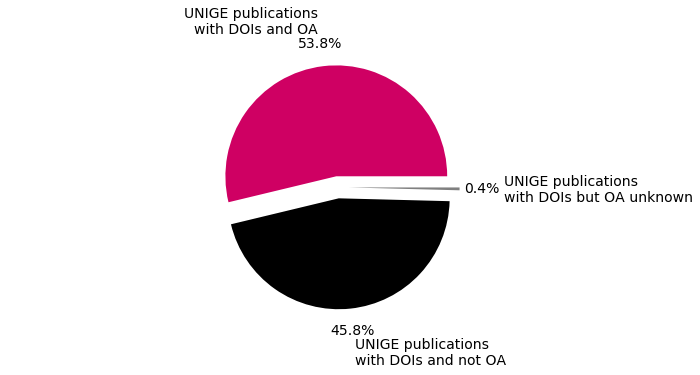

In [69]:
# UNIGE publications OA
%matplotlib inline
myfileoutfig = 'figures/27_unige_publications_oa_pie_chart.png'
labels = 'UNIGE publications\nwith DOIs and OA', 'UNIGE publications\nwith DOIs and not OA', 'UNIGE publications\nwith DOIs but OA unknown'
sizes = [unige_publications_oa_n,
         unige_publications_not_oa_n,
         unige_publications_oa_unknown_n]
explode = (0.1, 0.1, 0.1)
colors = [UNIGE_color, 'black', 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.4,
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

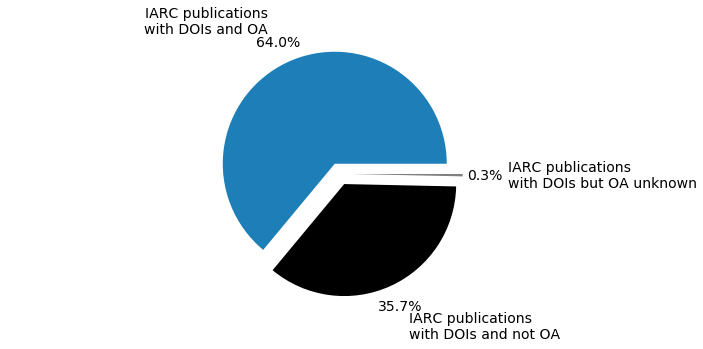

In [70]:
# IARC publications OA
%matplotlib inline
myfileoutfig = 'figures/27_iarc_publications_oa_pie_chart.png'
labels = 'IARC publications\nwith DOIs and OA', 'IARC publications\nwith DOIs and not OA', 'IARC publications\nwith DOIs but OA unknown'
sizes = [iarc_publications_oa_n,
         iarc_publications_not_oa_n,
         iarc_publications_oa_unknown_n]
explode = (0.1, 0.1, 0.1)
colors = [IARC_color, 'black', 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.4,
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

In [71]:
# citations
unige_citations_oa = unige_all.loc[unige_all['citation_doi_oa_status'].isin(oas)]
unige_citations_not_oa = unige_all.loc[unige_all['citation_doi_oa_status'] == 'closed']
unige_citations_oa_unknown = unige_all.loc[unige_all['citation_doi_oa_status'].isna() & unige_all['citation_doi'].notna()]
iarc_citations_oa = iarc_all.loc[iarc_all['citation_doi_oa_status'].isin(oas)]
iarc_citations_not_oa = iarc_all.loc[iarc_all['citation_doi_oa_status'] == 'closed']
iarc_citations_oa_unknown = iarc_all.loc[iarc_all['citation_doi_oa_status'].isna() & iarc_all['citation_doi'].notna()]

In [72]:
unige_citations_oa['citation_doi_oa_status'].value_counts()

bronze    237791
green     141356
hybrid     49134
gold       27380
Name: citation_doi_oa_status, dtype: int64

In [73]:
unige_citations_not_oa['citation_doi_oa_status'].value_counts()

closed    531709
Name: citation_doi_oa_status, dtype: int64

In [74]:
iarc_citations_oa['citation_doi_oa_status'].value_counts()

bronze    55756
green     27821
hybrid    12616
gold       7776
Name: citation_doi_oa_status, dtype: int64

In [75]:
iarc_citations_not_oa['citation_doi_oa_status'].value_counts()

closed    91420
Name: citation_doi_oa_status, dtype: int64

In [76]:
# UNIGE citations OA
unige_citations_oa_n = unige_citations_oa.shape[0]
unige_citations_oa_p = unige_citations_oa_n / unige_citations_dois_n
print ('UNIGE citations with DOIs : ' + str(unige_citations_dois_n))
print ('UNIGE citations with DOIs that are OA : ' + str(unige_citations_oa_n))
print ('UNIGE citations with DOIs that are OA  % : ' + str(unige_citations_oa_p))
unige_citations_not_oa_n = unige_citations_not_oa.shape[0]
unige_citations_not_oa_p = unige_citations_not_oa_n / unige_citations_dois_n
print ('UNIGE citations with DOIs that are not OA : ' + str(unige_citations_not_oa_n))
print ('UNIGE citations with DOIs that are not OA  % : ' + str(unige_citations_not_oa_p))
unige_citations_oa_unknown_n = unige_citations_oa_unknown.shape[0]
unige_citations_oa_unknown_p = unige_citations_oa_unknown_n / unige_citations_dois_n
print ('UNIGE citations with DOIs but OA unknown : ' + str(unige_citations_oa_unknown_n))
print ('UNIGE citations with DOIs but OA unknown % : ' + str(unige_citations_oa_unknown_p))

UNIGE citations with DOIs : 999588
UNIGE citations with DOIs that are OA : 455661
UNIGE citations with DOIs that are OA  % : 0.45584880970960034
UNIGE citations with DOIs that are not OA : 531709
UNIGE citations with DOIs that are not OA  % : 0.5319281543996126
UNIGE citations with DOIs but OA unknown : 12218
UNIGE citations with DOIs but OA unknown % : 0.012223035890787005


In [77]:
# IARC citations OA
iarc_citations_oa_n = iarc_citations_oa.shape[0]
iarc_citations_oa_p = iarc_citations_oa_n / iarc_citations_dois_n
print ('IARC citations with DOIs : ' + str(iarc_citations_dois_n))
print ('IARC citations with DOIs that are OA : ' + str(iarc_citations_oa_n))
print ('IARC citations with DOIs that are OA  % : ' + str(iarc_citations_oa_p))
iarc_citations_not_oa_n = iarc_citations_not_oa.shape[0]
iarc_citations_not_oa_p = iarc_citations_not_oa_n / iarc_citations_dois_n
print ('IARC citations with DOIs that are not OA : ' + str(iarc_citations_not_oa_n))
print ('IARC citations with DOIs that are not OA  % : ' + str(iarc_citations_not_oa_p))
iarc_citations_oa_unknown_n = iarc_citations_oa_unknown.shape[0]
iarc_citations_oa_unknown_p = iarc_citations_oa_unknown_n / iarc_citations_dois_n
print ('IARC citations with DOIs but OA unknown : ' + str(iarc_citations_oa_unknown_n))
print ('IARC citations with DOIs but OA unknown % : ' + str(iarc_citations_oa_unknown_p))

IARC citations with DOIs : 201591
IARC citations with DOIs that are OA : 103969
IARC citations with DOIs that are OA  % : 0.5157422702402389
IARC citations with DOIs that are not OA : 91420
IARC citations with DOIs that are not OA  % : 0.4534924674216607
IARC citations with DOIs but OA unknown : 6202
IARC citations with DOIs but OA unknown % : 0.03076526233810041


In [78]:
# write  results on file
with open('27_oa_citations.txt', 'a') as f:
    f.write('27. Within the cited articles, what proportion are OA?\n')
    f.write('----------------------------------------\n\n')
    f.write('  \n')
    f.write('UNIGE citations with DOIs : ' + str(unige_citations_dois_n) + '\n')
    f.write('UNIGE citations with DOIs that are OA : ' + str(unige_citations_oa_n) + '\n')
    f.write('UNIGE citations with DOIs that are OA  % : ' + str(unige_citations_oa_p) + '\n')
    f.write('UNIGE citations with DOIs that are not OA : ' + str(unige_citations_not_oa_n) + '\n')
    f.write('UNIGE citations with DOIs that are not OA  % : ' + str(unige_citations_not_oa_p) + '\n')
    f.write('UNIGE citations with DOIs but OA unknown : ' + str(unige_citations_oa_unknown_n) + '\n')
    f.write('UNIGE citations with DOIs but OA unknown % : ' + str(unige_citations_oa_unknown_p) + '\n')
    f.write('  \n')
    f.write('IARC citations with DOIs : ' + str(iarc_citations_dois_n) + '\n')
    f.write('IARC citations with DOIs that are OA : ' + str(iarc_citations_oa_n) + '\n')
    f.write('IARC citations with DOIs that are OA  % : ' + str(iarc_citations_oa_p) + '\n')
    f.write('IARC citations with DOIs that are not OA : ' + str(iarc_citations_not_oa_n) + '\n')
    f.write('IARC citations with DOIs that are not OA  % : ' + str(iarc_citations_not_oa_p) + '\n')
    f.write('IARC citations with DOIs but OA unknown : ' + str(iarc_citations_oa_unknown_n) + '\n')
    f.write('IARC citations with DOIs but OA unknown % : ' + str(iarc_citations_oa_unknown_p) + '\n')

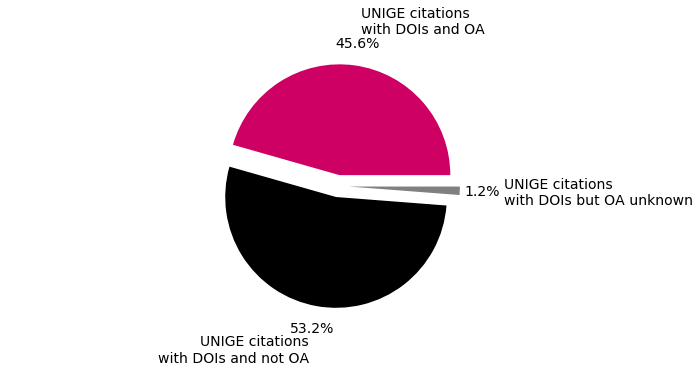

In [79]:
# UNIGE citations OA
%matplotlib inline
myfileoutfig = 'figures/27_unige_citations_oa_pie_chart.png'
labels = 'UNIGE citations\nwith DOIs and OA', 'UNIGE citations\nwith DOIs and not OA', 'UNIGE citations\nwith DOIs but OA unknown'
sizes = [unige_citations_oa_n,
         unige_citations_not_oa_n,
         unige_citations_oa_unknown_n]
explode = (0.1, 0.1, 0.1)
colors = [UNIGE_color, 'black', 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.4,
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

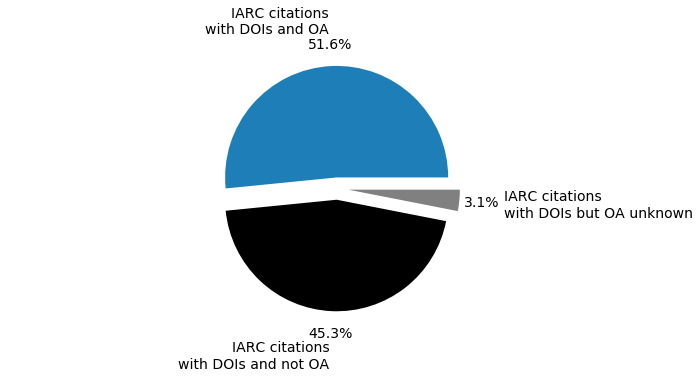

In [80]:
# IARC citations OA
%matplotlib inline
myfileoutfig = 'figures/27_iarc_citations_oa_pie_chart.png'
labels = 'IARC citations\nwith DOIs and OA', 'IARC citations\nwith DOIs and not OA', 'IARC citations\nwith DOIs but OA unknown'
sizes = [iarc_citations_oa_n,
         iarc_citations_not_oa_n,
         iarc_citations_oa_unknown_n]
explode = (0.1, 0.1, 0.1)
colors = [IARC_color, 'black', 'gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.4,
        shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

In [202]:
# IARC publications OA Roads
row_iarc_publications_oa_unknown = {'OA Color' : 'unknown', 'counts' : iarc_publications_oa_unknown_n}
row_iarc_publications_not_oa = {'OA Color' : 'closed', 'counts' : iarc_publications_not_oa_n}
iarc_publications_oa_roads = iarc_publications_oa.drop_duplicates(subset='publication_wos_id')['publication_doi_oa_status'].value_counts().rename_axis('OA Color').to_frame('counts')
iarc_publications_oa_roads = iarc_publications_oa_roads.reset_index()
iarc_publications_oa_roads = iarc_publications_oa_roads.append(row_iarc_publications_oa_unknown, ignore_index=True)
iarc_publications_oa_roads = iarc_publications_oa_roads.append(row_iarc_publications_not_oa, ignore_index=True)
iarc_publications_oa_roads.loc[iarc_publications_oa_roads['OA Color'] == 'gold', 'position'] = 1
iarc_publications_oa_roads.loc[iarc_publications_oa_roads['OA Color'] == 'hybrid', 'position'] = 2
iarc_publications_oa_roads.loc[iarc_publications_oa_roads['OA Color'] == 'bronze', 'position'] = 3
iarc_publications_oa_roads.loc[iarc_publications_oa_roads['OA Color'] == 'green', 'position'] = 4
iarc_publications_oa_roads.loc[iarc_publications_oa_roads['OA Color'] == 'closed', 'position'] = 5
iarc_publications_oa_roads.loc[iarc_publications_oa_roads['OA Color'] == 'unknown', 'position'] = 6
iarc_publications_oa_roads = iarc_publications_oa_roads.sort_values(by='position')
iarc_publications_oa_roads = iarc_publications_oa_roads.reset_index(drop=True)
iarc_publications_oa_roads = iarc_publications_oa_roads.set_index('OA Color')
iarc_publications_oa_roads

,counts,position
OA Color,,
gold,864,1.0
hybrid,644,2.0
bronze,1779,3.0
green,860,4.0
closed,2314,5.0
unknown,22,6.0


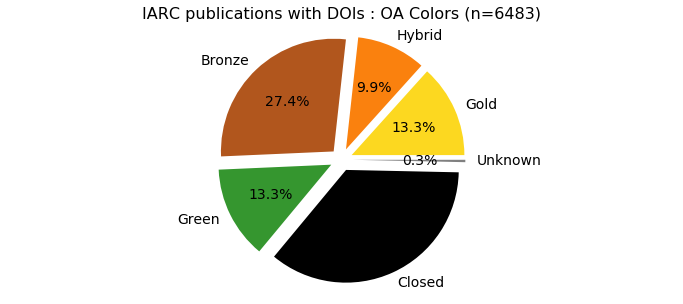

In [203]:
# IARC publications OA Roads
%matplotlib inline
myfileoutfig = 'figures/27_iarc_publications_oa_roads.png'
labels = 'Gold', 'Hybrid', 'Bronze', 'Green', 'Closed', 'Unknown'
colors = ['#FCD820', '#FA810E', '#B1561D', '#35962F', 'black', 'gray']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(iarc_publications_oa_roads['counts'], explode=explode, autopct='%1.1f%%', labels=labels, shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('IARC publications with DOIs : OA Colors (n=' + str(iarc_publications_dois_n) + ')', fontsize=16)
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

In [204]:
# UNIGE publications OA Roads
row_unige_publications_oa_unknown = {'OA Color' : 'unknown', 'counts' : unige_publications_oa_unknown_n}
row_unige_publications_not_oa = {'OA Color' : 'closed', 'counts' : unige_publications_not_oa_n}
unige_publications_oa_roads = unige_publications_oa.drop_duplicates(subset='publication_wos_id')['publication_doi_oa_status'].value_counts().rename_axis('OA Color').to_frame('counts')
unige_publications_oa_roads = unige_publications_oa_roads.reset_index()
unige_publications_oa_roads = unige_publications_oa_roads.append(row_unige_publications_oa_unknown, ignore_index=True)
unige_publications_oa_roads = unige_publications_oa_roads.append(row_unige_publications_not_oa, ignore_index=True)
unige_publications_oa_roads.loc[unige_publications_oa_roads['OA Color'] == 'gold', 'position'] = 1
unige_publications_oa_roads.loc[unige_publications_oa_roads['OA Color'] == 'hybrid', 'position'] = 2
unige_publications_oa_roads.loc[unige_publications_oa_roads['OA Color'] == 'bronze', 'position'] = 3
unige_publications_oa_roads.loc[unige_publications_oa_roads['OA Color'] == 'green', 'position'] = 4
unige_publications_oa_roads.loc[unige_publications_oa_roads['OA Color'] == 'closed', 'position'] = 5
unige_publications_oa_roads.loc[unige_publications_oa_roads['OA Color'] == 'unknown', 'position'] = 6
unige_publications_oa_roads = unige_publications_oa_roads.sort_values(by='position')
unige_publications_oa_roads = unige_publications_oa_roads.reset_index(drop=True)
unige_publications_oa_roads = unige_publications_oa_roads.set_index('OA Color')
unige_publications_oa_roads

,counts,position
OA Color,,
gold,3568,1.0
hybrid,1949,2.0
bronze,5800,3.0
green,4476,4.0
closed,13462,5.0
unknown,121,6.0


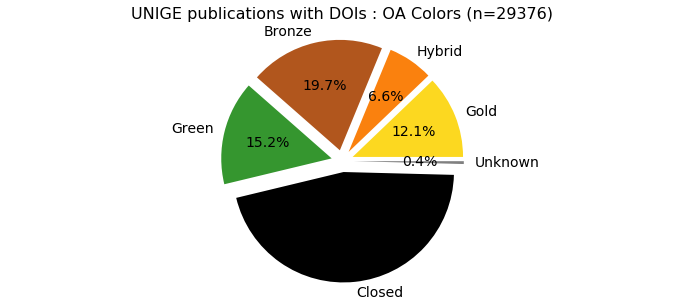

In [205]:
# UNIGE publications OA Roads
%matplotlib inline
myfileoutfig = 'figures/27_unige_publications_oa_roads.png'
labels = 'Gold', 'Hybrid', 'Bronze', 'Green', 'Closed', 'Unknown'
colors = ['#FCD820', '#FA810E', '#B1561D', '#35962F', 'black', 'gray']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(unige_publications_oa_roads['counts'], explode=explode, autopct='%1.1f%%', labels=labels, shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('UNIGE publications with DOIs : OA Colors (n=' + str(unige_publications_dois_n) + ')', fontsize=16)
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

In [206]:
# IARC citations OA Roads
row_iarc_citations_oa_unknown = {'OA Color' : 'unknown', 'counts' : iarc_citations_oa_unknown_n}
row_iarc_citations_not_oa = {'OA Color' : 'closed', 'counts' : iarc_citations_not_oa_n}
iarc_citations_oa_roads = iarc_citations_oa['citation_doi_oa_status'].value_counts().rename_axis('OA Color').to_frame('counts')
iarc_citations_oa_roads = iarc_citations_oa_roads.reset_index()
iarc_citations_oa_roads = iarc_citations_oa_roads.append(row_iarc_citations_oa_unknown, ignore_index=True)
iarc_citations_oa_roads = iarc_citations_oa_roads.append(row_iarc_citations_not_oa, ignore_index=True)
iarc_citations_oa_roads.loc[iarc_citations_oa_roads['OA Color'] == 'gold', 'position'] = 1
iarc_citations_oa_roads.loc[iarc_citations_oa_roads['OA Color'] == 'hybrid', 'position'] = 2
iarc_citations_oa_roads.loc[iarc_citations_oa_roads['OA Color'] == 'bronze', 'position'] = 3
iarc_citations_oa_roads.loc[iarc_citations_oa_roads['OA Color'] == 'green', 'position'] = 4
iarc_citations_oa_roads.loc[iarc_citations_oa_roads['OA Color'] == 'closed', 'position'] = 5
iarc_citations_oa_roads.loc[iarc_citations_oa_roads['OA Color'] == 'unknown', 'position'] = 6
iarc_citations_oa_roads = iarc_citations_oa_roads.sort_values(by='position')
iarc_citations_oa_roads = iarc_citations_oa_roads.reset_index(drop=True)
iarc_citations_oa_roads = iarc_citations_oa_roads.set_index('OA Color')
iarc_citations_oa_roads

,counts,position
OA Color,,
gold,7776,1.0
hybrid,12616,2.0
bronze,55756,3.0
green,27821,4.0
closed,91420,5.0
unknown,6202,6.0


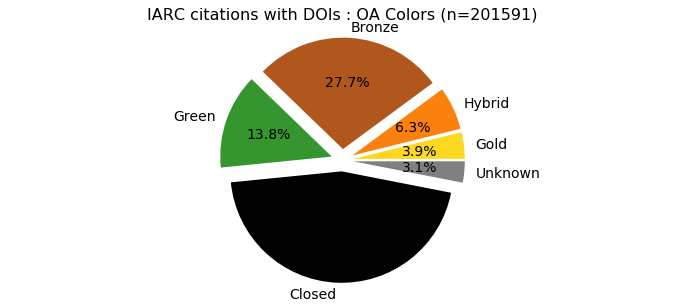

In [207]:
# IARC citations OA Roads
%matplotlib inline
myfileoutfig = 'figures/27_iarc_citations_oa_roads.png'
labels = 'Gold', 'Hybrid', 'Bronze', 'Green', 'Closed', 'Unknown'
colors = ['#FCD820', '#FA810E', '#B1561D', '#35962F', 'black', 'gray']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(iarc_citations_oa_roads['counts'], explode=explode, autopct='%1.1f%%', labels=labels, shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('IARC citations with DOIs : OA Colors (n=' + str(iarc_citations_dois_n) + ')', fontsize=16)
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

In [208]:
# UNIGE citations OA Roads
row_unige_citations_oa_unknown = {'OA Color' : 'unknown', 'counts' : unige_citations_oa_unknown_n}
row_unige_citations_not_oa = {'OA Color' : 'closed', 'counts' : unige_citations_not_oa_n}
unige_citations_oa_roads = unige_citations_oa['citation_doi_oa_status'].value_counts().rename_axis('OA Color').to_frame('counts')
unige_citations_oa_roads = unige_citations_oa_roads.reset_index()
unige_citations_oa_roads = unige_citations_oa_roads.append(row_unige_citations_oa_unknown, ignore_index=True)
unige_citations_oa_roads = unige_citations_oa_roads.append(row_unige_citations_not_oa, ignore_index=True)
unige_citations_oa_roads.loc[unige_citations_oa_roads['OA Color'] == 'gold', 'position'] = 1
unige_citations_oa_roads.loc[unige_citations_oa_roads['OA Color'] == 'hybrid', 'position'] = 2
unige_citations_oa_roads.loc[unige_citations_oa_roads['OA Color'] == 'bronze', 'position'] = 3
unige_citations_oa_roads.loc[unige_citations_oa_roads['OA Color'] == 'green', 'position'] = 4
unige_citations_oa_roads.loc[unige_citations_oa_roads['OA Color'] == 'closed', 'position'] = 5
unige_citations_oa_roads.loc[unige_citations_oa_roads['OA Color'] == 'unknown', 'position'] = 6
unige_citations_oa_roads = unige_citations_oa_roads.sort_values(by='position')
unige_citations_oa_roads = unige_citations_oa_roads.reset_index(drop=True)
unige_citations_oa_roads = unige_citations_oa_roads.set_index('OA Color')
unige_citations_oa_roads

,counts,position
OA Color,,
gold,27380,1.0
hybrid,49134,2.0
bronze,237791,3.0
green,141356,4.0
closed,531709,5.0
unknown,12218,6.0


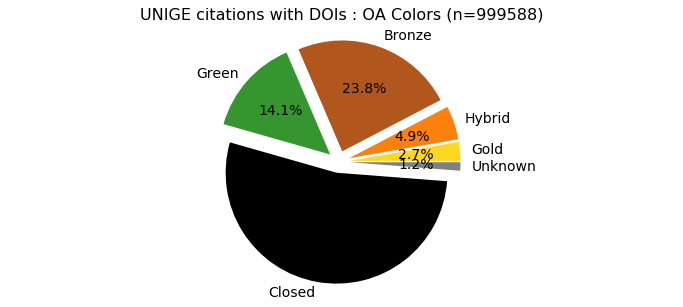

In [210]:
# UNIGE citations OA Roads
%matplotlib inline
myfileoutfig = 'figures/27_unige_citations_oa_roads.png'
labels = 'Gold', 'Hybrid', 'Bronze', 'Green', 'Closed', 'Unknown'
colors = ['#FCD820', '#FA810E', '#B1561D', '#35962F', 'black', 'gray']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(unige_citations_oa_roads['counts'], explode=explode, autopct='%1.1f%%', labels=labels, shadow=False, startangle=0, colors=colors, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('UNIGE citations with DOIs : OA Colors (n=' + str(unige_citations_dois_n) + ')', fontsize=16)
fig1.set_size_inches(12, 5)
fig1.savefig(myfileoutfig, bbox_inches='tight')
plt.show()

In [211]:
# Export values
# IARC publications OA Roads
iarc_publications_oa_roads.to_csv('results/27_iarc_publications_oa_roads.csv', sep='\t', encoding='utf-8', index=True)
# UNIGE publications OA Roads
unige_publications_oa_roads.to_csv('results/27_unige_publications_oa_roads.csv', sep='\t', encoding='utf-8', index=True)
# IARC citations OA Roads
iarc_citations_oa_roads.to_csv('results/27_iarc_citations_oa_roads.csv', sep='\t', encoding='utf-8', index=True)
# UNIGE citations OA Roads
unige_citations_oa_roads.to_csv('results/27_unige_citations_oa_roads.csv', sep='\t', encoding='utf-8', index=True)

## 27.  Does it evolve with time?

In [81]:
# publications DOIs by year of primary publication
unige_publications_doi_counts = unige_all.loc[unige_all['publication_doi'].notna()]['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publications_with_doi').sort_values(by='publication_year')
# OA publications by year
unige_publications_oa_counts = unige_publications_oa['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publication_is_oa_count').sort_values(by='publication_year')
# merge
unige_publications_oa_counts = pd.merge(unige_publications_oa_counts, unige_publications_doi_counts, on='publication_year')
# add %
unige_publications_oa_counts['publication_is_oa_percent'] = unige_publications_oa_counts['publication_is_oa_count'] / unige_publications_oa_counts['publications_with_doi']
# remove errors
unige_publications_oa_counts = unige_publications_oa_counts.loc[(unige_publications_oa_counts['publication_year'] > 2000) & (unige_publications_oa_counts['publication_year'] < 2021)]
unige_publications_oa_counts

,publication_year,publication_is_oa_count,publications_with_doi,publication_is_oa_percent
1,2001,12399,31421,0.394609
2,2002,12332,32890,0.374947
3,2003,15067,35735,0.421631
4,2004,19210,39576,0.485395
5,2005,16714,36217,0.461496
6,2006,20499,45213,0.453387
7,2007,21382,44486,0.480646
8,2008,22769,49886,0.456421
9,2009,29994,56317,0.532592
10,2010,29926,57436,0.521032


In [82]:
# OA status of citations by primary publication year
unige_publications_oa_counts.to_csv('results/27_publications_unige_oa_by_year.csv', sep='\t', encoding='utf-8')

In [83]:
# publication DOIs by year of primary publication
iarc_publications_doi_counts = iarc_all.loc[iarc_all['publication_doi'].notna()]['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publications_with_doi').sort_values(by='publication_year')
# OA publications by year
iarc_publications_oa_counts = iarc_publications_oa['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='publication_is_oa_count').sort_values(by='publication_year')
# merge
iarc_publications_oa_counts = pd.merge(iarc_publications_oa_counts, iarc_publications_doi_counts, on='publication_year')
# add %
iarc_publications_oa_counts['publication_is_oa_percent'] = iarc_publications_oa_counts['publication_is_oa_count'] / iarc_publications_oa_counts['publications_with_doi']
# remove errors
iarc_publications_oa_counts = iarc_publications_oa_counts.loc[(iarc_publications_oa_counts['publication_year'] > 2000) & (iarc_publications_oa_counts['publication_year'] < 2021)]
iarc_publications_oa_counts

,publication_year,publication_is_oa_count,publications_with_doi,publication_is_oa_percent
0,2001,3663,7757,0.472219
1,2002,4581,8892,0.515182
2,2003,3888,9144,0.425197
3,2004,4499,9096,0.494613
4,2005,5288,9871,0.535711
5,2006,5146,10909,0.471721
6,2007,7505,12623,0.594550
7,2008,6135,10951,0.560223
8,2009,6374,11716,0.544042
9,2010,6943,11444,0.606693


In [84]:
# OA status of citations by primary publication year
iarc_publications_oa_counts.to_csv('results/27_publications_iarc_oa_by_year.csv', sep='\t', encoding='utf-8')

In [85]:
# citation DOIs by year of primary publication
unige_citations_doi_counts = unige_all.loc[unige_all['citation_doi'].notna()]['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citations_with_doi').sort_values(by='publication_year')
# OA citations by year
unige_citations_oa_counts = unige_citations_oa['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citation_is_oa_count').sort_values(by='publication_year')
# merge
unige_citations_oa_counts = pd.merge(unige_citations_oa_counts, unige_citations_doi_counts, on='publication_year')
# add %
unige_citations_oa_counts['citation_is_oa_percent'] = unige_citations_oa_counts['citation_is_oa_count'] / unige_citations_oa_counts['citations_with_doi']
# remove errors
unige_citations_oa_counts = unige_citations_oa_counts.loc[(unige_citations_oa_counts['publication_year'] > 2000) & (unige_citations_oa_counts['publication_year'] < 2021)]
unige_citations_oa_counts

,publication_year,citation_is_oa_count,citations_with_doi,citation_is_oa_percent
0,2001,9802,26475,0.370236
1,2002,10334,27658,0.373635
2,2003,10770,28623,0.376271
3,2004,12274,32118,0.382153
4,2005,11387,29892,0.380938
5,2006,14190,37075,0.382738
6,2007,14632,37087,0.394532
7,2008,16451,41633,0.395143
8,2009,20364,47449,0.429177
9,2010,20633,48134,0.428657


In [86]:
# OA status of citations by primary publication year
unige_citations_oa_counts.to_csv('results/27_citations_unige_oa_by_year.csv', sep='\t', encoding='utf-8')

In [87]:
# citation DOIs by year of primary publication
iarc_citations_doi_counts = iarc_all.loc[iarc_all['citation_doi'].notna()]['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citations_with_doi').sort_values(by='publication_year')
# OA citations by year
iarc_citations_oa_counts = iarc_citations_oa['publication_year'].value_counts().rename_axis('publication_year').reset_index(name='citation_is_oa_count').sort_values(by='publication_year')
# merge
iarc_citations_oa_counts = pd.merge(iarc_citations_oa_counts, iarc_citations_doi_counts, on='publication_year')
# add %
iarc_citations_oa_counts['citation_is_oa_percent'] = iarc_citations_oa_counts['citation_is_oa_count'] / iarc_citations_oa_counts['citations_with_doi']
# remove errors
iarc_citations_oa_counts = iarc_citations_oa_counts.loc[(iarc_citations_oa_counts['publication_year'] > 2000) & (iarc_citations_oa_counts['publication_year'] < 2021)]
iarc_citations_oa_counts

,publication_year,citation_is_oa_count,citations_with_doi,citation_is_oa_percent
0,2001,2083,6222,0.334780
1,2002,2189,6693,0.327058
2,2003,2364,6669,0.354476
3,2004,2460,6326,0.388871
4,2005,2880,7093,0.406034
5,2006,3211,7725,0.415663
6,2007,3924,9236,0.424859
7,2008,3668,8457,0.433724
8,2009,4241,9250,0.458486
9,2010,4367,8907,0.490289


In [88]:
# OA status of citations by primary publication year
iarc_citations_oa_counts.to_csv('results/27_citations_iarc_oa_by_year.csv', sep='\t', encoding='utf-8')

In [89]:
# merge both tables for publications
publications_oa_counts_by_year = iarc_publications_oa_counts[['publication_year', 'publication_is_oa_percent']]
publications_oa_counts_by_year = publications_oa_counts_by_year.rename(columns={'publication_is_oa_percent' : 'IARC'})
publications_oa_counts_by_year = publications_oa_counts_by_year.merge(unige_publications_oa_counts[['publication_year', 'publication_is_oa_percent']], on='publication_year')
publications_oa_counts_by_year = publications_oa_counts_by_year.rename(columns={'publication_is_oa_percent' : 'UNIGE'})
publications_oa_counts_by_year = publications_oa_counts_by_year.set_index('publication_year')
publications_oa_counts_by_year

,IARC,UNIGE
publication_year,,
2001,0.472219,0.394609
2002,0.515182,0.374947
2003,0.425197,0.421631
2004,0.494613,0.485395
2005,0.535711,0.461496
2006,0.471721,0.453387
2007,0.594550,0.480646
2008,0.560223,0.456421
2009,0.544042,0.532592


In [90]:
# merge both tables for citations
citations_oa_counts_by_year = iarc_citations_oa_counts[['publication_year', 'citation_is_oa_percent']]
citations_oa_counts_by_year = citations_oa_counts_by_year.rename(columns={'citation_is_oa_percent' : 'IARC'})
citations_oa_counts_by_year = citations_oa_counts_by_year.merge(unige_citations_oa_counts[['publication_year', 'citation_is_oa_percent']], on='publication_year')
citations_oa_counts_by_year = citations_oa_counts_by_year.rename(columns={'citation_is_oa_percent' : 'UNIGE'})
citations_oa_counts_by_year = citations_oa_counts_by_year.set_index('publication_year')
citations_oa_counts_by_year

,IARC,UNIGE
publication_year,,
2001,0.334780,0.370236
2002,0.327058,0.373635
2003,0.354476,0.376271
2004,0.388871,0.382153
2005,0.406034,0.380938
2006,0.415663,0.382738
2007,0.424859,0.394532
2008,0.433724,0.395143
2009,0.458486,0.429177


In [91]:
# export 26 csv and excel
# publications
publications_oa_counts_by_year.to_csv('results/27_publications_iarc_unige_oa_by_year.csv', index=True, sep='\t', encoding='utf-8')
publications_oa_counts_by_year.to_excel('results/27_publications_iarc_unige_oa_by_year.xlsx', index=True)
# citations
citations_oa_counts_by_year.to_csv('results/27_citations_iarc_unige_oa_by_year.csv', index=True, sep='\t', encoding='utf-8')
citations_oa_counts_by_year.to_excel('results/27_citations_iarc_unige_oa_by_year.xlsx', index=True)

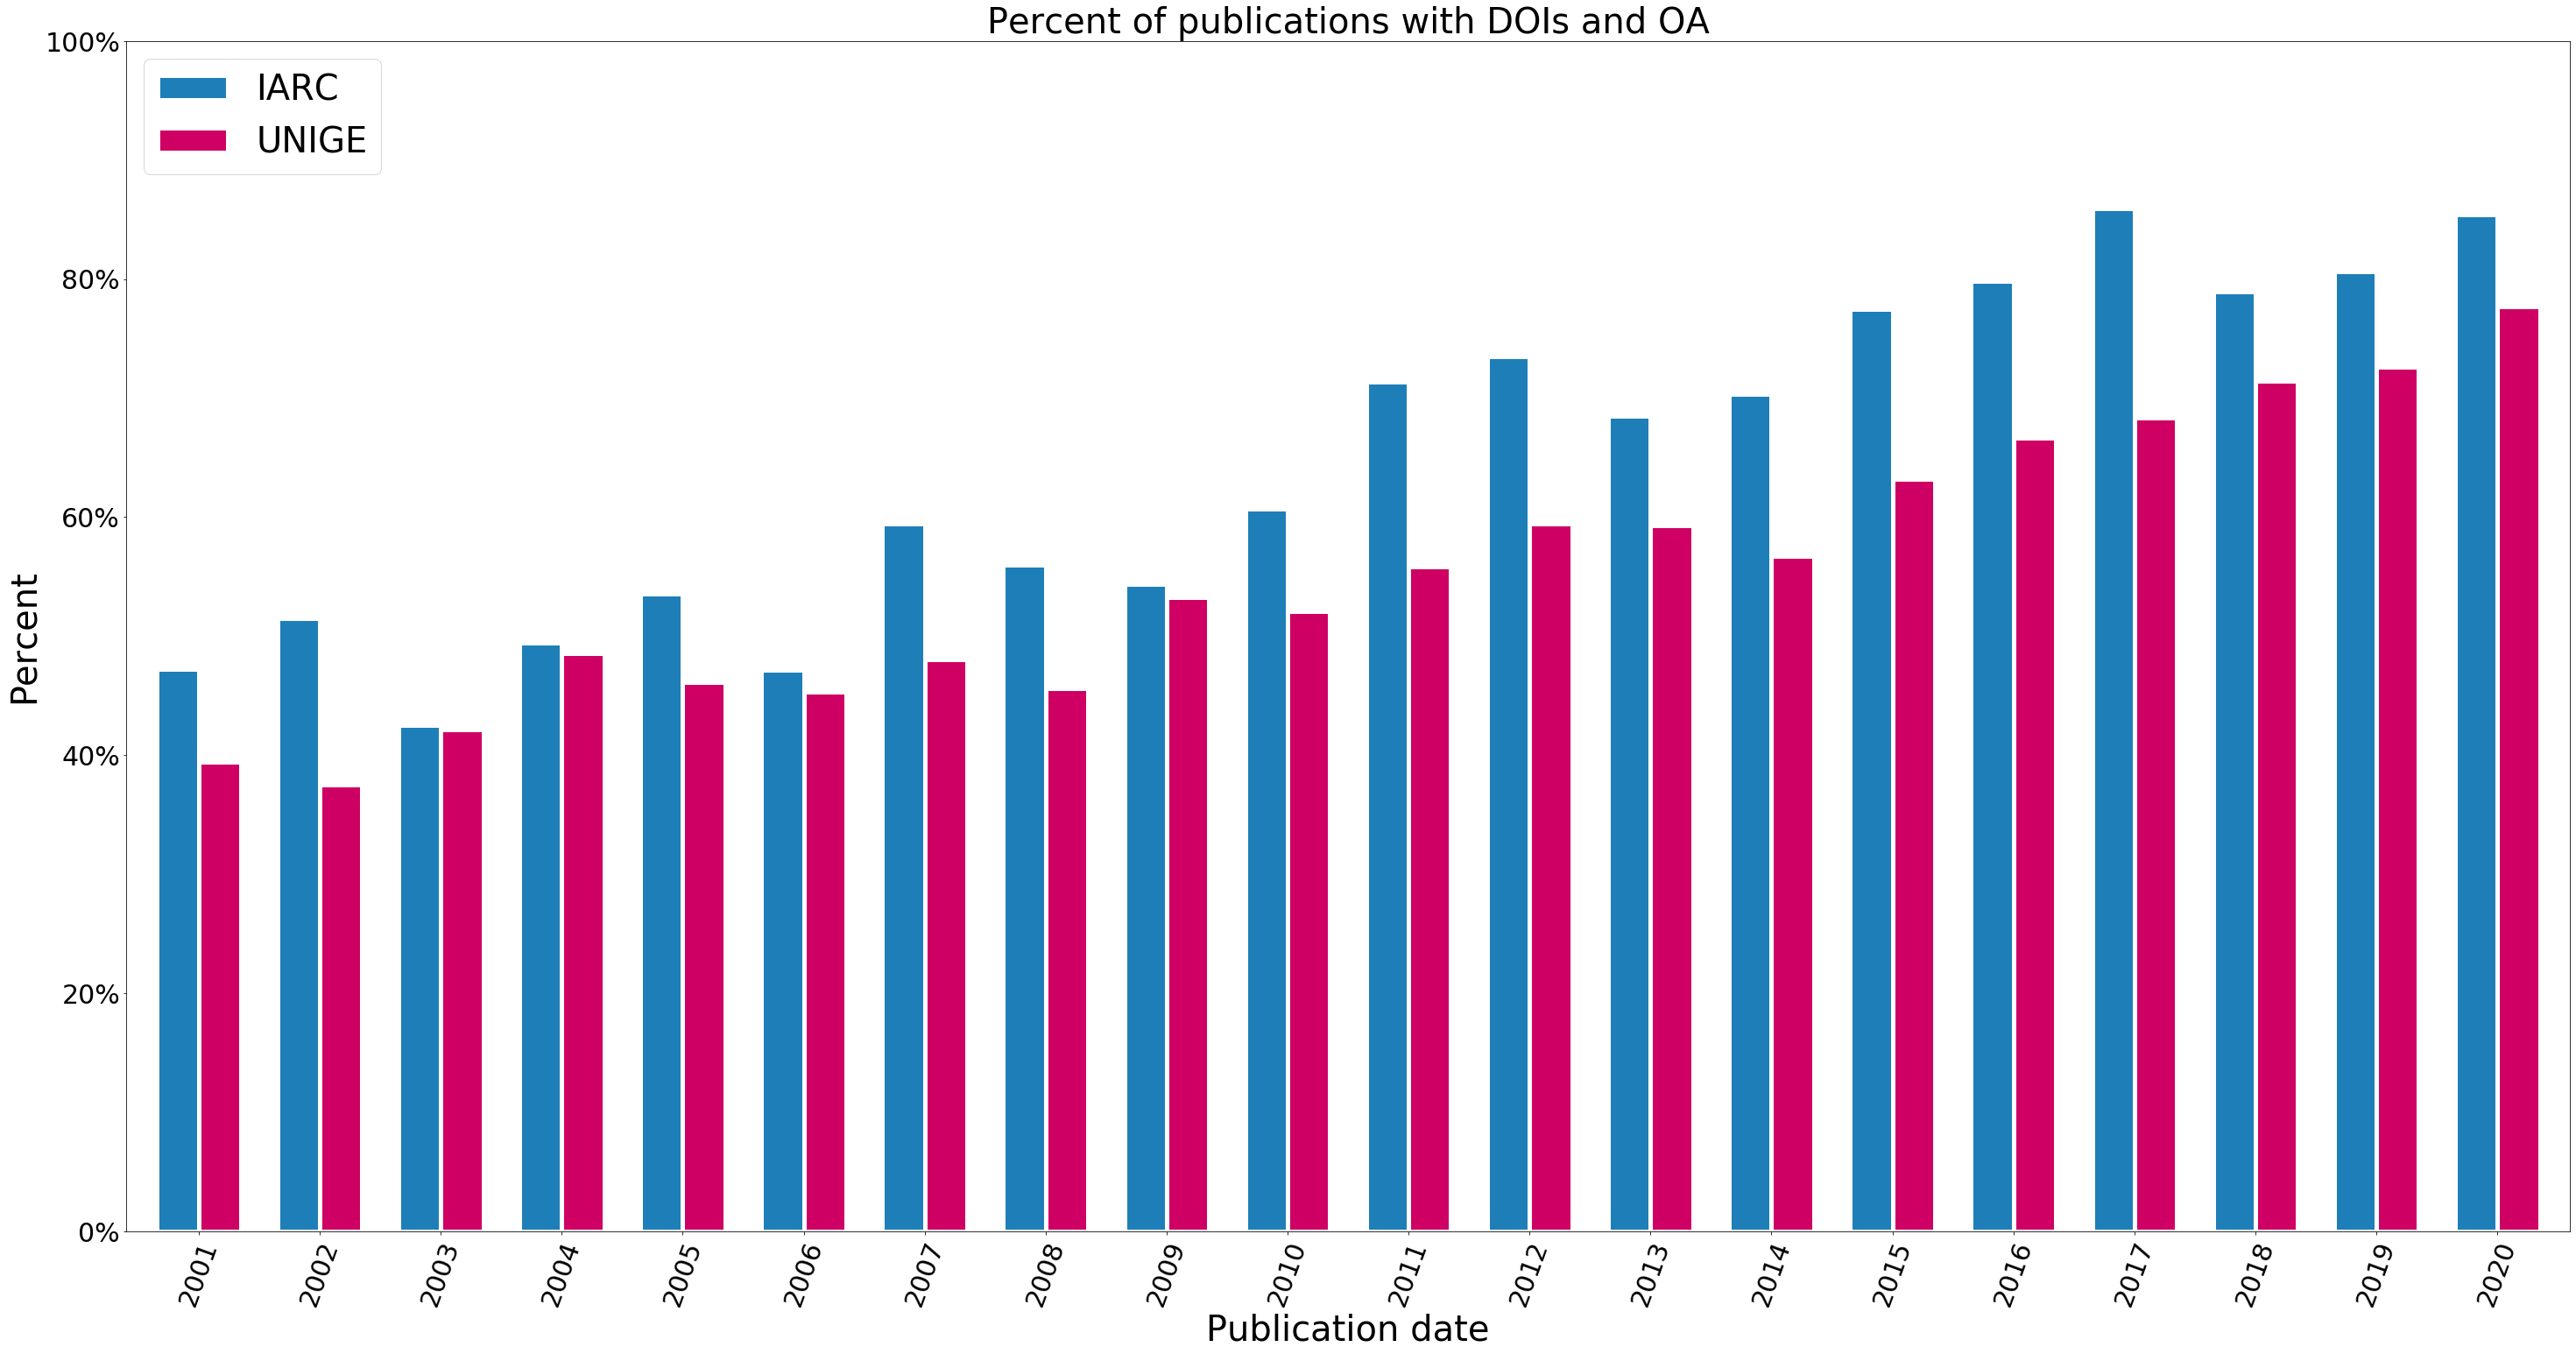

In [92]:
# year counts for publications
myfileoutfig = 'figures/27_publications_iarc_unige_oa_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = publications_oa_counts_by_year.plot.bar(color=[IARC_color, UNIGE_color], rot=70, width=0.7, edgecolor='white', linewidth=5,xlim=[2000,2020], ylim=[0,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.set_title('Percent of publications with DOIs and OA', fontsize=40)
ax = ax.legend(loc=2, prop={'size': 40})
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

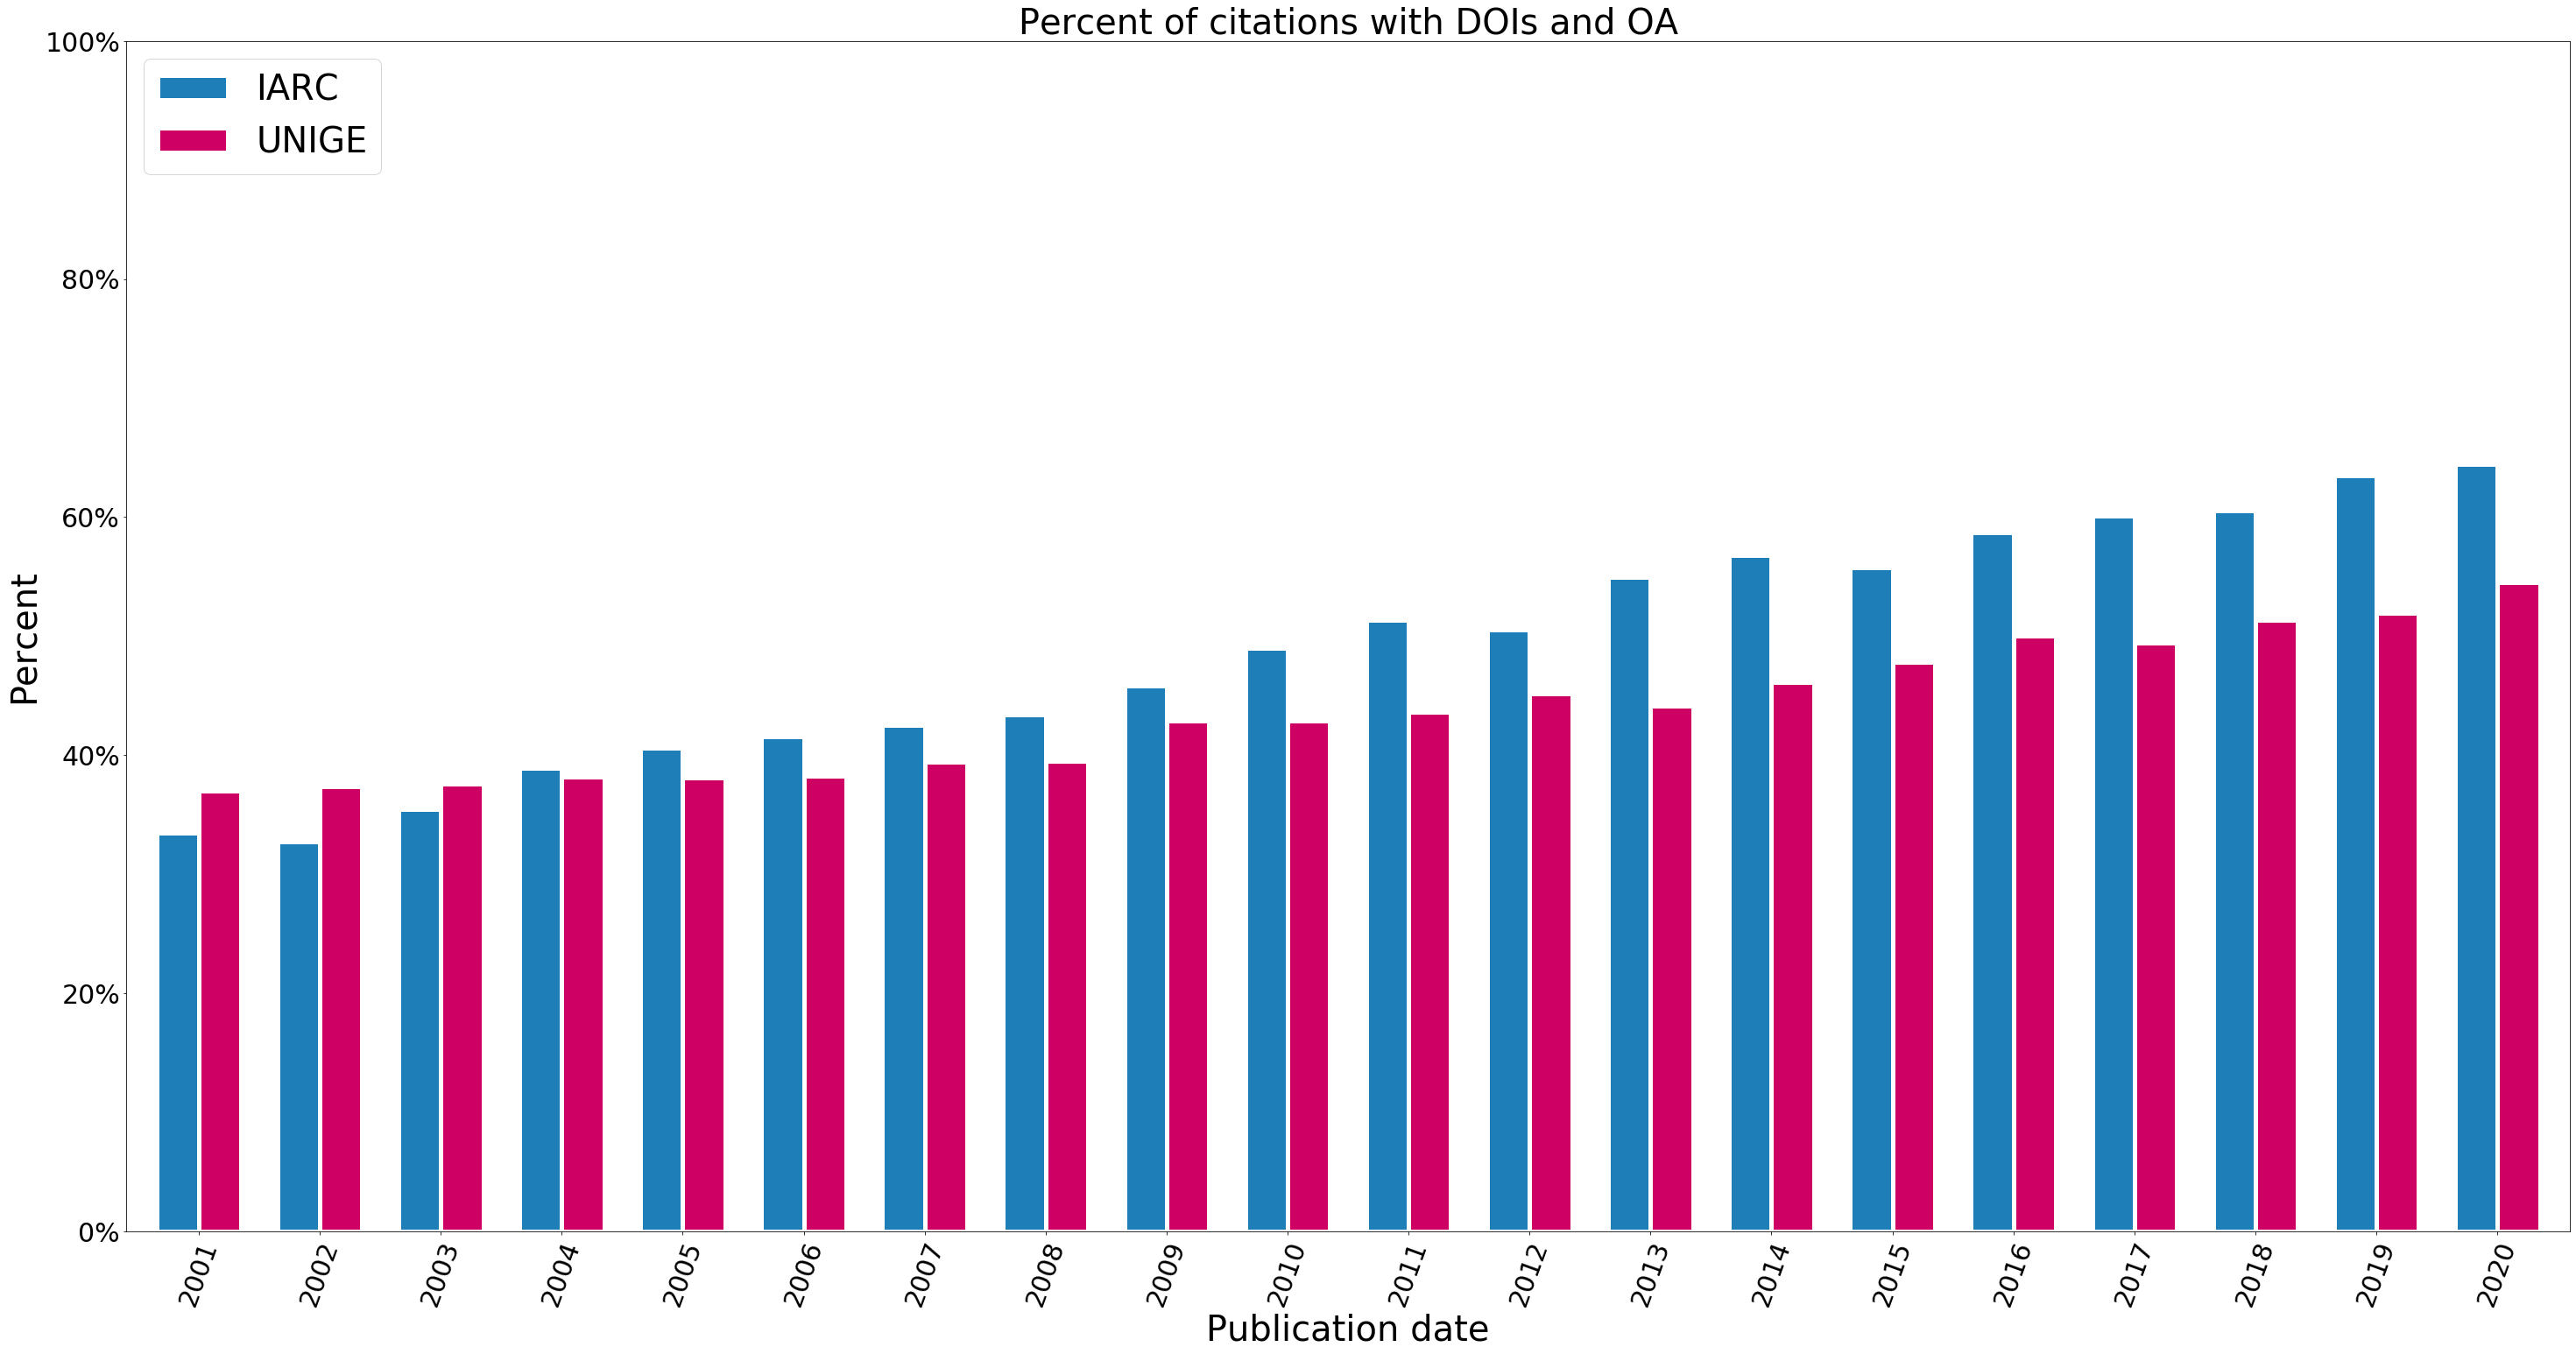

In [93]:
# year counts for citations
myfileoutfig = 'figures/27_citations_iarc_unige_oa_by_year.png'
plt.rcParams.update({'font.size': 30})
ax = citations_oa_counts_by_year.plot.bar(color=[IARC_color, UNIGE_color], rot=70, width=0.7, edgecolor='white', linewidth=5, xlim=[2000,2020], ylim=[0,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Publication date', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.set_title('Percent of citations with DOIs and OA', fontsize=40)
ax = ax.legend(loc=2, prop={'size': 40})
fig = ax.get_figure()
fig.set_size_inches(50, 25)
fig.savefig(myfileoutfig, dpi=100)

## 27.  Do article that are themselves OA cite more OA journals than articles that are not OA ?

In [94]:
unige_publications_oa

,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
83,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",1999.0,J DENT RES,10.1177/00220345990780020301,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
84,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2008.0,COMMUNITY DENT ORAL,10.1111/j.1600-0528.2006.00364.x,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
85,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2002.0,INT J PROSTHODONT,NaN,...,NaN,NaN,bronze,True,NaN,NaN,NaN,NaN,NaN,NaN
86,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2000.0,CLIN ORAL IMPLAN RES,10.1034/j.1600-0501.2000.011005401.x,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
87,WOS:000308547000129,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00586.x,22073988,"Bronze, Green Accepted",2009.0,OSSEOINTEGRATION DEN,NaN,...,NaN,NaN,bronze,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260976,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,Q A COR COVID 19,NaN,...,NaN,NaN,bronze,True,NaN,NaN,NaN,NaN,NaN,NaN
1260977,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,INT FORUM ALLERGY RH,10.1002/alr.22577,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,closed,False
1260978,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2020.0,INT FORUM ALLERGY RH,10.1002/alr.22592,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,bronze,True
1260979,WOS:000591530900014,2020,Article,CHEM SENSES,10.1093/chemse/bjaa041,3.25641e+07,"Green Submitted, Green Published, Green Accept...",2021.0,IEEE T PATTERN ANAL,10.1109/TPAMI.2020.2975798,...,NaN,NaN,bronze,True,NaN,1.0,NaN,NaN,green,True


In [95]:
unige_publications_not_oa

,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
0,WOS:000307585400002,2012,Article,GERODONTOLOGY,10.1111/j.1741-2358.2011.00508.x,22591169,NaN,NaN,NaN,NaN,...,NaN,NaN,closed,False,NaN,NaN,NaN,NaN,NaN,NaN
1,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,2002.0,INT J PROSTHODONT,NaN,...,NaN,NaN,closed,False,NaN,NaN,NaN,NaN,NaN,NaN
2,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,1999.0,COMMUNITY DENT ORAL,10.1111/j.1600-0528.1999.tb02031.x,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False
3,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,1999.0,J DENT RES,10.1177/00220345990780020301,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False
4,WOS:000287362000002,2011,Article,GERODONTOLOGY,10.1111/j.1741-2358.2009.00330.x,20337725,NaN,2001.0,Gerodontology,10.1111/j.1741-2358.2001.00079.x,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260622,WOS:000302151200015,2012,Article,J THROMB HAEMOST,10.1111/j.1538-7836.2012.04654.x,2.23219e+07,NaN,2009.0,ANN HEMATOL,10.1007/s00277-008-0665-7,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,green,True
1260623,WOS:000302151200015,2012,Article,J THROMB HAEMOST,10.1111/j.1538-7836.2012.04654.x,2.23219e+07,NaN,2010.0,INTERN EMERG MED,10.1007/s11739-010-0380-y,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False
1260624,WOS:000302151200015,2012,Article,J THROMB HAEMOST,10.1111/j.1538-7836.2012.04654.x,2.23219e+07,NaN,1995.0,THROMB HAEMOSTASIS,NaN,...,NaN,NaN,closed,False,NaN,NaN,NaN,NaN,NaN,NaN
1260625,WOS:000302151200015,2012,Article,J THROMB HAEMOST,10.1111/j.1538-7836.2012.04654.x,2.23219e+07,NaN,2005.0,BLOOD,10.1182/blood-2004-05-1811,...,NaN,NaN,closed,False,NaN,1.0,NaN,NaN,closed,False


In [96]:
unige_publications_oa_unknown

,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
2324,WOS:000493407400011,2019,Article,EUR J PAEDIATR DENT,10.23804/ejpd.2019.20.01.11,30919646,NaN,2008.0,SPEC CARE DENT,10.1111/j.1754-4505.2008.00047.x,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
2325,WOS:000493407400011,2019,Article,EUR J PAEDIATR DENT,10.23804/ejpd.2019.20.01.11,30919646,NaN,2016.0,J ORAL MAXIL SURG,10.1016/j.joms.2015.07.023,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
2326,WOS:000493407400011,2019,Article,EUR J PAEDIATR DENT,10.23804/ejpd.2019.20.01.11,30919646,NaN,1998.0,J DENT RES,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2327,WOS:000493407400011,2019,Article,EUR J PAEDIATR DENT,10.23804/ejpd.2019.20.01.11,30919646,NaN,2007.0,J ORAL REHABIL,10.1111/j.1365-2842.2006.01665.x,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
2328,WOS:000493407400011,2019,Article,EUR J PAEDIATR DENT,10.23804/ejpd.2019.20.01.11,30919646,NaN,2001.0,MYOTONIC DYSTROPHY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236029,WOS:000483409900001,2020,Review,APHASIOLOGY,10.1080/02687038.2019.1643003,NaN,NaN,2019.0,INT J STROKE,10.1177/1747493018806200,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,green,True
1236030,WOS:000483409900001,2020,Review,APHASIOLOGY,10.1080/02687038.2019.1643003,NaN,NaN,2017.0,DISABIL REHABIL,10.1080/09638288.2016.1194899,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,green,True
1236031,WOS:000483409900001,2020,Review,APHASIOLOGY,10.1080/02687038.2019.1643003,NaN,NaN,2014.0,APHASIOLOGY,10.1080/02687038.2014.930262,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
1236032,WOS:000483409900001,2020,Review,APHASIOLOGY,10.1080/02687038.2019.1643003,NaN,NaN,1973.0,ECONOMETRICA,10.2307/1914093,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False


In [97]:
unige_publications_without_doi_and_citation_with_oa_status

,publication_wos_id,publication_year,publication_type,publication_journal,publication_doi,publication_pmid,publication_wos_oa,citation_year,citation_journal,citation_doi,...,publication_doi_is_iarc_publication,publication_doi_is_iarc_citation,publication_doi_oa_status,publication_doi_has_repository_copy,citation_doi_is_unige_publication,citation_doi_is_unige_citation,citation_doi_is_iarc_publication,citation_doi_is_iarc_citation,citation_doi_oa_status,citation_doi_has_repository_copy
1335,WOS:000169353000022,2001,Article,EUR J CANCER CARE,NaN,11827271,NaN,1998.0,ANN ONCOL,10.1023/A:1008389021382,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,bronze,False
1336,WOS:000169353000022,2001,Article,EUR J CANCER CARE,NaN,11827271,NaN,1993.0,J NATL CANCER I,10.1093/jnci/85.13.1074,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
2406,WOS:000320219500012,2013,Article,EUR J PAEDIATR DENT,NaN,23758465,NaN,2011.0,EUR ARCH PAEDIATR DE,10.1007/BF03262790,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
2407,WOS:000320219500012,2013,Article,EUR J PAEDIATR DENT,NaN,23758465,NaN,2011.0,EUR ARCH PAEDIATR DE,10.1007/BF03262788,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
2408,WOS:000320219500012,2013,Article,EUR J PAEDIATR DENT,NaN,23758465,NaN,2010.0,MED ORAL PATOL ORAL,10.4317/medoral.15.e912,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,bronze,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251702,WOS:000351056600053,2015,Meeting Abstract,NEUROPATH APPL NEURO,NaN,NaN,NaN,2011.0,NAT REV NEUROL,10.1038/nrneurol.2011.43,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False
1254503,WOS:000395012500007,2017,Meeting Abstract,NEUROPATH APPL NEURO,NaN,NaN,NaN,2016.0,BRAIN,10.1093/brain/aww256,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,bronze,True
1255875,WOS:000229369500025,2005,Meeting Abstract,BIPOLAR DISORD,NaN,NaN,NaN,2003.0,AM J PSYCHIAT,10.1176/appi.ajp.160.5.999,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,closed,False
1255876,WOS:000229369500025,2005,Meeting Abstract,BIPOLAR DISORD,NaN,NaN,NaN,2002.0,NEUROSCI LETT,10.1016/S0304-3940(02)01029-7,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,closed,False


In [98]:
# OA status of citations from UNIGE OA publications
unige_publications_oa_citaition_oa_status_counts = unige_publications_oa['citation_doi_oa_status'].value_counts().rename_axis('OA_status').reset_index(name='citations_count').sort_values(by='OA_status')
unige_publications_oa_citaition_oa_status_counts

,OA_status,citations_count
1,bronze,152694
0,closed,274533
4,gold,19733
2,green,94848
3,hybrid,35013


In [99]:
# OA status of citations from UNIGE closed publications
unige_publications_not_oa_citaition_oa_status_counts = unige_publications_not_oa['citation_doi_oa_status'].value_counts().rename_axis('OA_status').reset_index(name='citations_count').sort_values(by='OA_status')
unige_publications_not_oa_citaition_oa_status_counts

,OA_status,citations_count
1,bronze,79138
0,closed,237397
4,gold,7075
2,green,43603
3,hybrid,13189


In [100]:
# OA status of citations from UNIGE OA unknown publications
unige_publications_oa_unknown_citaition_oa_status_counts = unige_publications_oa_unknown['citation_doi_oa_status'].value_counts().rename_axis('OA_status').reset_index(name='citations_count').sort_values(by='OA_status')
unige_publications_oa_unknown_citaition_oa_status_counts

,OA_status,citations_count
1,bronze,604
0,closed,1901
4,gold,69
2,green,315
3,hybrid,118


In [101]:
# OA status of citations from UNIGE publications without DOI
unige_publications_without_doi_and_citation_with_oa_status_counts = unige_publications_without_doi_and_citation_with_oa_status['citation_doi_oa_status'].value_counts().rename_axis('OA_status').reset_index(name='citations_count').sort_values(by='OA_status')
unige_publications_without_doi_and_citation_with_oa_status_counts

,OA_status,citations_count
1,bronze,5355
0,closed,17878
4,gold,503
2,green,2590
3,hybrid,814


In [102]:
# add 1 to OA citations
unige_publications_oa.loc[unige_publications_oa['citation_doi_oa_status'].isin(oas), 'isoa'] = 1
unige_publications_oa.loc[unige_publications_oa['citation_doi_oa_status'] == 'closed', 'isoa'] = 0
unige_publications_not_oa.loc[unige_publications_not_oa['citation_doi_oa_status'].isin(oas), 'isoa'] = 1
unige_publications_not_oa.loc[unige_publications_not_oa['citation_doi_oa_status'] == 'closed', 'isoa'] = 0
iarc_publications_oa.loc[iarc_publications_oa['citation_doi_oa_status'].isin(oas), 'isoa'] = 1
iarc_publications_oa.loc[iarc_publications_oa['citation_doi_oa_status'] == 'closed', 'isoa'] = 0
iarc_publications_not_oa.loc[iarc_publications_not_oa['citation_doi_oa_status'].isin(oas), 'isoa'] = 1
iarc_publications_not_oa.loc[iarc_publications_not_oa['citation_doi_oa_status'] == 'closed', 'isoa'] = 0

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [103]:
# UNIGE publications OA and citations OA
unige_publications_oa_citations_oa = unige_publications_oa.loc[unige_publications_oa['citation_doi_oa_status'].isin(oas)]
# UNIGE publications OA and citations not OA
unige_publications_oa_citations_not_oa = unige_publications_oa.loc[unige_publications_oa['citation_doi_oa_status'] == 'closed']
# UNIGE publications not OA and citations OA
unige_publications_not_oa_citations_oa = unige_publications_not_oa.loc[unige_publications_not_oa['citation_doi_oa_status'].isin(oas)]
# UNIGE publications not OA and citations not OA
unige_publications_not_oa_citations_not_oa = unige_publications_not_oa.loc[unige_publications_not_oa['citation_doi_oa_status'] == 'closed']

# IARC publications OA and citations OA
iarc_publications_oa_citations_oa = iarc_publications_oa.loc[iarc_publications_oa['citation_doi_oa_status'].isin(oas)]
# IARC publications OA and citations OA
iarc_publications_oa_citations_not_oa = iarc_publications_oa.loc[iarc_publications_oa['citation_doi_oa_status'] == 'closed']
# IARC publications not OA and citations OA
iarc_publications_not_oa_citations_oa = iarc_publications_not_oa.loc[iarc_publications_not_oa['citation_doi_oa_status'].isin(oas)]
# IARC publications not OA and citations not OA
iarc_publications_not_oa_citations_not_oa = iarc_publications_not_oa.loc[iarc_publications_not_oa['citation_doi_oa_status'] == 'closed']

In [104]:
# print data results
unige_publications_oa_citations_oa_n = unige_publications_oa_citations_oa.drop_duplicates(subset='publication_wos_id').shape[0]
unige_publications_oa_citations_oa_p = unige_publications_oa_citations_oa_n / unige_publications_oa_n
print ('UNIGE publications OA : ' + str(unige_publications_oa_n))
print ('UNIGE publications OA with one or more citations OA : ' + str(unige_publications_oa_citations_oa_n))
print ('UNIGE publications OA with one or more citations OA  % : ' + str(unige_publications_oa_citations_oa_p))
unige_publications_oa_citations_not_oa_n = unige_publications_oa_citations_not_oa.drop_duplicates(subset='publication_wos_id').shape[0]
unige_publications_oa_citations_not_oa_p = unige_publications_oa_citations_not_oa_n / unige_publications_oa_n
print ('UNIGE publications OA with one or more citations not OA : ' + str(unige_publications_oa_citations_not_oa_n))
print ('UNIGE publications OA with one or more citations not OA  % : ' + str(unige_publications_oa_citations_not_oa_p))
unige_publications_not_oa_citations_oa_n = unige_publications_not_oa_citations_oa.drop_duplicates(subset='publication_wos_id').shape[0]
unige_publications_not_oa_citations_oa_p = unige_publications_not_oa_citations_oa_n / unige_publications_not_oa_n
print ('UNIGE publications not OA : ' + str(unige_publications_not_oa_n))
print ('UNIGE publications not OA with one or more citations OA : ' + str(unige_publications_not_oa_citations_oa_n))
print ('UNIGE publications not OA with one or more citations OA  % : ' + str(unige_publications_not_oa_citations_oa_p))
unige_publications_not_oa_citations_not_oa_n = unige_publications_not_oa_citations_not_oa.drop_duplicates(subset='publication_wos_id').shape[0]
unige_publications_not_oa_citations_not_oa_p = unige_publications_not_oa_citations_not_oa_n / unige_publications_not_oa_n
print ('UNIGE publications not OA with one or more citations not OA : ' + str(unige_publications_not_oa_citations_not_oa_n))
print ('UNIGE publications not OA with one or more citations not OA  % : ' + str(unige_publications_not_oa_citations_not_oa_p))

UNIGE publications OA : 15793
UNIGE publications OA with one or more citations OA : 14951
UNIGE publications OA with one or more citations OA  % : 0.9466852402963338
UNIGE publications OA with one or more citations not OA : 14866
UNIGE publications OA with one or more citations not OA  % : 0.9413031089723295
UNIGE publications not OA : 13462
UNIGE publications not OA with one or more citations OA : 11317
UNIGE publications not OA with one or more citations OA  % : 0.8406626058535136
UNIGE publications not OA with one or more citations not OA : 12140
UNIGE publications not OA with one or more citations not OA  % : 0.901797652651909


In [105]:
unige_publications_oa.groupby(['publication_wos_id'])['isoa'].mean()

publication_wos_id
WOS:000166012400060    0.230769
WOS:000166015000013    0.745763
WOS:000166101000005    0.166667
WOS:000166187900016    0.333333
WOS:000166329100010    0.153846
                         ...   
WOS:000704725700001    0.600000
WOS:000704729300001    1.000000
WOS:000705371500001    0.818182
WOS:000706112500001    0.458333
WOS:000753121700038    0.523810
Name: isoa, Length: 15793, dtype: float64

In [106]:
unige_publications_oa_citations_oa_means = unige_publications_oa.groupby(['publication_wos_id'])['isoa'].mean()
unige_publications_oa_citations_oa_mean = unige_publications_oa_citations_oa_means.mean()
print ('UNIGE publications OA : ' + str(unige_publications_oa_n))
print ('UNIGE mean of citations OA per publication within publications OA : ' + str(unige_publications_oa_citations_oa_mean))
unige_publications_not_oa_citations_oa_means = unige_publications_not_oa.groupby(['publication_wos_id'])['isoa'].mean()
unige_publications_not_oa_citations_oa_mean = unige_publications_not_oa_citations_oa_means.mean()
print ('UNIGE publications not OA : ' + str(unige_publications_not_oa_n))
print ('UNIGE mean of citations OA per publication within publications not OA : ' + str(unige_publications_not_oa_citations_oa_mean))

UNIGE publications OA : 15793
UNIGE mean of citations OA per publication within publications OA : 0.5095568917652125
UNIGE publications not OA : 13462
UNIGE mean of citations OA per publication within publications not OA : 0.3410362988665907


In [107]:
# print data results
iarc_publications_oa_citations_oa_n = iarc_publications_oa_citations_oa.drop_duplicates(subset='publication_wos_id').shape[0]
iarc_publications_oa_citations_oa_p = iarc_publications_oa_citations_oa_n / iarc_publications_oa_n
print ('IARC publications OA : ' + str(iarc_publications_oa_n))
print ('IARC publications OA with one or more citations OA : ' + str(iarc_publications_oa_citations_oa_n))
print ('IARC publications OA with one or more citations OA  % : ' + str(iarc_publications_oa_citations_oa_p))
iarc_publications_oa_citations_not_oa_n = iarc_publications_oa_citations_not_oa.drop_duplicates(subset='publication_wos_id').shape[0]
iarc_publications_oa_citations_not_oa_p = iarc_publications_oa_citations_not_oa_n / iarc_publications_oa_n
print ('IARC publications OA with one or more citations not OA : ' + str(iarc_publications_oa_citations_not_oa_n))
print ('IARC publications OA with one or more citations not OA  % : ' + str(iarc_publications_oa_citations_not_oa_p))
iarc_publications_not_oa_citations_oa_n = iarc_publications_not_oa_citations_oa.drop_duplicates(subset='publication_wos_id').shape[0]
iarc_publications_not_oa_citations_oa_p = iarc_publications_not_oa_citations_oa_n / iarc_publications_not_oa_n
print ('IARC publications not OA : ' + str(iarc_publications_not_oa_n))
print ('IARC publications not OA with one or more citations OA : ' + str(iarc_publications_not_oa_citations_oa_n))
print ('IARC publications not OA with one or more citations OA  % : ' + str(iarc_publications_not_oa_citations_oa_p))
iarc_publications_not_oa_citations_not_oa_n = iarc_publications_not_oa_citations_not_oa.drop_duplicates(subset='publication_wos_id').shape[0]
iarc_publications_not_oa_citations_not_oa_p = iarc_publications_not_oa_citations_not_oa_n / iarc_publications_not_oa_n
print ('IARC publications not OA with one or more citations not OA : ' + str(iarc_publications_not_oa_citations_not_oa_n))
print ('IARC publications not OA with one or more citations not OA  % : ' + str(iarc_publications_not_oa_citations_not_oa_p))

IARC publications OA : 4147
IARC publications OA with one or more citations OA : 4040
IARC publications OA with one or more citations OA  % : 0.974198215577526
IARC publications OA with one or more citations not OA : 3978
IARC publications OA with one or more citations not OA  % : 0.9592476489028213
IARC publications not OA : 2314
IARC publications not OA with one or more citations OA : 1997
IARC publications not OA with one or more citations OA  % : 0.8630077787381158
IARC publications not OA with one or more citations not OA : 2025
IARC publications not OA with one or more citations not OA  % : 0.8751080380293863


In [108]:
iarc_publications_oa_citations_oa_means = iarc_publications_oa.groupby(['publication_wos_id'])['isoa'].mean()
iarc_publications_oa_citations_oa_mean = iarc_publications_oa_citations_oa_means.mean()
print ('IARC publications OA : ' + str(iarc_publications_oa_n))
print ('IARC mean of citations OA per publication within publications OA : ' + str(iarc_publications_oa_citations_oa_mean))
iarc_publications_not_oa_citations_oa_means = iarc_publications_not_oa.groupby(['publication_wos_id'])['isoa'].mean()
iarc_publications_not_oa_citations_oa_mean = iarc_publications_not_oa_citations_oa_means.mean()
print ('IARC publications not OA : ' + str(iarc_publications_not_oa_n))
print ('IARC mean of citations OA per publication within publications not OA : ' + str(iarc_publications_not_oa_citations_oa_mean))

IARC publications OA : 4147
IARC mean of citations OA per publication within publications OA : 0.5709824650293215
IARC publications not OA : 2314
IARC mean of citations OA per publication within publications not OA : 0.4389496988305206


In [109]:
# write  results on file
with open('27_oa_citations_means.txt', 'a') as f:
    f.write('27. 27. Do article that are themselves OA cite more OA journals than articles that are not OA?\n')
    f.write('----------------------------------------\n')
    f.write('  \n')
    f.write('UNIGE publications OA : ' + str(unige_publications_oa_n) + '\n')
    f.write('UNIGE publications OA with one or more citations OA : ' + str(unige_publications_oa_citations_oa_n) + '\n')
    f.write('UNIGE publications OA with one or more citations OA  % : ' + str(unige_publications_oa_citations_oa_p) + '\n')
    f.write('UNIGE publications OA with one or more citations not OA : ' + str(unige_publications_oa_citations_not_oa_n) + '\n')
    f.write('UNIGE publications OA with one or more citations not OA  % : ' + str(unige_publications_oa_citations_not_oa_p) + '\n')
    f.write('UNIGE publications not OA : ' + str(unige_publications_not_oa_n) + '\n')
    f.write('UNIGE publications not OA with one or more citations OA : ' + str(unige_publications_not_oa_citations_oa_n) + '\n')
    f.write('UNIGE publications not OA with one or more citations OA  % : ' + str(unige_publications_not_oa_citations_oa_p) + '\n')
    f.write('UNIGE publications not OA with one or more citations not OA : ' + str(unige_publications_not_oa_citations_not_oa_n) + '\n')
    f.write('UNIGE publications not OA with one or more citations not OA  % : ' + str(unige_publications_not_oa_citations_not_oa_p) + '\n')
    f.write('UNIGE mean of citations OA per publication within publications OA : ' + str(unige_publications_oa_citations_oa_mean) + '\n')
    f.write('UNIGE mean of citations OA per publication within publications not OA : ' + str(unige_publications_not_oa_citations_oa_mean) + '\n')
    f.write('  \n')
    f.write('IARC publications OA : ' + str(iarc_publications_oa_n) + '\n')
    f.write('IARC publications OA with one or more citations OA : ' + str(iarc_publications_oa_citations_oa_n) + '\n')
    f.write('IARC publications OA with one or more citations OA  % : ' + str(iarc_publications_oa_citations_oa_p) + '\n')
    f.write('IARC publications OA with one or more citations not OA : ' + str(iarc_publications_oa_citations_not_oa_n) + '\n')
    f.write('IARC publications OA with one or more citations not OA  % : ' + str(iarc_publications_oa_citations_not_oa_p) + '\n')
    f.write('IARC publications not OA : ' + str(iarc_publications_not_oa_n) + '\n')
    f.write('IARC publications not OA with one or more citations OA : ' + str(iarc_publications_not_oa_citations_oa_n) + '\n')
    f.write('IARC publications not OA with one or more citations OA  % : ' + str(iarc_publications_not_oa_citations_oa_p) + '\n')
    f.write('IARC publications not OA with one or more citations not OA : ' + str(iarc_publications_not_oa_citations_not_oa_n) + '\n')
    f.write('IARC publications not OA with one or more citations not OA  % : ' + str(iarc_publications_not_oa_citations_not_oa_p) + '\n')
    f.write('IARC mean of citations OA per publication within publications OA : ' + str(iarc_publications_oa_citations_oa_mean) + '\n')
    f.write('IARC mean of citations OA per publication within publications not OA : ' + str(iarc_publications_not_oa_citations_oa_mean) + '\n')

In [110]:
unige_publications_oa_citations_oa_means = unige_publications_oa_citations_oa_means.reset_index()
unige_publications_oa_citations_oa_means = unige_publications_oa_citations_oa_means.rename(columns = {'isoa' : 'UNIGE publications OA'})
unige_publications_oa_citations_oa_means

,publication_wos_id,UNIGE publications OA
0,WOS:000166012400060,0.230769
1,WOS:000166015000013,0.745763
2,WOS:000166101000005,0.166667
3,WOS:000166187900016,0.333333
4,WOS:000166329100010,0.153846
...,...,...
15788,WOS:000704725700001,0.600000
15789,WOS:000704729300001,1.000000
15790,WOS:000705371500001,0.818182
15791,WOS:000706112500001,0.458333


In [111]:
unige_publications_not_oa_citations_oa_means = unige_publications_not_oa_citations_oa_means.reset_index()
unige_publications_not_oa_citations_oa_means = unige_publications_not_oa_citations_oa_means.rename(columns = {'isoa' : 'UNIGE publications NOT OA'})
unige_publications_not_oa_citations_oa_means

,publication_wos_id,UNIGE publications NOT OA
0,WOS:000089832000009,0.312500
1,WOS:000165643600007,0.000000
2,WOS:000165755100006,0.100000
3,WOS:000166055800020,0.727273
4,WOS:000166064500026,0.500000
...,...,...
13457,WOS:000703028000010,0.200000
13458,WOS:000703770900008,0.695652
13459,WOS:000704355300018,0.571429
13460,WOS:000719451300004,0.592593


In [112]:
iarc_publications_oa_citations_oa_means = iarc_publications_oa_citations_oa_means.reset_index()
iarc_publications_oa_citations_oa_means = iarc_publications_oa_citations_oa_means.rename(columns = {'isoa' : 'IARC publications OA'})
iarc_publications_oa_citations_oa_means

,publication_wos_id,IARC publications OA
0,WOS:000166159300002,0.153846
1,WOS:000166159300023,0.228916
2,WOS:000166325800006,0.642857
3,WOS:000166411000006,0.321429
4,WOS:000166501100030,0.388889
...,...,...
4142,WOS:000645610700019,0.818182
4143,WOS:000646233300019,1.000000
4144,WOS:000648938200007,0.675000
4145,WOS:000683632000021,0.676471


In [113]:
iarc_publications_not_oa_citations_oa_means = iarc_publications_not_oa_citations_oa_means.reset_index()
iarc_publications_not_oa_citations_oa_means = iarc_publications_not_oa_citations_oa_means.rename(columns = {'isoa' : 'IARC publications NOT OA'})
iarc_publications_not_oa_citations_oa_means

,publication_wos_id,IARC publications NOT OA
0,WOS:000166006400021,0.368421
1,WOS:000166159300021,0.263158
2,WOS:000166159300022,0.285714
3,WOS:000166562400014,0.000000
4,WOS:000166639000007,0.571429
...,...,...
2309,WOS:000592863400037,0.782609
2310,WOS:000595140400009,0.857143
2311,WOS:000596559500001,1.000000
2312,WOS:000602624100001,1.000000


In [114]:
citations_oa_means = unige_publications_oa_citations_oa_means.append(unige_publications_not_oa_citations_oa_means)
citations_oa_means = citations_oa_means.append(iarc_publications_oa_citations_oa_means)
citations_oa_means = citations_oa_means.append(iarc_publications_not_oa_citations_oa_means)
citations_oa_means

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,IARC publications NOT OA,IARC publications OA,UNIGE publications NOT OA,UNIGE publications OA,publication_wos_id
0,NaN,NaN,NaN,0.230769,WOS:000166012400060
1,NaN,NaN,NaN,0.745763,WOS:000166015000013
2,NaN,NaN,NaN,0.166667,WOS:000166101000005
3,NaN,NaN,NaN,0.333333,WOS:000166187900016
4,NaN,NaN,NaN,0.153846,WOS:000166329100010
...,...,...,...,...,...
2309,0.782609,NaN,NaN,NaN,WOS:000592863400037
2310,0.857143,NaN,NaN,NaN,WOS:000595140400009
2311,1.000000,NaN,NaN,NaN,WOS:000596559500001
2312,1.000000,NaN,NaN,NaN,WOS:000602624100001


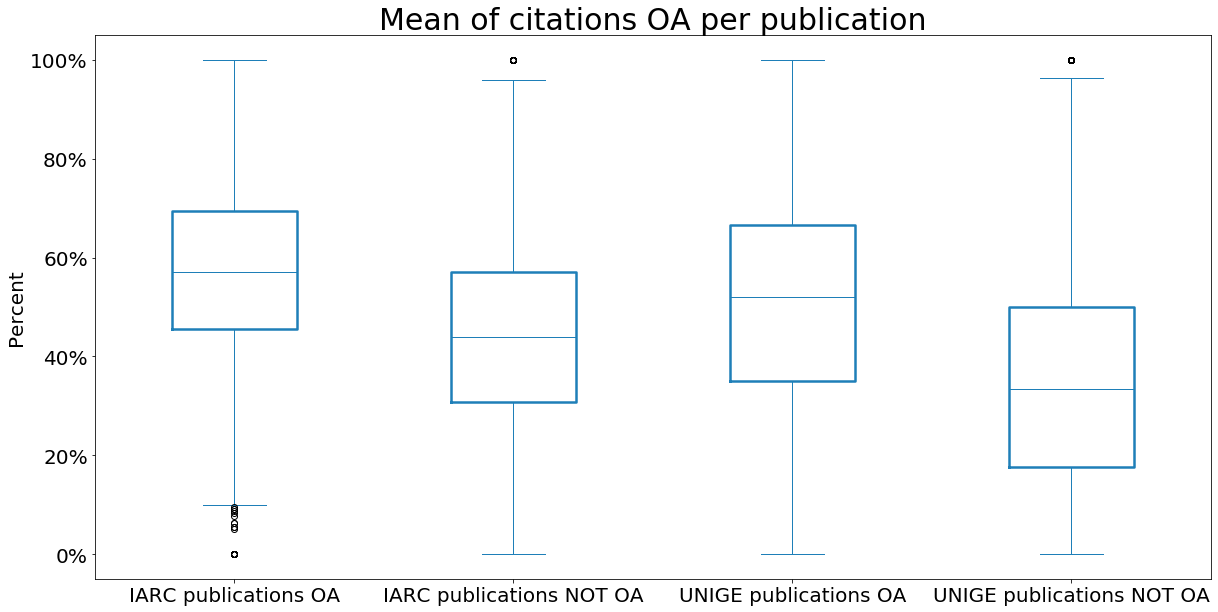

In [115]:
# box plot
myfileoutfig = 'figures/27_citations_oa_means.png'
boxprops = dict(linestyle='-', linewidth=2.5)  
colors = [IARC_color, IARC_color, UNIGE_color, UNIGE_color]
plt.rcParams.update({'font.size': 20})

# fig, ax = plt.subplots()
ax = citations_oa_means[['IARC publications OA', 'IARC publications NOT OA', 'UNIGE publications OA', 'UNIGE publications NOT OA']].plot(kind='box', boxprops=boxprops, color=IARC_color)
# ax = plt.boxplot(publications_oa_citations_oa_means[['UNIGE', 'IARC']])
# ax.boxplot(citations_oa_means[['IARC publications OA', 'IARC publications NOT OA']], positions=[1], boxprops=boxprops)
# ax.boxplot(citations_oa_means[['UNIGE publications OA', 'UNIGE publications NOT OA']], positions=[2], boxprops=boxprops)


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('', fontsize=20)
ax.set_ylabel('Percent', fontsize=20)
ax.set_title('Mean of citations OA per publication', fontsize=30)

fig = ax.get_figure()
# fig.suptitle('Mean of citations OA per publication')

# adding horizontal grid lines
# ax.yaxis.grid(True)

fig.set_size_inches(20, 10)
fig.savefig(myfileoutfig, dpi=200)
# plt.show()

In [269]:
# UNIGE Chi square test
cats = ['gold', 'hybrid', 'bronze', 'green', 'closed']
oas = ['gold', 'hybrid', 'bronze', 'green']
unige_oa_test = unige_all[['publication_wos_id', 'publication_year', 'citation_year', 'publication_doi_oa_status', 'citation_doi_oa_status']]
unige_oa_test = unige_oa_test.dropna(subset=['publication_doi_oa_status', 'citation_doi_oa_status'], how='any')
unige_oa_test.loc[unige_oa_test['publication_doi_oa_status'].isin(oas), 'Publication OA'] = 'Yes'
unige_oa_test.loc[unige_oa_test['publication_doi_oa_status'] == 'closed', 'Publication OA'] = 'No'
unige_oa_test.loc[unige_oa_test['citation_doi_oa_status'].isin(oas), 'Citation OA'] = 'Yes'
unige_oa_test.loc[unige_oa_test['citation_doi_oa_status'] == 'closed', 'Citation OA'] = 'No'
unige_oa_test

,publication_wos_id,publication_year,citation_year,publication_doi_oa_status,citation_doi_oa_status,Publication OA,Citation OA
2,WOS:000287362000002,2011,1999.0,closed,closed,No,No
3,WOS:000287362000002,2011,1999.0,closed,closed,No,No
4,WOS:000287362000002,2011,2001.0,closed,closed,No,No
5,WOS:000287362000002,2011,1996.0,closed,closed,No,No
6,WOS:000287362000002,2011,1993.0,closed,bronze,No,Yes
...,...,...,...,...,...,...,...
1260975,WOS:000591530900014,2020,2011.0,bronze,green,Yes,Yes
1260977,WOS:000591530900014,2020,2020.0,bronze,closed,Yes,No
1260978,WOS:000591530900014,2020,2020.0,bronze,bronze,Yes,Yes
1260979,WOS:000591530900014,2020,2021.0,bronze,green,Yes,Yes


In [270]:
# test with small group
# unige_oa_test = unige_oa_test.iloc[:100]
# unige_oa_test

In [280]:
unige_oa_test['Publication OA'].value_counts()

Yes    576821
No     380402
Name: Publication OA, dtype: int64

In [272]:
crosstab = pd.crosstab(unige_oa_test['Publication OA'], unige_oa_test['Citation OA'])
crosstab 

Citation OA,No,Yes
Publication OA,,
No,237397,143005
Yes,274533,302288


In [273]:
stats.chi2_contingency(crosstab)

(20216.13735680796, 0.0, 1, array([[203441.82688882, 176960.17311118],
        [308488.17311118, 268332.82688882]]))

In [274]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
nl = '\n'
print(f'Chi2 value= {chi2}{nl}p-value= {p:.10f}{nl}Degrees of freedom= {dof:.10f}{nl}')

Chi2 value= 20216.13735680796
p-value= 0.0000000000
Degrees of freedom= 1.0000000000



In [275]:
contigency= pd.crosstab(unige_oa_test['Publication OA'], unige_oa_test['Citation OA']) 
contigency

Citation OA,No,Yes
Publication OA,,
No,237397,143005
Yes,274533,302288


In [276]:
contigency_pct = pd.crosstab(unige_oa_test['Publication OA'], unige_oa_test['Citation OA'], normalize='index')
contigency_pct

Citation OA,No,Yes
Publication OA,,
No,0.624069,0.375931
Yes,0.475941,0.524059


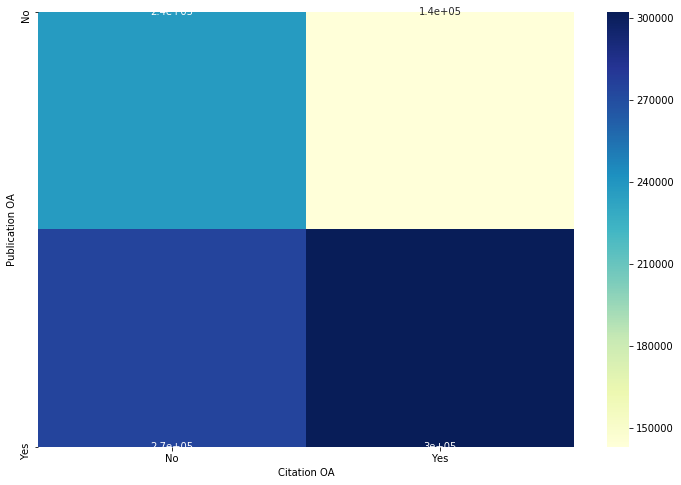

In [277]:
from scipy.stats import chi2_contingency
import seaborn as sns
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [256]:
# IARC chi square test
cats = ['gold', 'hybrid', 'bronze', 'green', 'closed']
oas = ['gold', 'hybrid', 'bronze', 'green']
iarc_oa_test = iarc_all[['publication_wos_id', 'publication_year', 'citation_year', 'publication_doi_oa_status', 'citation_doi_oa_status']]
iarc_oa_test = iarc_oa_test.dropna(subset=['publication_doi_oa_status', 'citation_doi_oa_status'], how='any')
iarc_oa_test.loc[iarc_oa_test['publication_doi_oa_status'].isin(oas), 'Publication OA'] = 'Yes'
iarc_oa_test.loc[iarc_oa_test['publication_doi_oa_status'] == 'closed', 'Publication OA'] = 'No'
iarc_oa_test.loc[iarc_oa_test['citation_doi_oa_status'].isin(oas), 'Citation OA'] = 'Yes'
iarc_oa_test.loc[iarc_oa_test['citation_doi_oa_status'] == 'closed', 'Citation OA'] = 'No'
iarc_oa_test

,publication_wos_id,publication_year,citation_year,publication_doi_oa_status,citation_doi_oa_status,Publication OA,Citation OA
1,WOS:000438342200039,2018,2018.0,bronze,bronze,Yes,Yes
5,WOS:000417001900034,2017,2010.0,closed,bronze,No,Yes
7,WOS:000417001900034,2017,1993.0,closed,closed,No,No
8,WOS:000417001900034,2017,2015.0,closed,closed,No,No
11,WOS:000417001900034,2017,2017.0,closed,green,No,Yes
...,...,...,...,...,...,...,...
275592,WOS:000449710900010,2018,2014.0,hybrid,closed,Yes,No
275595,WOS:000449710900010,2018,2018.0,hybrid,hybrid,Yes,Yes
275601,WOS:000449710900010,2018,2012.0,hybrid,closed,Yes,No
275616,WOS:000449710900010,2018,2000.0,hybrid,closed,Yes,No


In [257]:
iarc_oa_test['Publication OA'].value_counts()

Yes    131764
No      56573
Name: Publication OA, dtype: int64

In [258]:
from scipy import stats
crosstab = pd.crosstab(iarc_oa_test['Publication OA'], iarc_oa_test['Citation OA'])
crosstab 

Citation OA,No,Yes
Publication OA,,
No,30865,25708
Yes,56393,75371


In [259]:
stats.chi2_contingency(crosstab)

(2200.634901078019, 0.0, 1, array([[26210.71183039, 30362.28816961],
        [61047.28816961, 70716.71183039]]))

In [260]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
nl = '\n'
print(f'Chi2 value= {chi2}{nl}p-value= {p:.10f}{nl}Degrees of freedom= {dof:.10f}{nl}')

Chi2 value= 2200.634901078019
p-value= 0.0000000000
Degrees of freedom= 1.0000000000



In [262]:
contigency= pd.crosstab(iarc_oa_test['Publication OA'], iarc_oa_test['Citation OA']) 
contigency

Citation OA,No,Yes
Publication OA,,
No,30865,25708
Yes,56393,75371


In [263]:
contigency_pct = pd.crosstab(iarc_oa_test['Publication OA'], iarc_oa_test['Citation OA'], normalize='index')
contigency_pct

Citation OA,No,Yes
Publication OA,,
No,0.545578,0.454422
Yes,0.427985,0.572015


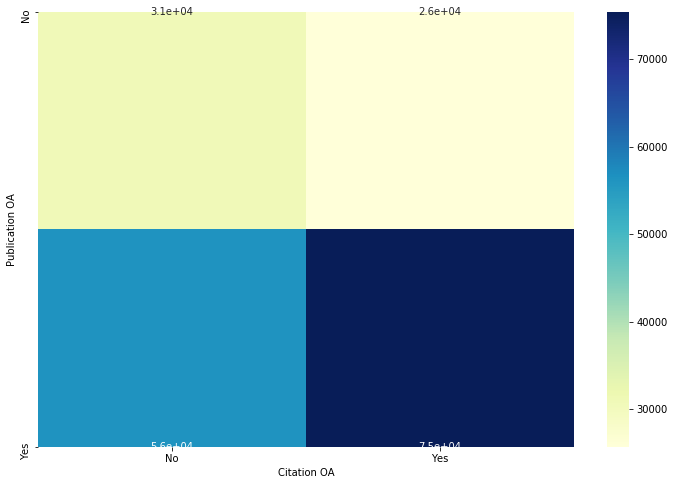

In [264]:
from scipy.stats import chi2_contingency
import seaborn as sns
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")